# Module 2 Capstone | Jonathan Mark Hamonangan | DTIDSOL-02

# Introduction

**TransJakarta** is the first and largest Bus Rapid Transit (BRT) system in Southeast Asia, built to offer **fast, affordable, and accessible** public transportation across Jakarta and The Greater JABODETABEK. Since its launch in **2004**, it has grown into a vast network with over **13 main corridors** and **200+ routes**.

### Service Types & Fares

- **BRT**, **AMARI** (night service), **Integrasi**, and **TransJabodetabek** – Rp3,500  
- **Royal Trans** (premium service) – Rp20,000  
- **Mikrotrans**, **Rusun** (public housing buses), and **Tourism routes** – Free of charge


This Jupyter Notebook explores insights from **2023 ridership data**, highlights a **key operational issue** identified through exploratory analysis, and proposes a **targeted solution** to help TransJakarta enhance its performance while supporting **affordable mobility** in the capital.


# Data Cleaning and Tidying

In [227]:
import pandas as pd
import numpy as np
import missingno as msn
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import geopandas as gpd
import folium

import warnings
warnings.filterwarnings("ignore")

In [228]:
# Importing the csv dataset
df = pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB  180062659848800   emoney      Bajragin Usada   M           
1  LGXO740D2N47GZ  4885331907664776  dki         Gandi Widodo     F           
2  DJWR385V2U57TO  4996225095064169  dki         Emong Wastuti    F           
3  JTUZ800U7C86EH  639099174703      flazz       Surya Wacana     F           
4  VMLO535V7F95NJ  570928206772      flazz       Embuh Mardhiyah  M           

   payCardBirthDate corridorID                              corridorName  \
0  2008              5          Matraman Baru - Ancol                      
1  1997              6C         Stasiun Tebet - Karet via Patra Kuningan   
2  1992              R1A        Pantai Maju - Kota                         
3  1978              11D        Pulo Gebang - Pulo Gadung 2 via PIK        
4  1982              12         Tanjung Priok - Pluit                      

   direction tapInStops  ... tapInStopsLon  stopStartSeq            tapInTime  \
0  1.0        P00142     ...  106.84402     7             2023-04-03 05:21:44   
1  0.0        B01963P    ...  106.83302     13            2023-04-03 05:42:44   
2  0.0        B00499P    ...  106.81435     38            2023-04-03 05:59:06   
3  0.0        B05587P    ...  106.93526     23            2023-04-03 05:44:51   
4  0.0        P00239     ...  106.88900     5             2023-04-03 06:17:35   

   tapOutStops        tapOutStopsName tapOutStopsLat tapOutStopsLon  \
0  P00253       Tegalan               -6.203101       106.85715       
1  B03307P      Sampoerna Strategic   -6.217152       106.81892       
2  B04962P      Simpang Kunir Kemukus -6.133731       106.81475       
3  B03090P      Raya Penggilingan     -6.183068       106.93194       
4  P00098       Kali Besar Barat      -6.135355       106.81143       

   stopEndSeq           tapOutTime  payAmount  
0  12.0        2023-04-03 06:00:53  3500.0     
1  21.0        2023-04-03 06:40:01  3500.0     
2  39.0        2023-04-03 06:50:55  3500.0     
3  29.0        2023-04-03 06:28:16  3500.0     
4  15.0        2023-04-03 06:57:03  3500.0     

[5 rows x 22 columns]

transID            payCardID payCardBank  \
37895  ZWEC949B8Q87QG  4685818286724028395  brizzi       
37896  YHHK837P6Y95GN  6502902290603767     dki          
37897  YXPP627N4G95HO  213159426675861      emoney       
37898  RGVK175U2U98UV  377840859133591      emoney       
37899  FMZZ963S4B68ZP  501862539795         flazz        

                  payCardName payCardSex  payCardBirthDate corridorID  \
37895  Kamila Mahendra         F          2004              6B          
37896  Titi Siregar            M          1974              9N          
37897  drg. Zahra Nashiruddin  F          1976              1T          
37898  Ana Agustina            M          1976              JAK.13      
37899  drg. Leo Najmudin       F          1985              13          

                            corridorName  direction tapInStops  ...  \
37895  Ragunan - MH Thamrin via Semanggi  1.0        P00261     ...   
37896  Pinang Ranti - Pramuka             1.0        P00064     ...   
37897  Cibubur - Balai Kota               1.0        B02873P    ...   
37898  Tanah Abang - Jembatan Lima        1.0        B02505P    ...   
37899  Ciledug - Tendean                  0.0        P00001     ...   

      tapInStopsLon  stopStartSeq            tapInTime  tapOutStops  \
37895  106.82309     2             2023-04-21 18:18:37  P00228        
37896  106.88116     1             2023-04-18 21:52:31  P00179        
37897  106.81676     12            2023-04-04 10:29:47  B00226P       
37898  106.80954     33            2023-04-15 19:59:26  B01787P       
37899  106.74786     2             2023-04-12 21:08:12  P00106        

       tapOutStopsName tapOutStopsLat tapOutStopsLon  stopEndSeq  \
37895  SMK 57          -6.290967       106.82365      13.0         
37896  Pinang Ranti    -6.291075       106.88634      2.0          
37897  Buperta Cibubur -6.370321       106.89628      14.0         
37898  JPO Blok G      -6.188861       106.81135      34.0         
37899  Kebayoran Lama  -6.238340       106.77752      7.0          

                tapOutTime  payAmount  
37895  2023-04-21 19:55:49  3500.0     
37896  2023-04-18 22:28:22  3500.0     
37897  2023-04-04 13:27:25  20000.0    
37898  2023-04-15 20:27:50  0.0        
37899  2023-04-12 21:34:53  3500.0     

[5 rows x 22 columns]

In [229]:
# Check data types and basic statistics
display(df.info(),df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

None

payCardID  payCardBirthDate     direction  tapInStopsLat  \
count  3.790000e+04  37900.000000      37900.000000  37900.000000    
mean   4.250060e+17  1990.089314       0.500633     -6.214838        
std    1.321699e+18  13.051482         0.500006      0.057911        
min    6.040368e+10  1946.000000       0.000000     -6.394973        
25%    1.800442e+14  1982.000000       0.000000     -6.245863        
50%    3.507947e+15  1990.000000       1.000000     -6.214587        
75%    4.699023e+15  2001.000000       1.000000     -6.175528        
max    4.997694e+18  2012.000000       1.000000     -6.089429        

       tapInStopsLon  stopStartSeq  tapOutStopsLat  tapOutStopsLon  \
count  37900.000000   37900.000000  36556.000000    36556.000000     
mean   106.841554     13.572480    -6.214651        106.841233       
std    0.060369       12.237623     0.059022        0.060999         
min    106.614730     0.000000     -6.394973        106.614730       
25%    106.803470     4.000000     -6.247225        106.801750       
50%    106.834830     10.000000    -6.214718        106.834580       
75%    106.882270     19.000000    -6.174736        106.883030       
max    107.023950     68.000000    -6.091746        107.023660       

         stopEndSeq     payAmount  
count  36556.000000  36893.000000  
mean   21.219909     2699.712683   
std    13.800689     4212.225592   
min    1.000000      0.000000      
25%    11.000000     0.000000      
50%    18.000000     3500.000000   
75%    29.000000     3500.000000   
max    77.000000     20000.000000

In [230]:
# Check unique values in each column
pd.set_option('display.max_colwidth', 1)
# display.max_colwidth, 1 : show all values

# create empty list to store the column name, number of unique values, and unique sample
listItem = []

# Loop through each df column
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
    # For every column in the DataFrame
    # Append a list containing column details (name, numer of unique, unique values) to `listItem`

# Convert listItem to DataFrame for visualization
tabel1Desc = pd.DataFrame(data=listItem, columns=['Column Name', 'Number of Unique', 'Unique Sample'])
tabel1Desc

Column Name  Number of Unique  \
0   transID           37900              
1   payCardID         2000               
2   payCardBank       6                  
3   payCardName       1993               
4   payCardSex        2                  
5   payCardBirthDate  67                 
6   corridorID        221                
7   corridorName      216                
8   direction         2                  
9   tapInStops        2570               
10  tapInStopsName    2602               
11  tapInStopsLat     2587               
12  tapInStopsLon     2458               
13  stopStartSeq      67                 
14  tapInTime         37079              
15  tapOutStops       2230               
16  tapOutStopsName   2248               
17  tapOutStopsLat    2237               
18  tapOutStopsLon    2139               
19  stopEndSeq        74                 
20  tapOutTime        35908              
21  payAmount         3                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Unique Sample  
0   [EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SB

In [231]:
# drop transID since it will not be used during analysis
df = df.drop(columns=['transID'])

## NAs and Duplicates


payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

0

<Axes: >

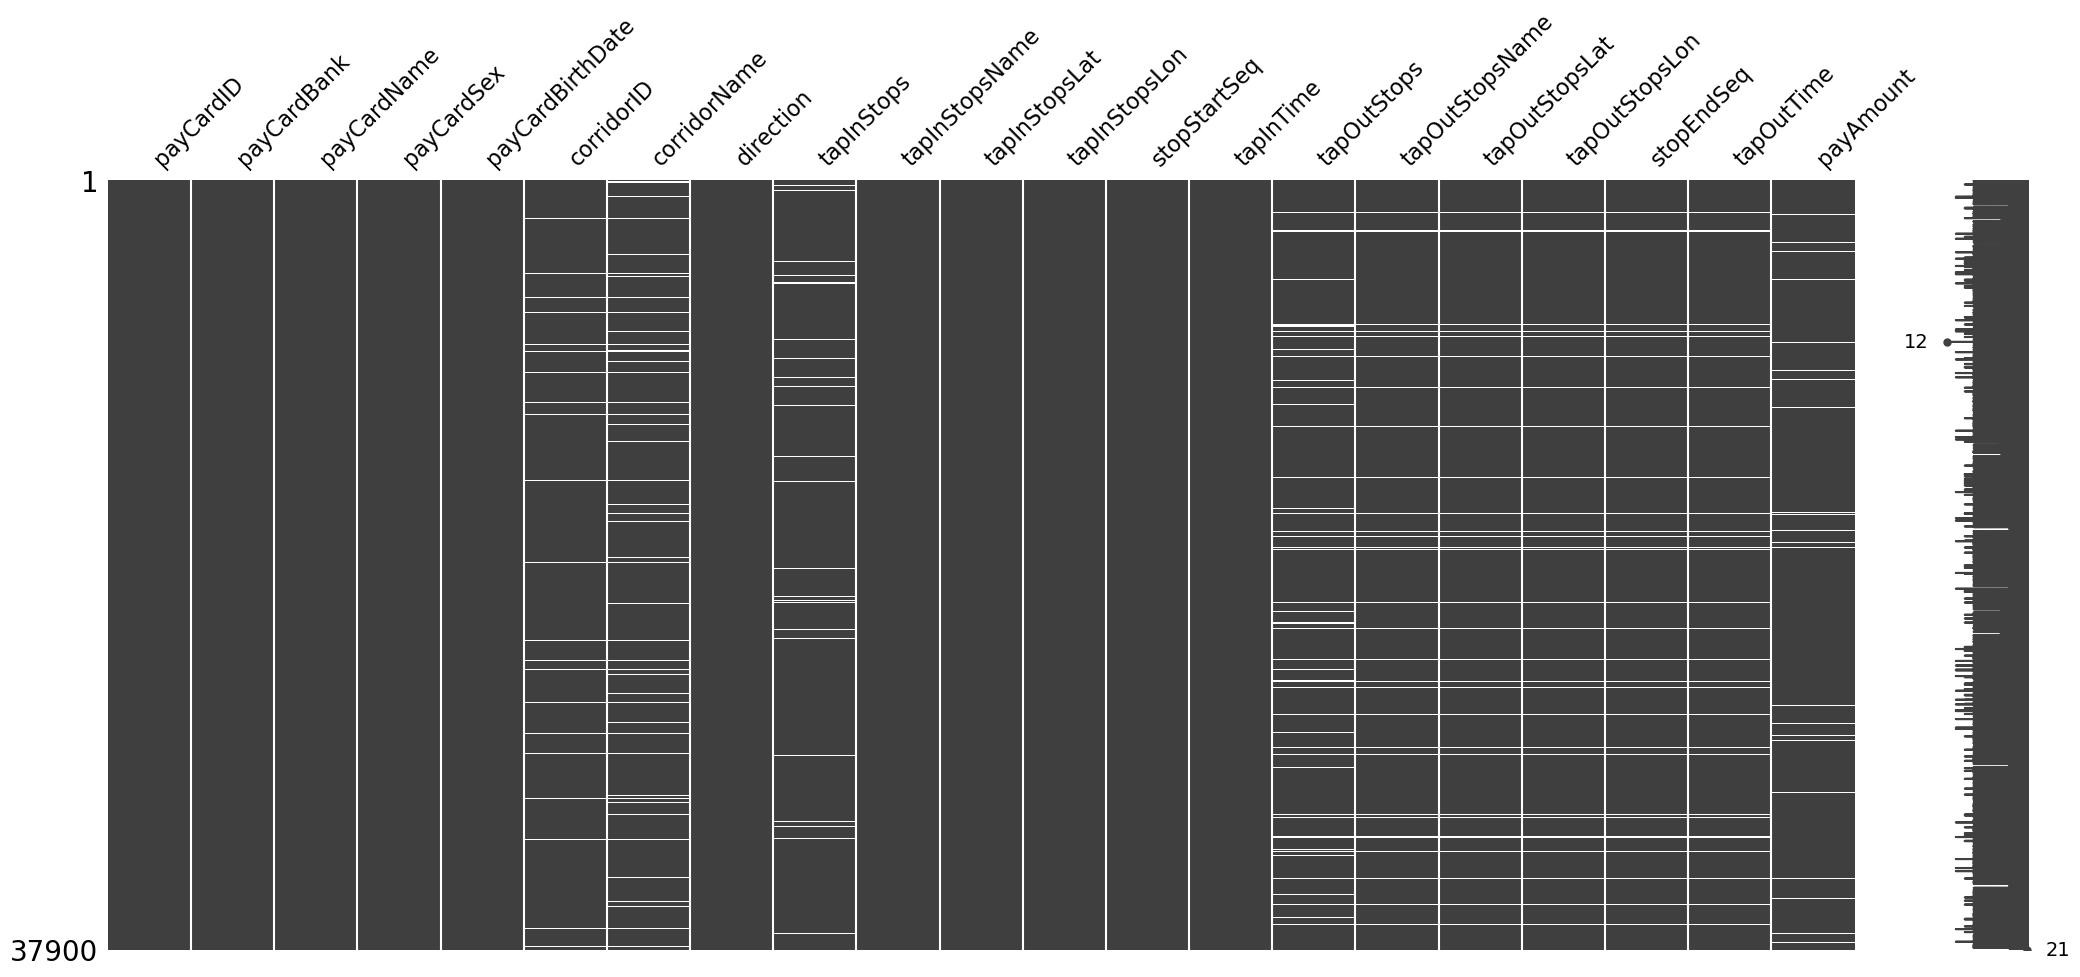

In [232]:
# Check NA and duplicates
display(df.isna().sum(), df.duplicated().sum())

# percentage of nas
df.isna().sum()/df.shape[0]*100

# Visualizing nas in df

# plotting using seaborn (takes time to code)
# sns.heatmap(df[['columns']].isna())

# using missingno library instead to visualize missing values of the df (faster)
msn.matrix(df)

### Missing Corridor

In [233]:
# Fill nas corridorid and name based on the other rows where similar corridorid's corridorname is present and similar corridorname's corridorid is present

# Subset data where both corridorID and corridorName are present
subset = df.dropna(subset=['corridorID', 'corridorName'], how='any')

# Create mappings
id_to_name = subset.groupby('corridorID')['corridorName'].agg(lambda x: x.mode().iloc[0])
# Group by 'corridorID' and find the most frequent ('mode') corridorName for each corridorID.
# agg(lambda x: x.mode().iloc[0])
# pick the most common value if there are ties.

# Create a mapping from corridorName to corridorID:
name_to_id = subset.groupby('corridorName')['corridorID'].agg(lambda x: x.mode().iloc[0])
# This is similar to the previous step but in reverse.

# Fill missing corridorName using corridorID
df['corridorName'] = df['corridorName'].fillna(
    df['corridorID'].map(id_to_name)
)
# fillna() fills only the missing values in 'corridorName'.
# df['corridorID'].map(id_to_name)
# maps the 'corridorID' to its corresponding 'corridorName' using the `id_to_name` mapping.

# Fill missing corridorID using corridorName
df['corridorID'] = df['corridorID'].fillna(
    df['corridorName'].map(name_to_id)
)
# similar but reverse

# Rows where both corridorID and corridorName are still missing
unresolved = df[df[['corridorID', 'corridorName']].isna().all(axis=1)]
print(f"Unresolved rows: {len(unresolved)}")
# isna().all(axis=1) checks if both columns are NaN for each row.
# If both are NaN, the row is considered unresolved.

# Verify mappings (example)
print("ID to Name Mapping:")
print(id_to_name.head())
print("\nName to ID Mapping:")
print(name_to_id.head())

Unresolved rows: 1125
ID to Name Mapping:
corridorID
1      Blok M - Kota                                  
10     Tanjung Priok - PGC 2                          
10A    Rusun Marunda - Tanjung Priok                  
10B    Rusun Cipinang Besar Selatan - Penas Kalimalang
10D    Kampung Rambutan - Tanjung Priok               
Name: corridorName, dtype: object

Name to ID Mapping:
corridorName
Andara - Stasiun Universitas Pancasila    JAK.44
BKN - Blok M                              M7B   
BSD - Jelambar                            S11   
BSD Serpong - Fatmawati                   S12   
Batusari - Grogol                         8K    
Name: corridorID, dtype: object


In [234]:
# Fill missing values in corridorID and corridorName based on tapInStopsName 

# subset with both corridorID and a valid tapInStopsName
stop_subset = df.dropna(subset=['corridorID', 'tapInStopsName'])
# drops nas in 'corridorID' and 'tapInStopsName'

# Map each stop to its most common corridorID and corridorName
stop_to_id = stop_subset.groupby('tapInStopsName')['corridorID'] \
    .agg(lambda x: x.mode().iloc[0]).to_dict()
stop_to_name = stop_subset.groupby('tapInStopsName')['corridorName'] \
    .agg(lambda x: x.mode().iloc[0]).to_dict()
# For each unique `tapInStopsName`
# find the most frequent (`mode`) `corridorID` and `corridorName`.
# `agg(lambda x: x.mode().iloc[0])` 
# ensures that ties are resolved by picking the first mode value.

# Mask of rows where both corridor fields are missing but tapInStopsName is present
mask = df[['corridorID','corridorName']].isna().all(axis=1) & df['tapInStopsName'].notna()
# corridorID and corridorName na
# tapInStopsName is present
# mask used for imputation using the mappings created above.

# Impute corridorID and corridorName based on tapInStopsName
df.loc[mask, 'corridorID']   = df.loc[mask, 'tapInStopsName'].map(stop_to_id)
df.loc[mask, 'corridorName'] = df.loc[mask, 'tapInStopsName'].map(stop_to_name)
# map() function to map tapInStopsName to its corresponding corridorID and corridorName
# Update only the masked rows

# Check how many still unresolved
unresolved = df[['corridorID','corridorName']].isna().all(axis=1).sum()
print(f"Still unresolved after tap-in imputation: {unresolved}")


Still unresolved after tap-in imputation: 33


In [235]:
# Fill missing values in corridorID and corridorName based on tapOutStopsName

# Build mappings from tapOutStopsName to corridorID & corridorName
out_subset = df.dropna(subset=['corridorID', 'tapOutStopsName'])
out_to_id = out_subset.groupby('tapOutStopsName')['corridorID'] \
              .agg(lambda x: x.mode().iloc[0]).to_dict()
out_to_name = out_subset.groupby('tapOutStopsName')['corridorName'] \
                .agg(lambda x: x.mode().iloc[0]).to_dict()

# Create a mask for rows still missing corridor info but with tapOutStopsName
mask_out = df[['corridorID','corridorName']].isna().all(axis=1) & df['tapOutStopsName'].notna()

# Impute using the tap‑out stop mappings
df.loc[mask_out, 'corridorID']   = df.loc[mask_out, 'tapOutStopsName'].map(out_to_id)
df.loc[mask_out, 'corridorName'] = df.loc[mask_out, 'tapOutStopsName'].map(out_to_name)

# missing‑flag and check how many remain
df['corridor_missing_flag'] = df[['corridorID','corridorName']].isna().all(axis=1)
print("Now unresolved:", df['corridor_missing_flag'].sum())
display(df.isna().sum())

Now unresolved: 17


payCardID                0   
payCardBank              0   
payCardName              0   
payCardSex               0   
payCardBirthDate         0   
corridorID               17  
corridorName             17  
direction                0   
tapInStops               1213
tapInStopsName           0   
tapInStopsLat            0   
tapInStopsLon            0   
stopStartSeq             0   
tapInTime                0   
tapOutStops              2289
tapOutStopsName          1344
tapOutStopsLat           1344
tapOutStopsLon           1344
stopEndSeq               1344
tapOutTime               1344
payAmount                1007
corridor_missing_flag    0   
dtype: int64

<Axes: >

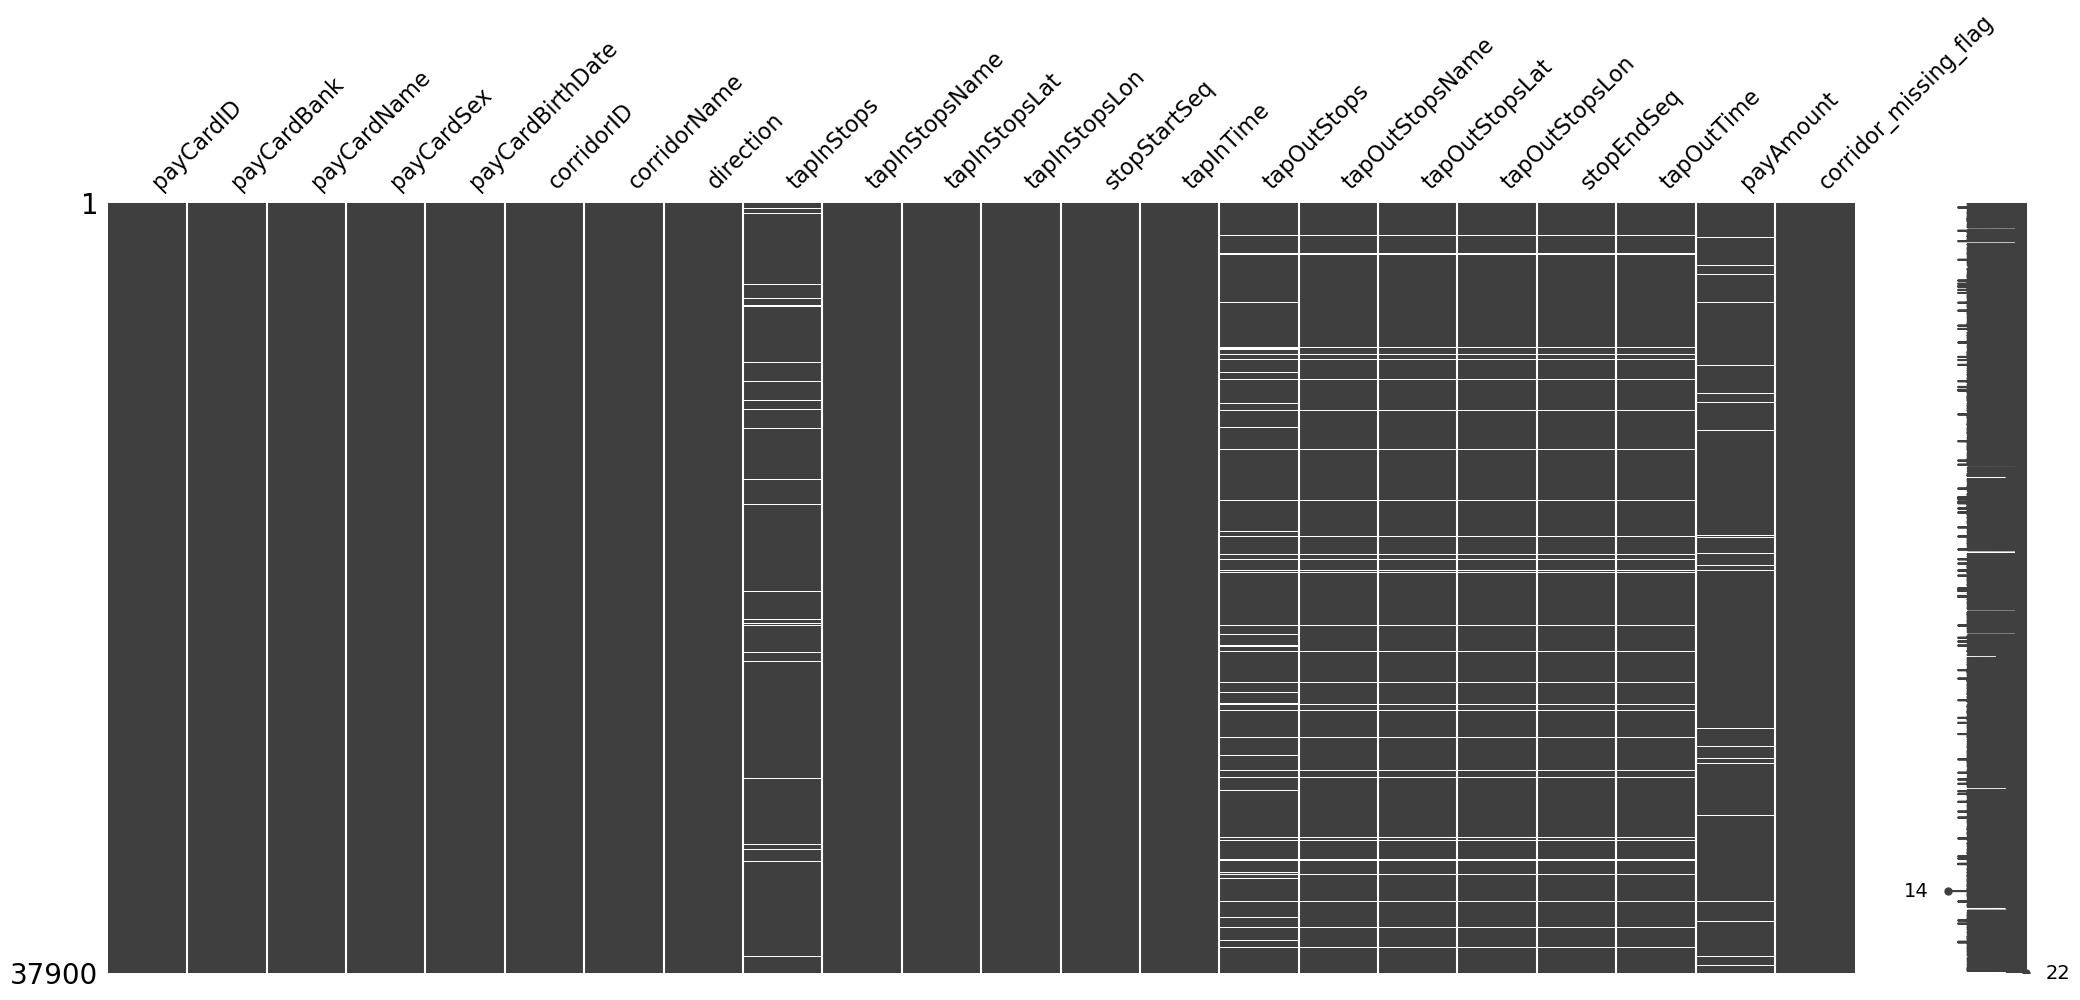

In [236]:
# using missingno library instead to visualize missing values of the df (faster)
msn.matrix(df)

### Missing Tap-In / Out

In [237]:
# Fill nas tapinstops based on the other rows where similar tapinstops's tapinstopsname is present

# Subset data with non-null tapInStops and tapInStopsName
valid_taps = df.dropna(subset=['tapInStops', 'tapInStopsName'])

# Create mapping: {stop_name: most_frequent_stop_id}
name_to_id = valid_taps.groupby('tapInStopsName')['tapInStops'].agg(
    lambda x: x.mode().iloc[0]
).to_dict()

# Fill NAs using the mapping
df['tapInStops'] = df.apply(
    lambda row: name_to_id.get(row['tapInStopsName'], row['tapInStops']),
    axis=1
)

remaining_nas = df['tapInStops'].isna().sum()
print(f"Remaining NAs in tapInStops: {remaining_nas}")

Remaining NAs in tapInStops: 34


In [238]:
# Grouping: build a reference dictionary from non-null names
latlon_to_name = df[df['tapInStopsName'].notnull()] \
    .drop_duplicates(subset=['tapInStopsLat', 'tapInStopsLon']) \
    .set_index(['tapInStopsLat', 'tapInStopsLon'])['tapInStopsName'].to_dict()

# Define a function to fill missing names based on lat-lon
def fill_tapin_name(row):
    if pd.isna(row['tapInStopsName']):
        return latlon_to_name.get((row['tapInStopsLat'], row['tapInStopsLon']), None)
    return row['tapInStopsName']

# Apply to DataFrame
df['tapInStopsName'] = df.apply(fill_tapin_name, axis=1)


payCardID                0   
payCardBank              0   
payCardName              0   
payCardSex               0   
payCardBirthDate         0   
corridorID               17  
corridorName             17  
direction                0   
tapInStops               34  
tapInStopsName           0   
tapInStopsLat            0   
tapInStopsLon            0   
stopStartSeq             0   
tapInTime                0   
tapOutStops              2289
tapOutStopsName          1344
tapOutStopsLat           1344
tapOutStopsLon           1344
stopEndSeq               1344
tapOutTime               1344
payAmount                1007
corridor_missing_flag    0   
dtype: int64

payCardID                0.000000
payCardBank              0.000000
payCardName              0.000000
payCardSex               0.000000
payCardBirthDate         0.000000
corridorID               0.044855
corridorName             0.044855
direction                0.000000
tapInStops               0.089710
tapInStopsName           0.000000
tapInStopsLat            0.000000
tapInStopsLon            0.000000
stopStartSeq             0.000000
tapInTime                0.000000
tapOutStops              6.039578
tapOutStopsName          3.546174
tapOutStopsLat           3.546174
tapOutStopsLon           3.546174
stopEndSeq               3.546174
tapOutTime               3.546174
payAmount                2.656992
corridor_missing_flag    0.000000
dtype: float64

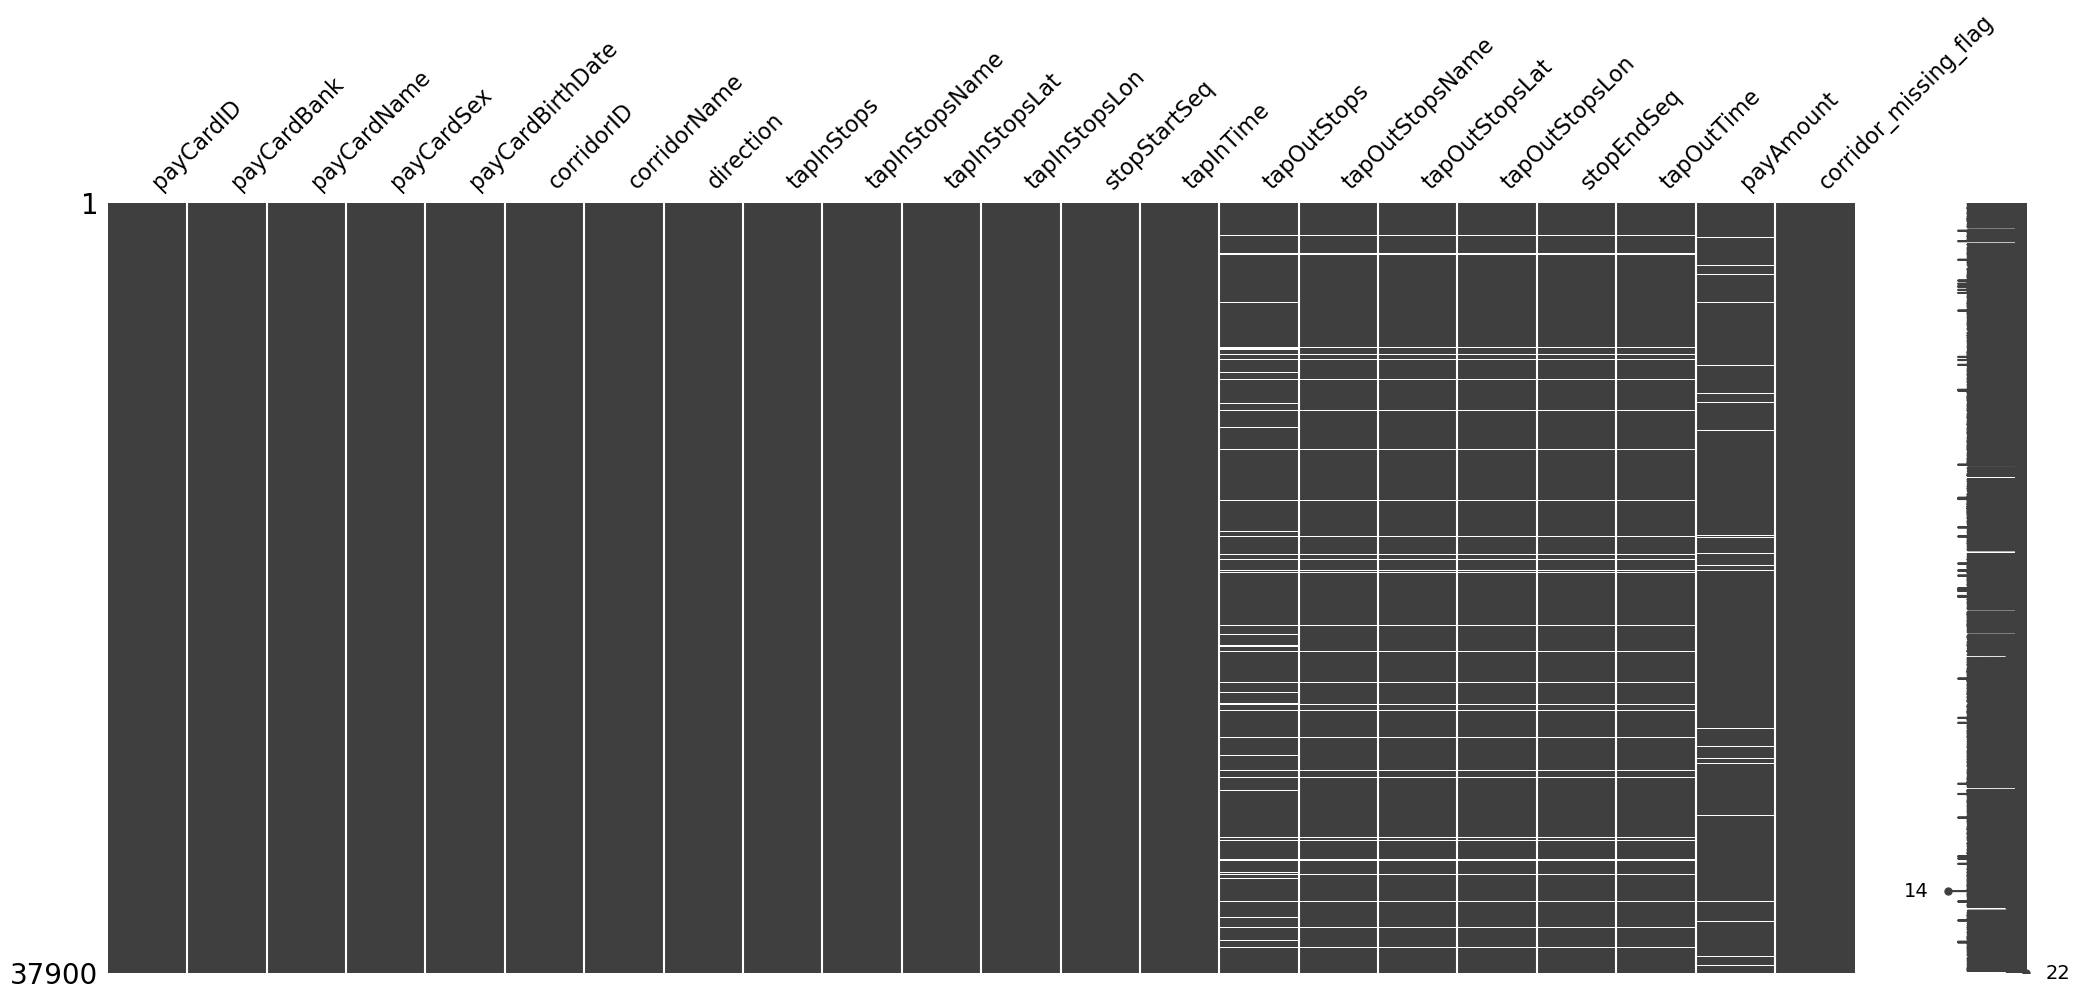

In [239]:
display(df.isna().sum())
msn.matrix(df)
df.isna().sum()/df.shape[0]*100

In [240]:
df.head()

payCardID payCardBank      payCardName payCardSex  payCardBirthDate  \
0  180062659848800   emoney      Bajragin Usada   M          2008               
1  4885331907664776  dki         Gandi Widodo     F          1997               
2  4996225095064169  dki         Emong Wastuti    F          1992               
3  639099174703      flazz       Surya Wacana     F          1978               
4  570928206772      flazz       Embuh Mardhiyah  M          1982               

  corridorID                              corridorName  direction tapInStops  \
0  5          Matraman Baru - Ancol                     1.0        P00142      
1  6C         Stasiun Tebet - Karet via Patra Kuningan  0.0        B01963P     
2  R1A        Pantai Maju - Kota                        0.0        B00499P     
3  11D        Pulo Gebang - Pulo Gadung 2 via PIK       0.0        B05587P     
4  12         Tanjung Priok - Pluit                     0.0        P00239      

           tapInStopsName  ...  stopStartSeq            tapInTime  \
0  Pal Putih               ...  7             2023-04-03 05:21:44   
1  Kemenkes 2              ...  13            2023-04-03 05:42:44   
2  Gg. Kunir II            ...  38            2023-04-03 05:59:06   
3  Taman Elok 1            ...  23            2023-04-03 05:44:51   
4  Sunter Boulevard Barat  ...  5             2023-04-03 06:17:35   

   tapOutStops        tapOutStopsName tapOutStopsLat tapOutStopsLon  \
0  P00253       Tegalan               -6.203101       106.85715       
1  B03307P      Sampoerna Strategic   -6.217152       106.81892       
2  B04962P      Simpang Kunir Kemukus -6.133731       106.81475       
3  B03090P      Raya Penggilingan     -6.183068       106.93194       
4  P00098       Kali Besar Barat      -6.135355       106.81143       

   stopEndSeq           tapOutTime  payAmount corridor_missing_flag  
0  12.0        2023-04-03 06:00:53  3500.0     False                 
1  21.0        2023-04-03 06:40:01  3500.0     False                 
2  39.0        2023-04-03 06:50:55  3500.0     False                 
3  29.0        2023-04-03 06:28:16  3500.0     False                 
4  15.0        2023-04-03 06:57:03  3500.0     False                 

[5 rows x 22 columns]

In [241]:
# Fill na tapOutStops using tapOutStopsName

# dictionary mapping tapOutStopsName to tapOutStops (from existing non-null rows)
name_to_id_df = df.dropna(subset=['tapOutStops', 'tapOutStopsName']) \
    .drop_duplicates(subset=['tapOutStopsName']) \
    .set_index('tapOutStopsName')['tapOutStops'] \
    .to_dict()
# dropna(subset=['tapOutStops', 'tapOutStopsName']): Keeps rows both tapOutStops and tapOutStopsName are not null.
# drop_duplicates(subset=['tapOutStopsName']): each tapOutStopsName is unique in the mapping no duplicates
# set_index('tapOutStopsName')['tapOutStops']: Creates a Series where the index is tapOutStopsName and the values are tapOutStops
# .to_dict(): Converts the Series into a dictionary

# mask rows where tapOutStops is missing, but tapOutStopsName is not
mask_missing_id = df['tapOutStops'].isna() & df['tapOutStopsName'].notna()
# for imputation using the `name_to_id_df` mapping.

# Fill tapOutStops by looking up the Stop Name in our dictionary
df.loc[mask_missing_id, 'tapOutStops'] = df.loc[mask_missing_id, 'tapOutStopsName'].map(name_to_id_df)

# Fill missing tapOutStopsName (Stop Name) using tapOutStops (ID)

# Build a dictionary mapping tapOutStops(from existing non-null rows)
id_to_name_df = df.dropna(subset=['tapOutStops', 'tapOutStopsName']) \
    .drop_duplicates(subset=['tapOutStops']) \
    .set_index('tapOutStops')['tapOutStopsName'] \
    .to_dict()

# mask rows 
mask_missing_name = df['tapOutStopsName'].isna() & df['tapOutStops'].notna()

# Fill tapOutStopsName by looking up the Stop ID in our dictionary
df.loc[mask_missing_name, 'tapOutStopsName'] = df.loc[mask_missing_name, 'tapOutStops'].map(id_to_name_df)

# Show how many values are still missing in each column
print("Missing values after filling:")
print(df[['tapOutStops', 'tapOutStopsName']].isna().sum())
df.isna().sum()


Missing values after filling:
tapOutStops        1363
tapOutStopsName    1344
dtype: int64


payCardID                0   
payCardBank              0   
payCardName              0   
payCardSex               0   
payCardBirthDate         0   
corridorID               17  
corridorName             17  
direction                0   
tapInStops               34  
tapInStopsName           0   
tapInStopsLat            0   
tapInStopsLon            0   
stopStartSeq             0   
tapInTime                0   
tapOutStops              1363
tapOutStopsName          1344
tapOutStopsLat           1344
tapOutStopsLon           1344
stopEndSeq               1344
tapOutTime               1344
payAmount                1007
corridor_missing_flag    0   
dtype: int64

In [242]:
# Define the tap-out related columns
tapout_cols = [
    'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat',
    'tapOutStopsLon', 'stopEndSeq', 'tapOutTime'
]
# list of tapout columns

# Create a boolean column: True if any tap-out field is filled, else False
df['tapped_out'] = ~df[tapout_cols].isna().all(axis=1)
df.info()
df['tapped_out'].value_counts()
df['tapped_out'].value_counts(normalize=True) * 100



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   payCardID              37900 non-null  int64  
 1   payCardBank            37900 non-null  object 
 2   payCardName            37900 non-null  object 
 3   payCardSex             37900 non-null  object 
 4   payCardBirthDate       37900 non-null  int64  
 5   corridorID             37883 non-null  object 
 6   corridorName           37883 non-null  object 
 7   direction              37900 non-null  float64
 8   tapInStops             37866 non-null  object 
 9   tapInStopsName         37900 non-null  object 
 10  tapInStopsLat          37900 non-null  float64
 11  tapInStopsLon          37900 non-null  float64
 12  stopStartSeq           37900 non-null  int64  
 13  tapInTime              37900 non-null  object 
 14  tapOutStops            36537 non-null  object 
 15  ta

tapped_out
True     96.453826
False    3.546174 
Name: proportion, dtype: float64

### Make Corridor Types

In [243]:
# Define corridor sets
brt = {'1', '2', '2A', '2D', '3', '3F', '3H', '4', '4D', '4H', '4M', 'L4', '5', '5C', '5D', '5E', '5H', '5K', '6',
       '6A', '6B', '6V', 'L6', '7', '7F', '7M', 'L7', '8', '8A', '9', '9A', '9B', '9C', '9M', '9K', '9N', '10' 'L10',
       '10D', '10H', '11', '11V', '12', '12M', '13', '13B', '13C', '13D', 'L13E', '13F'}

royaltrans = {'1K', '1T', '1U', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S31'}

transjabodetabek = {'B11', 'B21', '2B', 'D11', 'D21', '4B', 'T11', 'T12', 'SH1', 'S11', 'S21', 'S22', '1Q'}

rusun = {'3C', '9F', '11M', '12C', '12H', '2F', '2H', '3A', '3B', '10A', '10B', '11B', '11C', '11R', '12F'}

# classification function
def classify_corridor(corridor_id):
    if pd.isna(corridor_id):
        return None
    # if nas

    corridor_id = str(corridor_id).upper()
    # Convert to string and uppercase for consistency

    # Category by exact match
    if corridor_id in brt:
        return 'BRT'
    elif corridor_id in royaltrans:
        return 'RoyalTrans'
    elif corridor_id in transjabodetabek:
        return 'Transjabodetabek'
    elif corridor_id in rusun:
        return 'Rusun'
    
    # Category by prefix
    elif corridor_id.startswith('JAK'):
        return 'Mikrotrans'
    elif corridor_id.startswith('BW'):
        return 'Tourism'
    elif corridor_id.startswith('M'):
        return 'AMARI'
    
    # Everything else
    else:
        return 'Integrasi'

# Apply the function to create a new column
df['corridorType'] = df['corridorID'].apply(classify_corridor)

# Reorder the column so corridorType comes after corridorID
cols = list(df.columns)
cols.remove('corridorType')
idx = cols.index('corridorID')
cols.insert(idx + 1, 'corridorType')
df = df[cols]

# Check update and NAs
df.head()
df['corridorType'].unique()
df['corridorType'].isna().sum()

17

### Missing payAmount

In [244]:
# Ensure payAmount is numeric
df['payAmount'] = pd.to_numeric(df['payAmount'], errors='coerce')

# function that returns the correct fare for every corridorType
def infer_fare_full(corridor_type):
    if pd.isna(corridor_type):
        return None
    ct = corridor_type
    # Free services
    if ct in ['Mikrotrans', 'Rusun', 'Tourism']:
        return 0
    # RoyalTrans
    elif ct == 'RoyalTrans':
        return 20000
    # etc
    else:
        return 3500

# Apply it to every row, replacing whatever was there
df['payAmount'] = df['corridorType'].apply(infer_fare_full)

# 4) Quick check: unique values should now be {0, 3500, 20000}
display(
    df['payAmount'].isna().sum(),
    df['payAmount'].unique())

17

array([ 3500., 20000.,     0.,    nan])

### Missing Tap-Out (Final)

In [245]:
# Fill nas of tapOutStops and tapOutStopsName based on the other rows where similar tapOutStops's tapOutStopsName is present and similar tapOutStopsName's tapOutStops is present

# Subset data where both tapOutStops and tapOutStopsName are not na
valid_tap_out = df.dropna(subset=['tapOutStops', 'tapOutStopsName'])

# Create name-to-ID mapping (most frequent ID per name)
name_to_id = valid_tap_out.groupby('tapOutStopsName')['tapOutStops'].agg(
    lambda x: x.mode().iloc[0]
).to_dict()

# Fill missing tapOutStops where tapOutStopsName is known
mask = df['tapOutStops'].isna() & df['tapOutStopsName'].notna()
df.loc[mask, 'tapOutStops'] = df.loc[mask, 'tapOutStopsName'].map(name_to_id)
# rows where `tapOutStops` is na but `tapOutStopsName` is not
# Uses the `name_to_id` mapping to fill in the missing `tapOutStops` values based on `tapOutStopsName`.

# Create ID-to-name mapping (most frequent name per ID)
id_to_name = valid_tap_out.groupby('tapOutStops')['tapOutStopsName'].agg(
    lambda x: x.mode().iloc[0]
).to_dict()

# Fill missing tapOutStopsName where tapOutStops is known
mask_name = df['tapOutStopsName'].isna() & df['tapOutStops'].notna()
df.loc[mask_name, 'tapOutStopsName'] = df.loc[mask_name, 'tapOutStops'].map(id_to_name)

print(f"Remaining NAs in tapOutStops: {df['tapOutStops'].isna().sum()}")
print(f"Remaining NAs in tapOutStopsName: {df['tapOutStopsName'].isna().sum()}")

Remaining NAs in tapOutStops: 1363
Remaining NAs in tapOutStopsName: 1344


### Date Time

In [246]:
# make to datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce')

# Create new columns for tap-in
df['tapInDate'] = df['tapInTime'].dt.date # date
df['tapInHour'] = df['tapInTime'].dt.hour # hour
df['tapInDayName'] = df['tapInTime'].dt.day_name() # day

# Create new columns for tap-out
df['tapOutDate'] = df['tapOutTime'].dt.date
df['tapOutHour'] = df['tapOutTime'].dt.hour
df['tapOutDayName'] = df['tapOutTime'].dt.day_name()



#### Travel Duration

In [247]:
# # Create a new column for travel duration
df['travelDuration'] = df['tapOutTime'] - df['tapInTime']

# new in minutes columns (with decimals)
df['travelDurationMin'] = df['travelDuration'].dt.total_seconds() / 60
df['travelDurationMin'] = df['travelDurationMin'].round(0).astype('Int64')
# rounded and set as integer

In [248]:
# Making a clean copy of df, with only tapped_out = True
dfc = df[df['tapped_out'] == True].copy()
display(
    dfc.isna().sum(),
    dfc.info(),
    dfc.isna().sum()/dfc.shape[0]*100)

<class 'pandas.core.frame.DataFrame'>
Index: 36556 entries, 0 to 37899
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   payCardID              36556 non-null  int64          
 1   payCardBank            36556 non-null  object         
 2   payCardName            36556 non-null  object         
 3   payCardSex             36556 non-null  object         
 4   payCardBirthDate       36556 non-null  int64          
 5   corridorID             36540 non-null  object         
 6   corridorType           36540 non-null  object         
 7   corridorName           36540 non-null  object         
 8   direction              36556 non-null  float64        
 9   tapInStops             36524 non-null  object         
 10  tapInStopsName         36556 non-null  object         
 11  tapInStopsLat          36556 non-null  float64        
 12  tapInStopsLon          36556 non-null  float64     

payCardID                0 
payCardBank              0 
payCardName              0 
payCardSex               0 
payCardBirthDate         0 
corridorID               16
corridorType             16
corridorName             16
direction                0 
tapInStops               32
tapInStopsName           0 
tapInStopsLat            0 
tapInStopsLon            0 
stopStartSeq             0 
tapInTime                0 
tapOutStops              19
tapOutStopsName          0 
tapOutStopsLat           0 
tapOutStopsLon           0 
stopEndSeq               0 
tapOutTime               0 
payAmount                16
corridor_missing_flag    0 
tapped_out               0 
tapInDate                0 
tapInHour                0 
tapInDayName             0 
tapOutDate               0 
tapOutHour               0 
tapOutDayName            0 
travelDuration           0 
travelDurationMin        0 
dtype: int64

None

payCardID                0.000000
payCardBank              0.000000
payCardName              0.000000
payCardSex               0.000000
payCardBirthDate         0.000000
corridorID               0.043768
corridorType             0.043768
corridorName             0.043768
direction                0.000000
tapInStops               0.087537
tapInStopsName           0.000000
tapInStopsLat            0.000000
tapInStopsLon            0.000000
stopStartSeq             0.000000
tapInTime                0.000000
tapOutStops              0.051975
tapOutStopsName          0.000000
tapOutStopsLat           0.000000
tapOutStopsLon           0.000000
stopEndSeq               0.000000
tapOutTime               0.000000
payAmount                0.043768
corridor_missing_flag    0.000000
tapped_out               0.000000
tapInDate                0.000000
tapInHour                0.000000
tapInDayName             0.000000
tapOutDate               0.000000
tapOutHour               0.000000
tapOutDayName 

NAs are all less than 0.1%

### Dropping All NAs

In [249]:
# Drop any rows that still have NaN in important columns
dfc = dfc.dropna(subset=[
    'corridorID', 'corridorType', 'corridorName',
    'tapInStops', 'tapOutStops'
])
dfc.drop(columns=['tapInTime', 'tapOutTime', 'corridor_missing_flag'], inplace=True)

# see update
display(
    dfc.isna().sum(),
    dfc.duplicated().sum(),
    dfc.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36490 entries, 0 to 37899
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   payCardID          36490 non-null  int64          
 1   payCardBank        36490 non-null  object         
 2   payCardName        36490 non-null  object         
 3   payCardSex         36490 non-null  object         
 4   payCardBirthDate   36490 non-null  int64          
 5   corridorID         36490 non-null  object         
 6   corridorType       36490 non-null  object         
 7   corridorName       36490 non-null  object         
 8   direction          36490 non-null  float64        
 9   tapInStops         36490 non-null  object         
 10  tapInStopsName     36490 non-null  object         
 11  tapInStopsLat      36490 non-null  float64        
 12  tapInStopsLon      36490 non-null  float64        
 13  stopStartSeq       36490 non-null  int64          


payCardID            0
payCardBank          0
payCardName          0
payCardSex           0
payCardBirthDate     0
corridorID           0
corridorType         0
corridorName         0
direction            0
tapInStops           0
tapInStopsName       0
tapInStopsLat        0
tapInStopsLon        0
stopStartSeq         0
tapOutStops          0
tapOutStopsName      0
tapOutStopsLat       0
tapOutStopsLon       0
stopEndSeq           0
payAmount            0
tapped_out           0
tapInDate            0
tapInHour            0
tapInDayName         0
tapOutDate           0
tapOutHour           0
tapOutDayName        0
travelDuration       0
travelDurationMin    0
dtype: int64

0

None

In [250]:
df_no_tapout = df[df['tapped_out'] == False]
df_no_tapout.info()
df_no_tapout.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1344 entries, 6 to 37799
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   payCardID              1344 non-null   int64          
 1   payCardBank            1344 non-null   object         
 2   payCardName            1344 non-null   object         
 3   payCardSex             1344 non-null   object         
 4   payCardBirthDate       1344 non-null   int64          
 5   corridorID             1343 non-null   object         
 6   corridorType           1343 non-null   object         
 7   corridorName           1343 non-null   object         
 8   direction              1344 non-null   float64        
 9   tapInStops             1342 non-null   object         
 10  tapInStopsName         1344 non-null   object         
 11  tapInStopsLat          1344 non-null   float64        
 12  tapInStopsLon          1344 non-null   float64      

payCardID                0   
payCardBank              0   
payCardName              0   
payCardSex               0   
payCardBirthDate         0   
corridorID               1   
corridorType             1   
corridorName             1   
direction                0   
tapInStops               2   
tapInStopsName           0   
tapInStopsLat            0   
tapInStopsLon            0   
stopStartSeq             0   
tapInTime                0   
tapOutStops              1344
tapOutStopsName          1344
tapOutStopsLat           1344
tapOutStopsLon           1344
stopEndSeq               1344
tapOutTime               1344
payAmount                1   
corridor_missing_flag    0   
tapped_out               0   
tapInDate                0   
tapInHour                0   
tapInDayName             0   
tapOutDate               1344
tapOutHour               1344
tapOutDayName            1344
travelDuration           1344
travelDurationMin        1344
dtype: int64

# Data Manipulation Using Clean Data "dfc"

In [251]:
# Check unique values in each column
pd.set_option('display.max_colwidth', 1)
# display.max_colwidth, 1 : show all values

listItem = []
for col in dfc.columns :
    listItem.append( [col, dfc[col].nunique(), dfc[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   payCardID          1980               
1   payCardBank        6                  
2   payCardName        1973               
3   payCardSex         2                  
4   payCardBirthDate   66                 
5   corridorID         221                
6   corridorType       8                  
7   corridorName       216                
8   direction          2                  
9   tapInStops         2507               
10  tapInStopsName     2507               
11  tapInStopsLat      2493               
12  tapInStopsLon      2370               
13  stopStartSeq       67                 
14  tapOutStops        2200               
15  tapOutStopsName    2199               
16  tapOutStopsLat     2188               
17  tapOutStopsLon     2092               
18  stopEndSeq         74                 
19  payAmount          3                  
20  tapped_out         1                  
21  tapInDate          30                 
22  tapInHour          17                 
23  tapInDayName       7                  
24  tapOutDate         30                 
25  tapOutHour         20                 
26  tapOutDayName      7                  
27  travelDuration     6166               
28  travelDurationMin  151                

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### Tap-In / Out Type

In [252]:
# add column of tapin/out type (Office, Education, Tourism, Shopping, and Recreation, Industrial, Residential, Transport Hub, Religious, Health) after tapin/out name columns

# make sets of unique values of stop names 
tapin = sorted(set(dfc['tapInStopsName'].dropna()))
tapout = sorted(set(dfc['tapOutStopsName'].dropna()))

# into a DataFrame 
combined = pd.DataFrame({
    'tapInStopsName': pd.Series(tapin),
    'tapOutStopsName': pd.Series(tapout)
})

# Export to CSV
combined.to_csv('unique_tapin_tapout_stops.csv', index=False)

In [253]:
# Get unique sets
tapin = sorted(set(dfc['tapInStopsName'].dropna()))
tapout = sorted(set(dfc['tapOutStopsName'].dropna()))
tapinlat = sorted(set(dfc['tapInStopsLat'].dropna()))
tapinlon = sorted(set(dfc['tapInStopsLon'].dropna()))
tapoutlat = sorted(set(dfc['tapOutStopsLat'].dropna()))
tapoutlon = sorted(set(dfc['tapOutStopsLon'].dropna()))

# Combine into a DataFrame (fill with NaN if lengths don't match)
combined = pd.DataFrame({
    'tapInStopsName': pd.Series(tapin),
    'tapOutStopsName': pd.Series(tapout),
    'tapInStopsLat': pd.Series(tapinlat),
    'tapInStopsLon': pd.Series(tapinlon),
    'tapOutStopsLat': pd.Series(tapoutlat),
    'tapOutStopsLon': pd.Series(tapoutlon)
})

# Export to CSV
combined.to_csv('unique_tapin_tapout_stops_latlon.csv', index=False)

In [254]:
# Define your category regex pattern (partial matches)
category_patterns = {
    "Health": re.compile(
        r"(klinik|hospital|puskesmas|\brs(u|ia|ud|pad)?\b|rumah sakit|apotek|apotik|tpu|lakesgilut|clinic)",
        re.IGNORECASE
    ),
    "Transport Hub": re.compile(
        r"(stasiun|st\.(?!\s*(?:mrt|lrt))|mrt|velodrome|lrt|terminal|pool|term|halim|rest area|jak lingko|jpo)",
        re.IGNORECASE
    ),
    "Religious": re.compile(
        r"(masjid|musholla|mushola|gereja|gpib|gbi|istiqlal|katedral|pura)",
        re.IGNORECASE
    ),
    "Education": re.compile(
        r"(\bbudi utomo\b|\bsekolah\b|\bsma\b|\bsmk\b|\btk\b|\bsd\b|\bsmp\b|\bman\b|\bsman\b|\bsmkn\b|\bsdn\b|\bpaud\b|bimbel|universitas|univ|\bui\b|\bypi\b|school|ukrida|islamic|umj|unj|yayasan|kanisius|jis|mtsn|al[- ]?azhar|al[- ]?wathoniyah|ibi|budhaya santo agustinus|institut|kampus|buddha tzu chi|dharma bakti|pusdiklat|pusdiklatnas|salemba ui|\bui\b|perpustakaan|perpus|stip|stis|stai)",
        re.IGNORECASE
    ),  
    "Tourism & Recreation": re.compile(
        r"(\baston\b|bw|mall|\bmangga dua\b|\bwtc\b|lapangan|ambassador|shanghai|ragunan|sahid|grand|gelanggang|gelora|terrace|glodok|grand|ancol|\btmii\b|\btaman mini\b|\btaman mini indonesia indah\b|(?<!jln\. )\btaman\b(?! (rasuna|modern)\b)|itc|\batrium 1\b|hotel|senayan city|blok m|kota tua|senayan|pasar|psr|ps|pondok indah|plaza|walk|food|monumen|monas|museum|GOR|GBK|walk|explorer|galeri|stadium|pantai indah kapuk|pik|pantai maju|pantai|patung|tugu|(?<!18 office )park|\btebet eco park\b|square|superindo|summarecon|resort|rekreasi|rptra|baywalk|sari pan pacific|podomoro city|rumah sipitung|roxy|ramayana|ace hardware|pgc|mayestik|kartika chandra|kampung budaya betawi|benteng betawi|gandaria city|bandar djakarta|btc|Bintaro Exchange)",
        re.IGNORECASE
    ),
    "Office & Industrial": re.compile(
        r"(khong guan|\btdp\b|\bmnc\b|dukuh atas|telkom|walikota|otorita|pgp|pln|pltu|pabrik|pt|ptt|polda|polres|polsek|polri|roda|rri|kantor|cbd|jamsostek|tower|\bbea\b|cukai|astra|imperium|indosiar|sunter boulevard|summitmas|kuningan|formindo|suzuki|sunter|sumur bor|scbd|senayan|lion|semanggi|ged(o|u)ng|gatot|menara|united|tractors|sampoerna|strategic|benhil|setiabudi|sudirman|bogasari|thamrin|\basean\b|kantor|office|\bdpr\b|\bdpp\b|\bmpr|dewan|Departemen|dinas|direktorat|dispenda|dittopad|district|simatupang|satlak|podomoro city|rukan|kodam|kodim|kementerian|kementrian|kemenkes|kementan|kejaksaan agung|kehakiman|kompas gramedia|\bkua\b|\bkpp\b|\bkbn\b|\bkkdm\b|\bkpad\b|imigrasi|bank|balai|\bbsi\b|\bakr\b|\basmi\b|arsip|\bbkkbn\b|\bbni\b|\bbkn\b|\bbnn\b|\bbpjs\b|\bbppk\b|\bbpkp\b|\bbphn\b|\bbri\b)",
        re.IGNORECASE
    ),
    "Residential": re.compile(
        r"(\btaman modern\b|\bMelody Golf\b|\bvillage\b|\bkalibata city\b|\bthe wave\b|\bbuncit indah\b|\bandara\b|ampera|bermis|mandara|jelambar|ariobimo sentral|rusun|sunan giri|sunter icon|essence|adam malik|grogol|seskoal|komplek|jln\.?|residen(ce)?|perum(ahan)?|apart(em|men)|pakubuwono|taman rasuna|south city|ruko|pulo|puri|perumnas|permata hijau|apartemen|one park residences|kel\.?|kec\.?|keb\.?|kebayoran|kampung|gg\.?|asrama|batan|bintaro (?! exchange)|ciledug|cipulir|bidara cina)",
        re.IGNORECASE
    ),
    

}

# Fallback for no match
fallback = "Other"

#Classification function (partial substring match)
def classify_stop(name):
    if pd.isna(name):
        return None
    for cat, pat in category_patterns.items():
        if pat.search(name):
            return cat
    return fallback

# Apply to dfc
dfc['tapInType']  = dfc['tapInStopsName'].apply(classify_stop)
dfc['tapOutType'] = dfc['tapOutStopsName'].apply(classify_stop)

# Reorder columns so the new types after their source names
cols = list(dfc.columns)
for src, new in [('tapInStopsName','tapInType'), ('tapOutStopsName','tapOutType')]:
    if new in cols and src in cols:
        cols.remove(new)
        idx = cols.index(src)
        cols.insert(idx+1, new)
dfc = dfc[cols]
# cols.remove(new)  # Remove the new column from its current position
# idx = cols.index(src)  # Find the index of the source column
# cols.insert(idx + 1, new)  # Insert the new column right after the source column

In [255]:
# to check if classified correctly
print(classify_stop("Cervino Village"))

Residential


In [256]:
display(
    dfc.info(),
    dfc.isna().sum()/dfc.shape[0]*100,
    dfc['tapInType'].unique(),
    dfc[['payCardName', 'tapInStopsName', 'tapInType', 'tapOutStopsName', 'tapOutType']].head())

<class 'pandas.core.frame.DataFrame'>
Index: 36490 entries, 0 to 37899
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   payCardID          36490 non-null  int64          
 1   payCardBank        36490 non-null  object         
 2   payCardName        36490 non-null  object         
 3   payCardSex         36490 non-null  object         
 4   payCardBirthDate   36490 non-null  int64          
 5   corridorID         36490 non-null  object         
 6   corridorType       36490 non-null  object         
 7   corridorName       36490 non-null  object         
 8   direction          36490 non-null  float64        
 9   tapInStops         36490 non-null  object         
 10  tapInStopsName     36490 non-null  object         
 11  tapInType          36490 non-null  object         
 12  tapInStopsLat      36490 non-null  float64        
 13  tapInStopsLon      36490 non-null  float64        


None

payCardID            0.0
payCardBank          0.0
payCardName          0.0
payCardSex           0.0
payCardBirthDate     0.0
corridorID           0.0
corridorType         0.0
corridorName         0.0
direction            0.0
tapInStops           0.0
tapInStopsName       0.0
tapInType            0.0
tapInStopsLat        0.0
tapInStopsLon        0.0
stopStartSeq         0.0
tapOutStops          0.0
tapOutStopsName      0.0
tapOutType           0.0
tapOutStopsLat       0.0
tapOutStopsLon       0.0
stopEndSeq           0.0
payAmount            0.0
tapped_out           0.0
tapInDate            0.0
tapInHour            0.0
tapInDayName         0.0
tapOutDate           0.0
tapOutHour           0.0
tapOutDayName        0.0
travelDuration       0.0
travelDurationMin    0.0
dtype: float64

array(['Other', 'Office & Industrial', 'Residential',
       'Tourism & Recreation', 'Education', 'Health', 'Religious',
       'Transport Hub'], dtype=object)

payCardName          tapInStopsName             tapInType  \
0  Bajragin Usada   Pal Putih               Other                  
1  Gandi Widodo     Kemenkes 2              Office & Industrial    
2  Emong Wastuti    Gg. Kunir II            Residential            
3  Surya Wacana     Taman Elok 1            Tourism & Recreation   
4  Embuh Mardhiyah  Sunter Boulevard Barat  Office & Industrial    

         tapOutStopsName           tapOutType  
0  Tegalan                Other                
1  Sampoerna Strategic    Office & Industrial  
2  Simpang Kunir Kemukus  Other                
3  Raya Penggilingan      Residential          
4  Kali Besar Barat       Other

### Transport Hub Connection
if previously matched

In [257]:
# regex patterns for each type of transport connection (not just exact matches)

# Train
train_pat = re.compile(r"(stasiun|st\.(?!\s*(?:mrt|lrt))|tanah abang)", re.IGNORECASE)

# MRT
mrt_pat = re.compile(r"(mrt|leba?k bulus|dukuh atas|senayan)", re.IGNORECASE)

# LRT
lrt_pat = re.compile(r"(lrt|velodrome)", re.IGNORECASE)

# Other: pools, terminals, Halim, rest area, JPO, etc.
other_pat = re.compile(r"(pool|terminal|term|halim|rest area|jak lingko|jpo)", re.IGNORECASE)

# function to classify stop names into transport types
def classify_transport(name):
    if pd.isna(name):
        return None  # Leave blank if stop name is missing
    if train_pat.search(name):
        return 'Train'
    elif mrt_pat.search(name):
        return 'MRT'
    elif lrt_pat.search(name):
        return 'LRT'
    elif other_pat.search(name):
        return 'Other Transport'
    else:
        return 'No Known Direct Connection'  # Fallback label if nothing matched

# Apply the function to both tapIn and tapOut stop names
# Only apply this classification if tapInType or tapOutType is 'Transport Hub'
# Otherwise, mark it as 'No Known Direct Connection' to avoid NaNs

dfc['tapInTransport'] = dfc.apply(
    lambda r: classify_transport(r['tapInStopsName']) if r['tapInType'] == 'Transport Hub'
    else 'No Known Direct Connection',
    axis=1
)

dfc['tapOutTransport'] = dfc.apply(
    lambda r: classify_transport(r['tapOutStopsName']) if r['tapOutType'] == 'Transport Hub'
    else 'No Known Direct Connection',
    axis=1
)

# Reorder the columns so the transport type sits next to the stop type
cols = list(dfc.columns)

# Move 'tapInTransport' right after 'tapInType'
if 'tapInTransport' in cols and 'tapInType' in cols:
    cols.remove('tapInTransport')
    idx = cols.index('tapInType')
    cols.insert(idx + 1, 'tapInTransport')

# Move 'tapOutTransport' right after 'tapOutType'
if 'tapOutTransport' in cols and 'tapOutType' in cols:
    cols.remove('tapOutTransport')
    idx = cols.index('tapOutType')
    cols.insert(idx + 1, 'tapOutTransport')

# Apply and display the reordered columns
dfc = dfc[cols]
dfc[['tapInStopsName', 'tapInType', 'tapInTransport', 'tapOutStopsName', 'tapOutType', 'tapOutTransport']].head(20)

tapInStopsName             tapInType  \
0   Pal Putih                       Other                  
1   Kemenkes 2                      Office & Industrial    
2   Gg. Kunir II                    Residential            
3   Taman Elok 1                    Tourism & Recreation   
4   Sunter Boulevard Barat          Office & Industrial    
5   Benhil 3                        Office & Industrial    
7   SDN Pondok Labu 11              Education              
8   Imperium                        Office & Industrial    
9   TPU Bungur                      Health                 
10  Pegangsaan Timur                Other                  
11  Tendean                         Other                  
12  Slipi Petamburan Arah Selatan   Other                  
13  Pasar Rumput                    Tourism & Recreation   
14  Gelanggang Remaja Pasar Minggu  Tourism & Recreation   
15  SMK Darussalam                  Education              
16  JORR                            Other                  
17  Apartemen Simprug Teras         Residential            
18  Jembatan Tiga Arah Utara        Residential            
19  Gunung Sahari Mangga Dua Timur  Tourism & Recreation   
20  RS Harapan Kita Arah Utara      Health                 

                tapInTransport           tapOutStopsName  \
0   No Known Direct Connection  Tegalan                    
1   No Known Direct Connection  Sampoerna Strategic        
2   No Known Direct Connection  Simpang Kunir Kemukus      
3   No Known Direct Connection  Raya Penggilingan          
4   No Known Direct Connection  Kali Besar Barat           
5   No Known Direct Connection  Grand Sahid                
7   No Known Direct Connection  Jln. Baros                 
8   No Known Direct Connection  Kayuringin 2               
9   No Known Direct Connection  Blok M Jalur 3             
10  No Known Direct Connection  Matraman 4                 
11  No Known Direct Connection  Mampang Prapatan           
12  No Known Direct Connection  Semanggi                   
13  No Known Direct Connection  Matraman 2                 
14  No Known Direct Connection  Jln. Gabus Raya            
15  No Known Direct Connection  Pusdiklat Kemenag 1        
16  No Known Direct Connection  Adam Malik                 
17  No Known Direct Connection  Pasar Kebayoran Lama       
18  No Known Direct Connection  Pancoran Tugu Arah Barat   
19  No Known Direct Connection  Jln. Ancol Barat 6         
20  No Known Direct Connection  Term. Poris Plawad         

              tapOutType             tapOutTransport  
0   Other                 No Known Direct Connection  
1   Office & Industrial   No Known Direct Connection  
2   Other                 No Known Direct Connection  
3   Residential           No Known Direct Connection  
4   Other                 No Known Direct Connection  
5   Tourism & Recreation  No Known Direct Connection  
7   Residential           No Known Direct Connection  
8   Other                 No Known Direct Connection  
9   Tourism & Recreation  No Known Direct Connection  
10  Other                 No Known Direct Connection  
11  Other                 No Known Direct Connection  
12  Office & Industrial   No Known Direct Connection  
13  Other                 No Known Direct Connection  
14  Residential           No Known Direct Connection  
15  Education             No Known Direct Connection  
16  Residential           No Known Direct Connection  
17  Tourism & Recreation  No Known Direct Connection  
18  Tourism & Recreation  No Known Direct Connection  
19  Tourism & Recreation  No Known Direct Connection  
20  Transport Hub         Other Transport

### Merge with Boundaries CSV

In [258]:
# Load boundaries data
boundaries = pd.read_csv("Letak_Geografis_Jabodetabek.csv")
boundaries = boundaries[boundaries["periode_data"] == 2023]

# Function to assign city based on coordinates
def get_city(lat, lon):
    for _, row in boundaries.iterrows():
        # Latitude: Check if between south (lower) and north (higher) bounds
        if (row["lintang_selatan"] <= lat <= row["lintang_utara"]) and \
           (row["bujur_barat"] <= lon <= row["bujur_timur"]):
            return row["wilayah"]
    return "Tangerang"

# Assign cities
dfc["tapInCity"] = dfc.apply(
    lambda row: get_city(row["tapInStopsLat"], row["tapInStopsLon"]), axis=1
)
dfc["tapOutCity"] = dfc.apply(
    lambda row: get_city(row["tapOutStopsLat"], row["tapOutStopsLon"]), axis=1
)

display(dfc["tapInCity"].unique(), dfc["tapOutCity"].unique())
dfc[['tapInStopsName', 'tapInCity', 'tapOutStopsName', 'tapOutCity']].head(20)

array(['Kota Adm.\xa0Jakarta\xa0Pusat', 'Kota Adm. Jakarta Utara',
       'Kota Adm. Jakarta Timur', 'Kota Adm. Jakarta Selatan',
       'Kota Adm. Jakarta Barat', 'Kota Bekasi', 'Tangerang',
       'Kota Tangerang Selatan', 'Kota Depok'], dtype=object)

array(['Kota Adm.\xa0Jakarta\xa0Pusat', 'Kota Adm. Jakarta Utara',
       'Kota Adm. Jakarta Selatan', 'Kota Bekasi', 'Tangerang',
       'Kota Adm. Jakarta Timur', 'Kota Adm. Jakarta Barat',
       'Kota Tangerang Selatan', 'Kota Depok'], dtype=object)

tapInStopsName                  tapInCity  \
0   Pal Putih                       Kota Adm. Jakarta Pusat     
1   Kemenkes 2                      Kota Adm. Jakarta Pusat     
2   Gg. Kunir II                    Kota Adm. Jakarta Utara     
3   Taman Elok 1                    Kota Adm. Jakarta Timur     
4   Sunter Boulevard Barat          Kota Adm. Jakarta Utara     
5   Benhil 3                        Kota Adm. Jakarta Pusat     
7   SDN Pondok Labu 11              Kota Adm. Jakarta Selatan   
8   Imperium                        Kota Adm. Jakarta Pusat     
9   TPU Bungur                      Kota Adm. Jakarta Selatan   
10  Pegangsaan Timur                Kota Adm. Jakarta Pusat     
11  Tendean                         Kota Adm. Jakarta Selatan   
12  Slipi Petamburan Arah Selatan   Kota Adm. Jakarta Pusat     
13  Pasar Rumput                    Kota Adm. Jakarta Pusat     
14  Gelanggang Remaja Pasar Minggu  Kota Adm. Jakarta Selatan   
15  SMK Darussalam                  Kota Adm. Jakarta Selatan   
16  JORR                            Kota Adm. Jakarta Selatan   
17  Apartemen Simprug Teras         Kota Adm. Jakarta Selatan   
18  Jembatan Tiga Arah Utara        Kota Adm. Jakarta Utara     
19  Gunung Sahari Mangga Dua Timur  Kota Adm. Jakarta Utara     
20  RS Harapan Kita Arah Utara      Kota Adm. Jakarta Pusat     

             tapOutStopsName                 tapOutCity  
0   Tegalan                   Kota Adm. Jakarta Pusat    
1   Sampoerna Strategic       Kota Adm. Jakarta Pusat    
2   Simpang Kunir Kemukus     Kota Adm. Jakarta Utara    
3   Raya Penggilingan         Kota Adm. Jakarta Utara    
4   Kali Besar Barat          Kota Adm. Jakarta Utara    
5   Grand Sahid               Kota Adm. Jakarta Pusat    
7   Jln. Baros                Kota Adm. Jakarta Selatan  
8   Kayuringin 2              Kota Bekasi                
9   Blok M Jalur 3            Kota Adm. Jakarta Selatan  
10  Matraman 4                Kota Adm. Jakarta Pusat    
11  Mampang Prapatan          Kota Adm. Jakarta Selatan  
12  Semanggi                  Kota Adm. Jakarta Pusat    
13  Matraman 2                Kota Adm. Jakarta Pusat    
14  Jln. Gabus Raya           Kota Adm. Jakarta Selatan  
15  Pusdiklat Kemenag 1       Kota Adm. Jakarta Selatan  
16  Adam Malik                Kota Adm. Jakarta Selatan  
17  Pasar Kebayoran Lama      Kota Adm. Jakarta Selatan  
18  Pancoran Tugu Arah Barat  Kota Adm. Jakarta Selatan  
19  Jln. Ancol Barat 6        Kota Adm. Jakarta Utara    
20  Term. Poris Plawad        Tangerang

In [259]:
# Clean non-breaking spaces in boundaries
boundaries["wilayah"] = boundaries["wilayah"].str.replace("\xa0", " ", regex=True)
# `str.replace("\xa0", " ", regex=True)` replaces all non-breaking spaces with regular spaces in the `wilayah` column

# Assign cities again
dfc["tapInCity"] = dfc.apply(
    lambda row: get_city(row["tapInStopsLat"], row["tapInStopsLon"]), axis=1
)
dfc["tapOutCity"] = dfc.apply(
    lambda row: get_city(row["tapOutStopsLat"], row["tapOutStopsLon"]), axis=1
)
# lambda: checks stop coordinates if within the boundaries defined in boundaries
# axis=1: the function is applied row-wise.

# Translate city names to English
city_translation = {
    "Kota Adm. Jakarta Utara": "North Jakarta",
    "Kab. Adm. Kep. Seribu": "Thousand Islands Regency",
    "Kota Adm. Jakarta Pusat": "Central Jakarta",
    "Kota Adm. Jakarta Barat": "West Jakarta",
    "Kota Adm. Jakarta Selatan": "South Jakarta",
    "Kota Adm. Jakarta Timur": "East Jakarta",
    "Kota Tangerang Selatan": "South Tangerang",
    "Kota Depok": "Depok",
    "Kota Bogor": "Bogor",
    "Kota Bekasi": "Bekasi"
}

dfc["tapInCity"] = dfc["tapInCity"].replace(city_translation)
dfc["tapOutCity"] = dfc["tapOutCity"].replace(city_translation)

# Identify and inspect Unknown rows
unknown_tap_in = dfc[dfc["tapInCity"] == "Unknown"]
unknown_tap_out = dfc[dfc["tapOutCity"] == "Unknown"]

print("Rows with Unknown tapInCity:", len(unknown_tap_in))
print("Rows with Unknown tapOutCity:", len(unknown_tap_out))

# Inspect coordinates for Unknown rows
display(unknown_tap_in[["tapInStopsName", "tapInStopsLat", "tapInStopsLon"]].head())
display(unknown_tap_out[["tapOutStopsName", "tapOutStopsLat", "tapOutStopsLon"]].head())

# Re-check unique values
display(dfc["tapInCity"].unique(), dfc["tapOutCity"].unique())

Rows with Unknown tapInCity: 0
Rows with Unknown tapOutCity: 0


Empty DataFrame
Columns: [tapInStopsName, tapInStopsLat, tapInStopsLon]
Index: []

Empty DataFrame
Columns: [tapOutStopsName, tapOutStopsLat, tapOutStopsLon]
Index: []

array(['Central Jakarta', 'North Jakarta', 'East Jakarta',
       'South Jakarta', 'West Jakarta', 'Bekasi', 'Tangerang',
       'South Tangerang', 'Depok'], dtype=object)

array(['Central Jakarta', 'North Jakarta', 'South Jakarta', 'Bekasi',
       'Tangerang', 'East Jakarta', 'West Jakarta', 'South Tangerang',
       'Depok'], dtype=object)

In [260]:
# make sure no unknown tapIn and tapOut stops on a map
m = folium.Map(location=[-6.2, 106.8], zoom_start=11)

for _, row in unknown_tap_in.iterrows():
    folium.CircleMarker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        radius=3, color='red',
        popup=row['tapInStopsName']
    ).add_to(m)

m


In [261]:
dfc.isna().sum()

payCardID            0
payCardBank          0
payCardName          0
payCardSex           0
payCardBirthDate     0
corridorID           0
corridorType         0
corridorName         0
direction            0
tapInStops           0
tapInStopsName       0
tapInType            0
tapInTransport       0
tapInStopsLat        0
tapInStopsLon        0
stopStartSeq         0
tapOutStops          0
tapOutStopsName      0
tapOutType           0
tapOutTransport      0
tapOutStopsLat       0
tapOutStopsLon       0
stopEndSeq           0
payAmount            0
tapped_out           0
tapInDate            0
tapInHour            0
tapInDayName         0
tapOutDate           0
tapOutHour           0
tapOutDayName        0
travelDuration       0
travelDurationMin    0
tapInCity            0
tapOutCity           0
dtype: int64

In [262]:
# Save the result
dfc.to_csv("Transjakarta_clean.csv", index=False)

# EDA and Descriptive Analysis

In [263]:
display(dfc.info(), dfc.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 36490 entries, 0 to 37899
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   payCardID          36490 non-null  int64          
 1   payCardBank        36490 non-null  object         
 2   payCardName        36490 non-null  object         
 3   payCardSex         36490 non-null  object         
 4   payCardBirthDate   36490 non-null  int64          
 5   corridorID         36490 non-null  object         
 6   corridorType       36490 non-null  object         
 7   corridorName       36490 non-null  object         
 8   direction          36490 non-null  float64        
 9   tapInStops         36490 non-null  object         
 10  tapInStopsName     36490 non-null  object         
 11  tapInType          36490 non-null  object         
 12  tapInTransport     36490 non-null  object         
 13  tapInStopsLat      36490 non-null  float64        


None

payCardID  payCardBirthDate     direction  tapInStopsLat  \
count  3.649000e+04  36490.000000      36490.000000  36490.000000    
mean   4.237684e+17  1990.127898       0.500438     -6.214850        
std    1.319902e+18  13.037062         0.500007      0.057859        
min    6.040368e+10  1946.000000       0.000000     -6.394973        
25%    1.800407e+14  1982.000000       0.000000     -6.245863        
50%    3.507947e+15  1990.000000       1.000000     -6.214587        
75%    4.693230e+15  2001.000000       1.000000     -6.175579        
max    4.997694e+18  2012.000000       1.000000     -6.089429        

       tapInStopsLon  stopStartSeq  tapOutStopsLat  tapOutStopsLon  \
count  36490.000000   36490.000000  36490.000000    36490.000000     
mean   106.841524     13.557386    -6.214652        106.841225       
std    0.060361       12.227173     0.059012        0.060989         
min    106.614730     0.000000     -6.394973        106.614730       
25%    106.803470     4.000000     -6.247225        106.801750       
50%    106.834830     10.000000    -6.214718        106.834580       
75%    106.882270     19.000000    -6.174736        106.883030       
max    107.023950     68.000000    -6.091746        107.023660       

         stopEndSeq     payAmount     tapInHour    tapOutHour  \
count  36490.000000  36490.000000  36490.000000  36490.000000   
mean   21.205454     2702.096465   12.518142     13.718909      
std    13.794627     3977.597966   5.718473      5.949834       
min    1.000000      0.000000      5.000000      0.000000       
25%    11.000000     0.000000      7.000000      8.000000       
50%    18.000000     3500.000000   13.000000     14.000000      
75%    29.000000     3500.000000   17.000000     19.000000      
max    77.000000     20000.000000  21.000000     23.000000      

                  travelDuration  travelDurationMin  
count  36490                      36490.0            
mean   0 days 01:12:07.541710057  72.124664          
std    0 days 00:28:03.696330278  28.064477          
min    0 days 00:15:00            15.0               
25%    0 days 00:51:08            51.0               
50%    0 days 01:11:50.500000     72.0               
75%    0 days 01:35:47            96.0               
max    0 days 02:59:03            179.0

## Total Overview

Total Recorded Trips in April 2023: 36490
Total Recorded Trips in April 2023: 36490
Total unique passengers: 1980


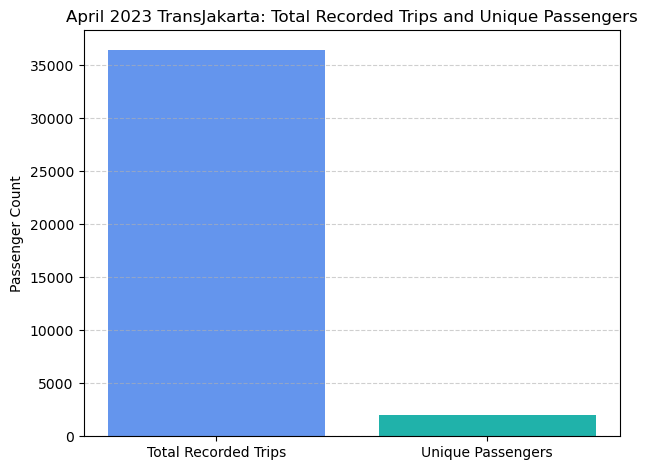

In [264]:
# Total Recorded Trips April 2023
total_trips = dfc.shape[0]
print(f"Total Recorded Trips in April 2023: {total_trips}")

# or
total_trips = len(dfc)
print(f"Total Recorded Trips in April 2023: {total_trips}")

# Total Unique Passengers
unique_passengers = dfc['payCardID'].nunique()
print(f"Total unique passengers: {unique_passengers}")

# Visualize
plt.bar(['Total Recorded Trips', 'Unique Passengers'],
        [total_trips, unique_passengers],
        color=['cornflowerblue', 'lightseagreen'])
plt.title('April 2023 TransJakarta: Total Recorded Trips and Unique Passengers')
plt.ylabel('Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [265]:
print("Top 5 Corridor IDs:\n", dfc['corridorID'].value_counts().head(), "\n")
print("Top 5 Corridor Types:\n", dfc['corridorType'].value_counts().head(), "\n")
print("Top 5 Tap-In Stops:\n", dfc['tapInStopsName'].value_counts().head(), "\n")
print("Top 5 Tap-Out Stops:\n", dfc['tapOutStopsName'].value_counts().head(), "\n")
print("Top 5 Tap-In Area Types:\n", dfc['tapInType'].value_counts().head(), "\n")
print("Top 5 Tap-Out Area Types:\n", dfc['tapOutType'].value_counts().head(), "\n")

Top 5 Corridor IDs:
 corridorID
1T        394
S21       383
JIS3      343
JAK.06    335
11P       332
Name: count, dtype: int64 

Top 5 Corridor Types:
 corridorType
Mikrotrans          13343
Integrasi           9652 
BRT                 5656 
AMARI               2131 
Transjabodetabek    2098 
Name: count, dtype: int64 

Top 5 Tap-In Stops:
 tapInStopsName
Penjaringan          235
Garuda Taman Mini    203
BKN                  163
BNN LRT              150
Pejaten              146
Name: count, dtype: int64 

Top 5 Tap-Out Stops:
 tapOutStopsName
BKN                       316
Penjaringan               265
Term. Senen               196
Monas                     167
Term. Kampung Rambutan    164
Name: count, dtype: int64 

Top 5 Tap-In Area Types:
 tapInType
Residential             9737
Other                   9735
Tourism & Recreation    5381
Office & Industrial     4432
Education               2614
Name: count, dtype: int64 

Top 5 Tap-Out Area Types:
 tapOutType
Other                   

### Weekly Overview

In [266]:
# check for date time
print("Earliest Date:", df['tapInDate'].min())
print("Latest Date:", df['tapInDate'].max())

Earliest Date: 2023-04-01
Latest Date: 2023-04-30


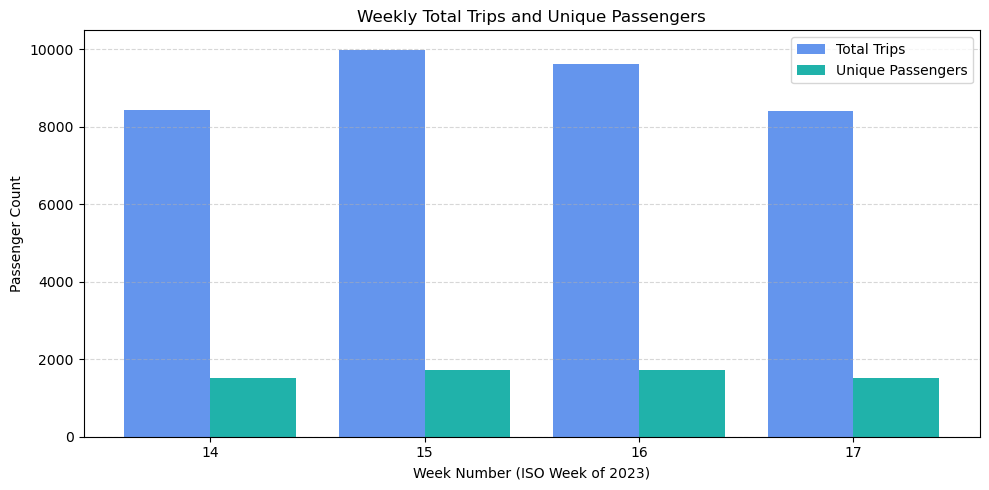

In [267]:
# Weekly commuters April 2023

# tapInDate to datetime
dfc['tapInDate'] = pd.to_datetime(dfc['tapInDate'])

# Create ISO week 
dfc['week'] = dfc['tapInDate'].dt.isocalendar().week

# removing week 13 since it is an outlier (only 1 day of April)
dfc14 = dfc[dfc['week'] >= 14]

# Group by week and compute totals
weekly_stats = dfc14.groupby('week').agg(
    total_trips=('payCardID', 'count'),
    unique_passengers=('payCardID', 'nunique')
).reset_index()

# Plotting
plt.figure(figsize=(10, 5))

# Total trips
plt.bar(weekly_stats['week'] - 0.2, weekly_stats['total_trips'], width=0.4, label='Total Trips', color='cornflowerblue')
# -0.2: offset for the bar position. no overlap

# Unique passengers
plt.bar(weekly_stats['week'] + 0.2, weekly_stats['unique_passengers'], width=0.4, label='Unique Passengers', color='lightseagreen')
# +0.2: offset for the bar position. no overlap

plt.xlabel('Week Number (ISO Week of 2023)')
plt.ylabel('Passenger Count')
plt.title('Weekly Total Trips and Unique Passengers')
plt.xticks(weekly_stats['week'])  
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Corridor Analysis

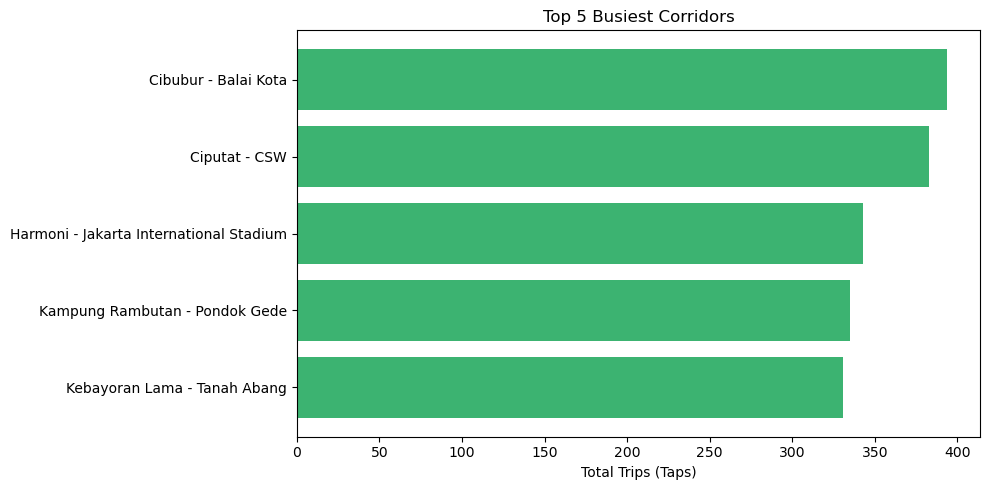

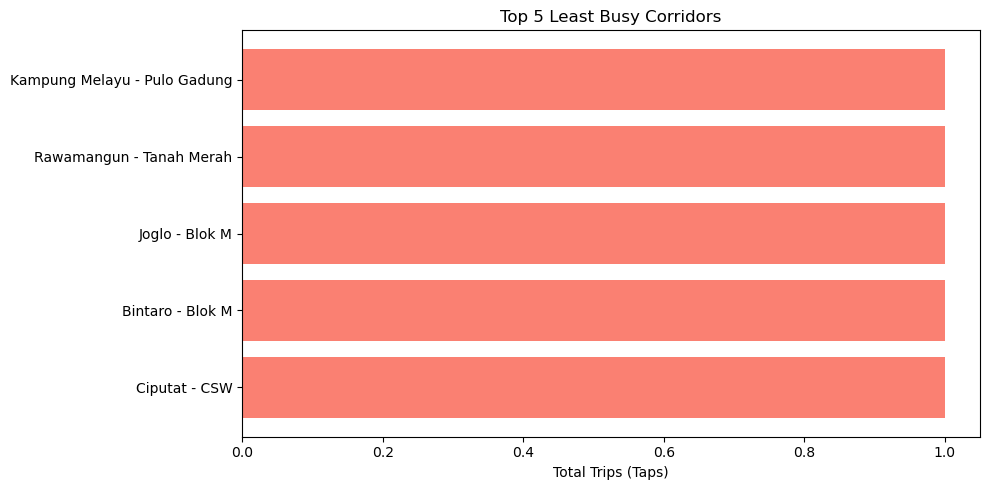

Busiest Corridors (Top 5):
    corridorID                             corridorName  total_trips
48   1T         Cibubur - Balai Kota                     394        
233  S21        Ciputat - CSW                            383        
213  JIS3       Harmoni - Jakarta International Stadium  343        
134  JAK.06     Kampung Rambutan - Pondok Gede           335        
106  8C         Kebayoran Lama - Tanah Abang             331        

Least Busy Corridors (Bottom 5):
    corridorID                  corridorName  total_trips
70   4E         Kampung Melayu - Pulo Gadung  1          
53   2E         Rawamangun - Tanah Merah      1          
45   1Q         Joglo - Blok M                1          
44   1Q         Bintaro - Blok M              1          
103  8          Ciputat - CSW                 1          


In [268]:
# Busiest and Least Busy Corridors (Total Tap-Ins)

# Group by corridor and count trips
corridor_counts = dfc.groupby(['corridorID', 'corridorName'])['payCardID'].count().reset_index()
corridor_counts.rename(columns={'payCardID': 'total_trips'}, inplace=True)

# ort by busiest and least busy
busiest = corridor_counts.sort_values('total_trips', ascending=False).head(5)
least_busy = corridor_counts.sort_values('total_trips', ascending=True).head(5)

# Plot busiest corridors
plt.figure(figsize=(10, 5))
plt.barh(busiest['corridorName'], busiest['total_trips'], color='mediumseagreen')
plt.title('Top 5 Busiest Corridors')
plt.xlabel('Total Trips (Taps)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot least busy corridors
plt.figure(figsize=(10, 5))
plt.barh(least_busy['corridorName'], least_busy['total_trips'], color='salmon')
plt.title('Top 5 Least Busy Corridors')
plt.xlabel('Total Trips (Taps)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print summaries
print("Busiest Corridors (Top 5):")
print(busiest)

print("\nLeast Busy Corridors (Bottom 5):")
print(least_busy)



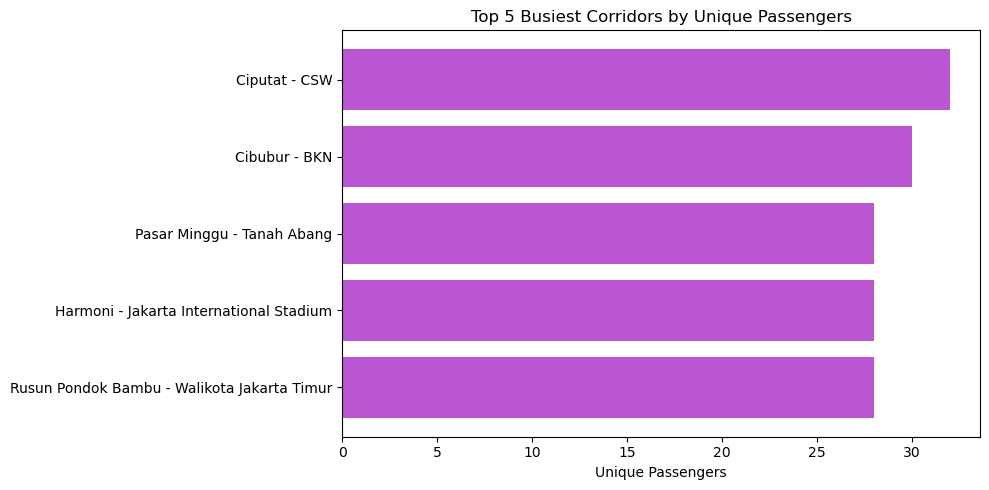

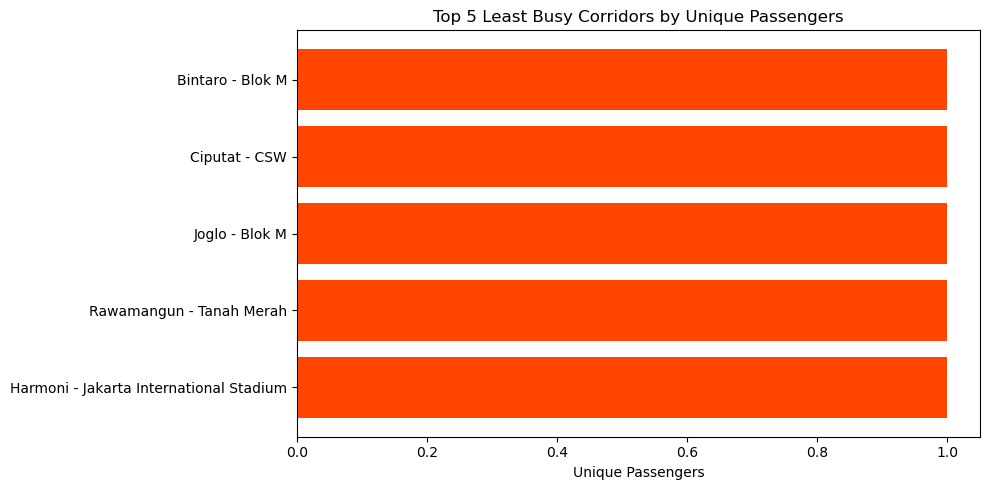

Top 5 Corridors by Unique Passengers:
    corridorID                                 corridorName  total_trips  \
233  S21        Ciputat - CSW                                383           
97   7C         Cibubur - BKN                                193           
115  9D         Pasar Minggu - Tanah Abang                   309           
213  JIS3       Harmoni - Jakarta International Stadium      343           
16   11P        Rusun Pondok Bambu - Walikota Jakarta Timur  331           

     unique_passengers  
233  32                 
97   30                 
115  28                 
213  28                 
16   28                 

Bottom 5 Corridors by Unique Passengers:
    corridorID                             corridorName  total_trips  \
44   1Q         Bintaro - Blok M                         1             
103  8          Ciputat - CSW                            1             
45   1Q         Joglo - Blok M                           1             
53   2E         Rawamangu

In [269]:
# Busiest and Least Busy Corridors (Unique Passengers)

# Group by corridor and compute both total trips & unique users
corridor_stats = dfc.groupby(['corridorID', 'corridorName']).agg(
    total_trips=('payCardID', 'count'),
    unique_passengers=('payCardID', 'nunique')
).reset_index()

# Sort by unique passengers
busiest_by_unique = corridor_stats.sort_values('unique_passengers', ascending=False).head(5)
least_by_unique = corridor_stats.sort_values('unique_passengers', ascending=True).head(5)

# Plot busiest by unique passengers
plt.figure(figsize=(10, 5))
plt.barh(busiest_by_unique['corridorName'], busiest_by_unique['unique_passengers'], color='mediumorchid')
plt.title('Top 5 Busiest Corridors by Unique Passengers')
plt.xlabel('Unique Passengers')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot least busy by unique passengers
plt.figure(figsize=(10, 5))
plt.barh(least_by_unique['corridorName'], least_by_unique['unique_passengers'], color='orangered')
plt.title('Top 5 Least Busy Corridors by Unique Passengers')
plt.xlabel('Unique Passengers')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print summaries
print("Top 5 Corridors by Unique Passengers:")
print(busiest_by_unique)

print("\nBottom 5 Corridors by Unique Passengers:")
print(least_by_unique)


Busiest Corridor Types (by Total Trips):
       corridorType  total_trips
3  Mikrotrans        13343      
2  Integrasi         9652       
1  BRT               5656       
0  AMARI             2131       
7  Transjabodetabek  2098       
5  Rusun             1881       
4  RoyalTrans        1511       
6  Tourism           218        

Unique Passengers by Corridor Type:
       corridorType  unique_passengers
3  Mikrotrans        1058             
2  Integrasi         857              
1  BRT               513              
0  AMARI             259              
5  Rusun             222              
7  Transjabodetabek  196              
4  RoyalTrans        166              
6  Tourism           16               


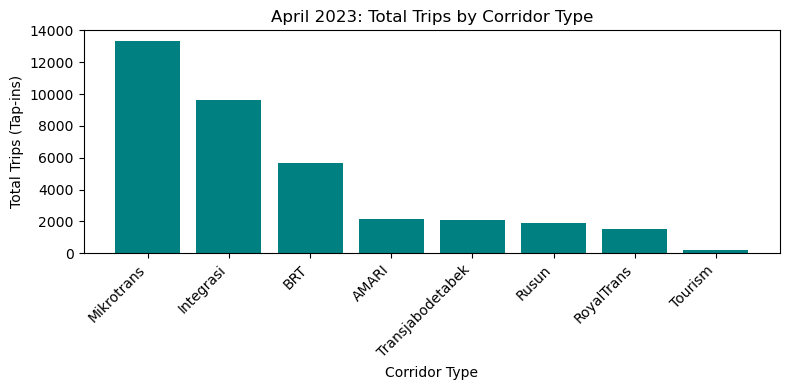

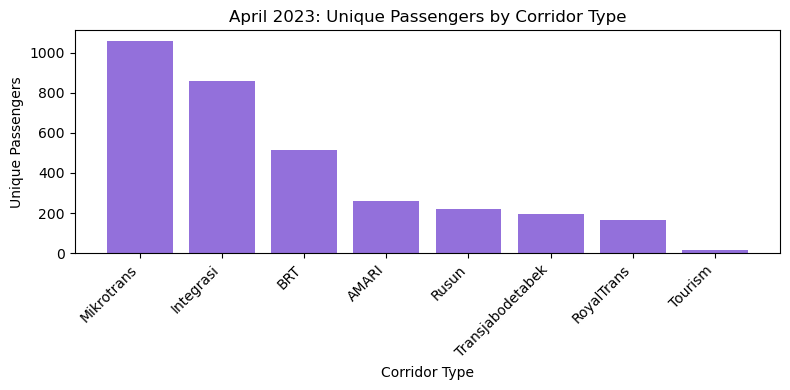

In [270]:
# Group and aggregate the April data by corridorType
type_stats = dfc.groupby('corridorType').agg(
    total_trips       = ('payCardID', 'count'),   # tap‑ins per type
    unique_passengers = ('payCardID', 'nunique')  # distinct riders per type
).reset_index()

type_stats = type_stats.sort_values('total_trips', ascending=False)
# sort busiest types are at the top

type_stats_up = type_stats.sort_values('unique_passengers', ascending=False)
# Sort by uniquepassengers

print("Busiest Corridor Types (by Total Trips):")
print(type_stats[['corridorType','total_trips']])
print("\nUnique Passengers by Corridor Type:")
print(type_stats_up[['corridorType','unique_passengers']])


# Plot Total Trips by Corridor Type
plt.figure(figsize=(8, 4))
plt.bar(type_stats['corridorType'], type_stats['total_trips'], color='teal')
plt.title('April 2023: Total Trips by Corridor Type')
plt.xlabel('Corridor Type')
plt.ylabel('Total Trips (Tap‑ins)')
plt.xticks(rotation=45, ha='right')  # rotate labels for readability
plt.tight_layout()
plt.show()

# Plot Unique Passengers by Corridor Type
type_stats_up = type_stats.sort_values('unique_passengers', ascending=False)

plt.figure(figsize=(8, 4))
plt.bar(type_stats_up['corridorType'], type_stats_up['unique_passengers'], color='mediumpurple')
plt.title('April 2023: Unique Passengers by Corridor Type')
plt.xlabel('Corridor Type')
plt.ylabel('Unique Passengers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


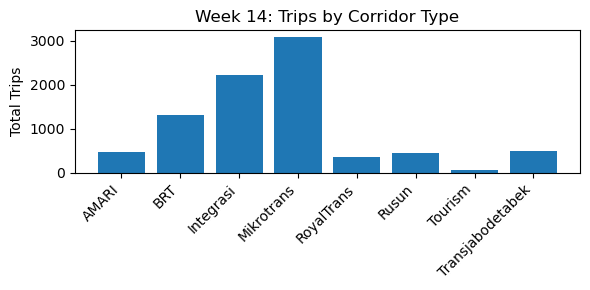

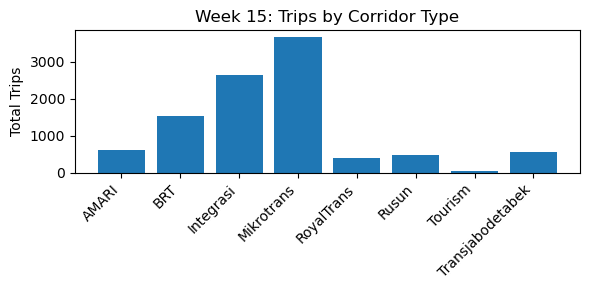

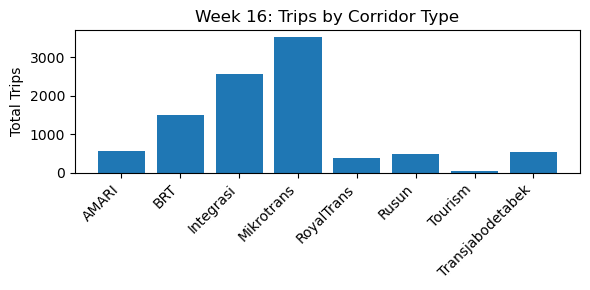

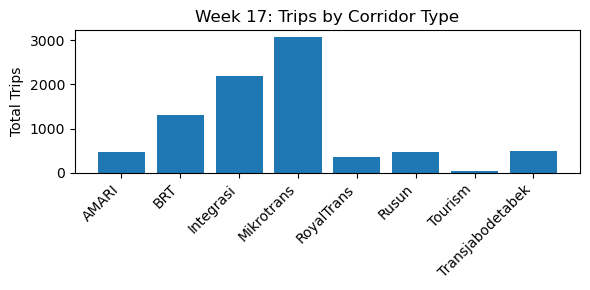

In [271]:
# Group by week and corridor type, and count the number of trips (based on unique payCardID)
weekly_type = dfc14.groupby(['week','corridorType'])['payCardID'] \
                 .count() \
                 .reset_index(name='total_trips')

# Plot each week as a small multiple 

# sort uniqe weeks
weeks = sorted(weekly_type['week'].unique())

# Loop through unique week
for wk in weeks:
    data = weekly_type[weekly_type['week']==wk]

    #bar plot
    plt.figure(figsize=(6,3))
    plt.bar(data['corridorType'], data['total_trips'])
    plt.title(f'Week {wk}: Trips by Corridor Type') # includes week number
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Total Trips')
    plt.tight_layout()
    plt.show()


## Tap-In / Out Analysis

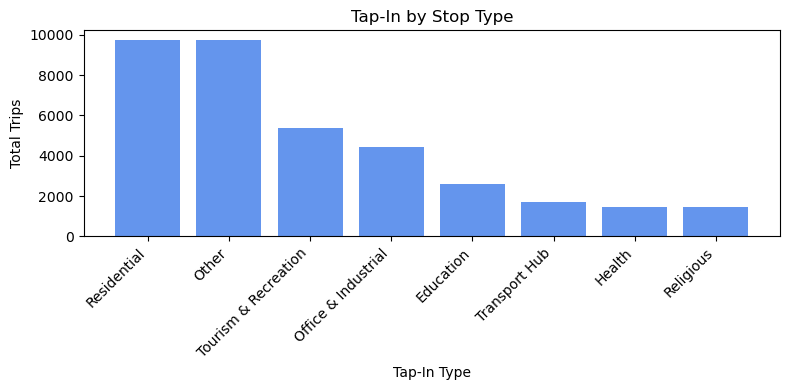

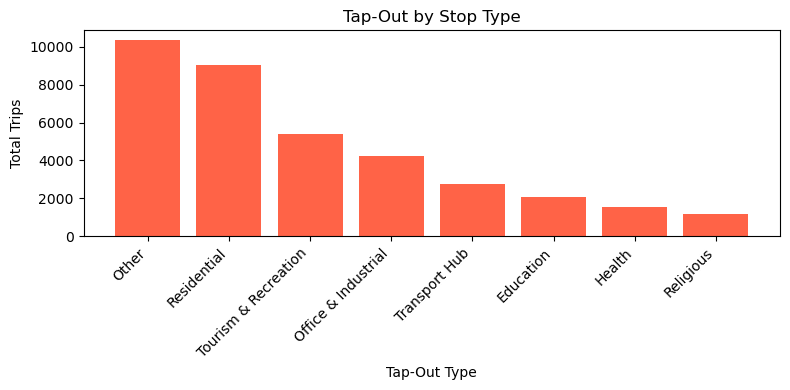

In [272]:
# Count tap-in types
tapin_type_april = dfc['tapInType'].value_counts().reset_index()
tapin_type_april.columns = ['tapInType', 'total_trips']

# Count tap-out types
tapout_type_april = dfc['tapOutType'].value_counts().reset_index()
tapout_type_april.columns = ['tapOutType', 'total_trips']

# Plot Tap-In Type
plt.figure(figsize=(8, 4))
plt.bar(tapin_type_april['tapInType'], tapin_type_april['total_trips'], color='cornflowerblue')
plt.title('Tap-In by Stop Type')
plt.xlabel('Tap-In Type')
plt.ylabel('Total Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Tap-Out Type
plt.figure(figsize=(8, 4))
plt.bar(tapout_type_april['tapOutType'], tapout_type_april['total_trips'], color='tomato')
plt.title('Tap-Out by Stop Type')
plt.xlabel('Tap-Out Type')
plt.ylabel('Total Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


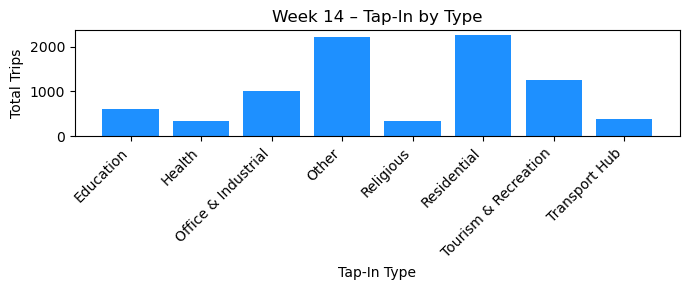

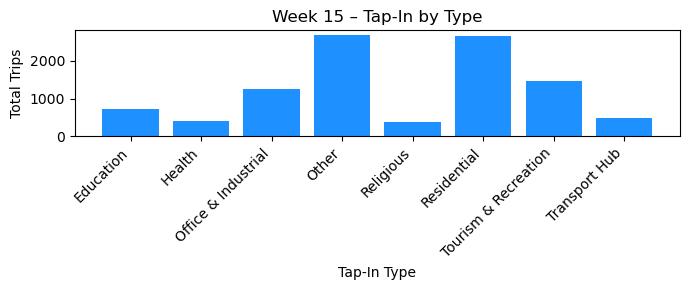

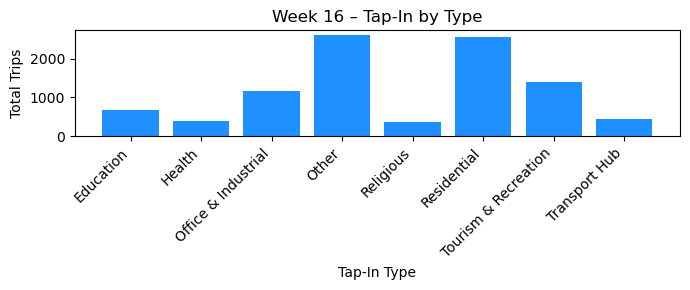

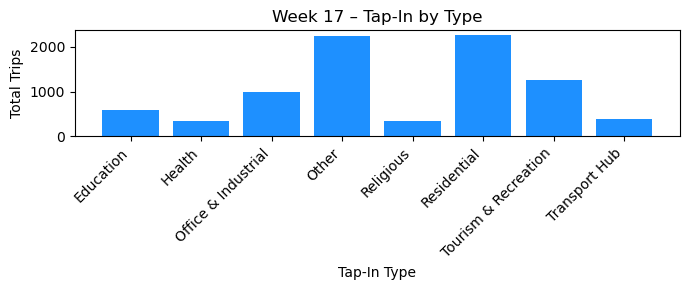

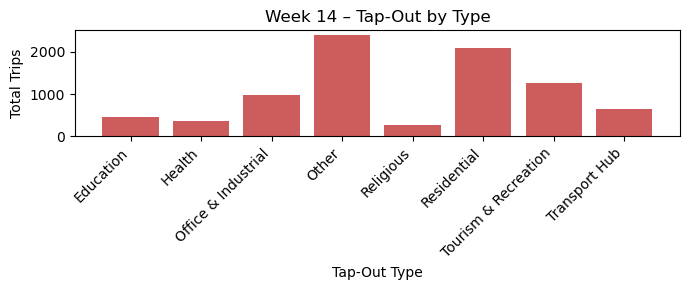

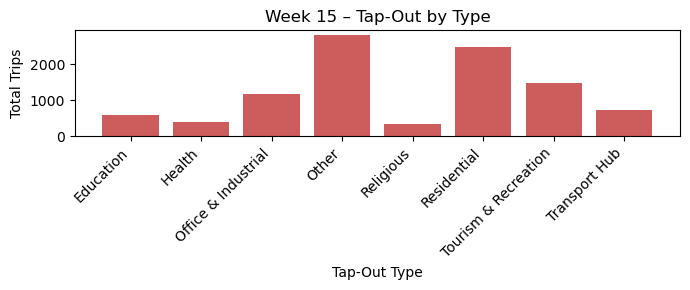

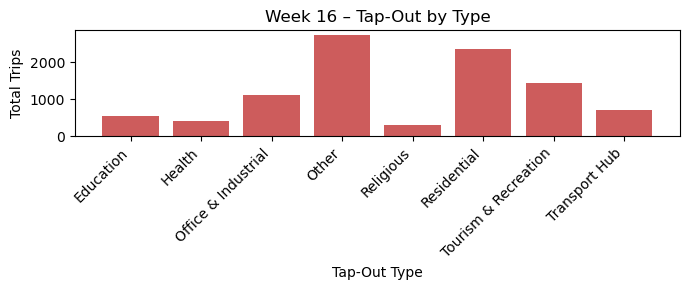

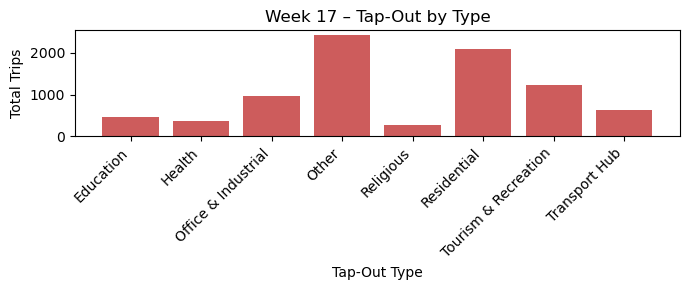

In [273]:
# Weekly tap-in type
weekly_tapin_type = dfc14.groupby(['week', 'tapInType'])['payCardID'] \
                       .count().reset_index(name='total_trips')

# Weekly tap-out type
weekly_tapout_type = dfc14.groupby(['week', 'tapOutType'])['payCardID'] \
                        .count().reset_index(name='total_trips')

# Plot tap-in weekly
for wk in sorted(weekly_tapin_type['week'].unique()):
    data = weekly_tapin_type[weekly_tapin_type['week'] == wk]
    plt.figure(figsize=(7, 3))
    plt.bar(data['tapInType'], data['total_trips'], color='dodgerblue')
    plt.title(f'Week {wk} – Tap-In by Type')
    plt.xlabel('Tap-In Type')
    plt.ylabel('Total Trips')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot tap-out weekly
for wk in sorted(weekly_tapout_type['week'].unique()):
    data = weekly_tapout_type[weekly_tapout_type['week'] == wk]
    plt.figure(figsize=(7, 3))
    plt.bar(data['tapOutType'], data['total_trips'], color='indianred')
    plt.title(f'Week {wk} – Tap-Out by Type')
    plt.xlabel('Tap-Out Type')
    plt.ylabel('Total Trips')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


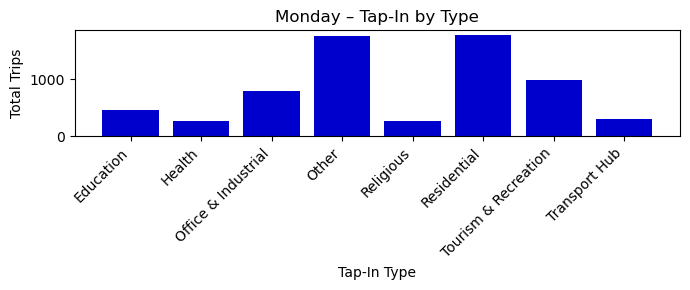

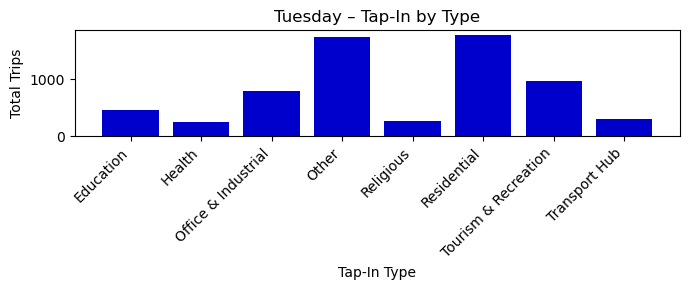

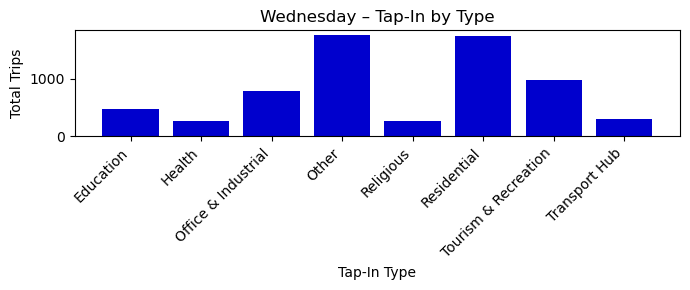

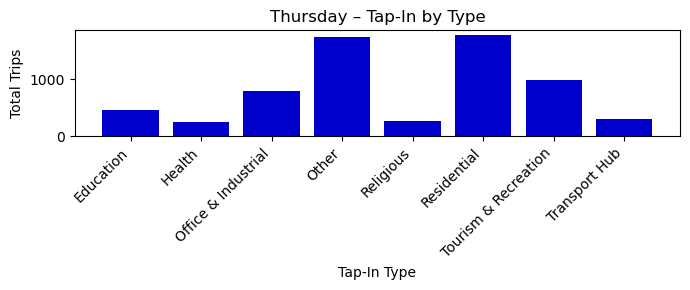

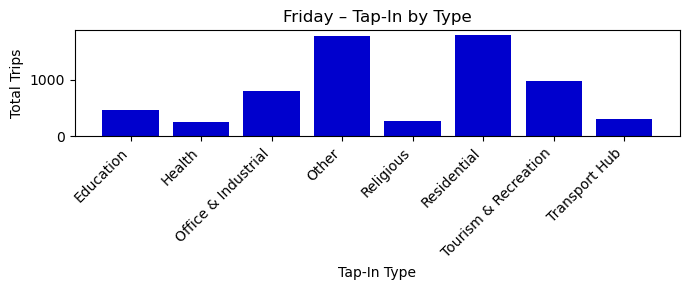

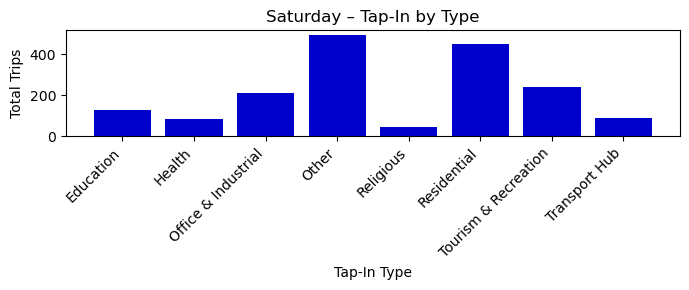

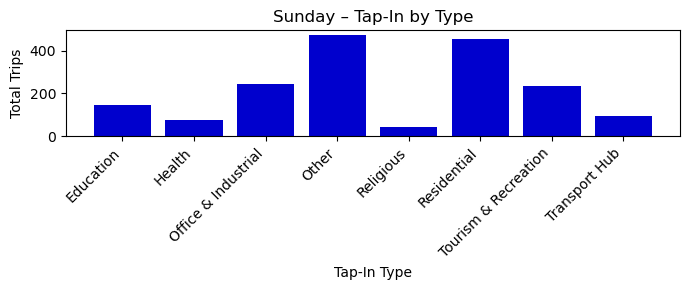

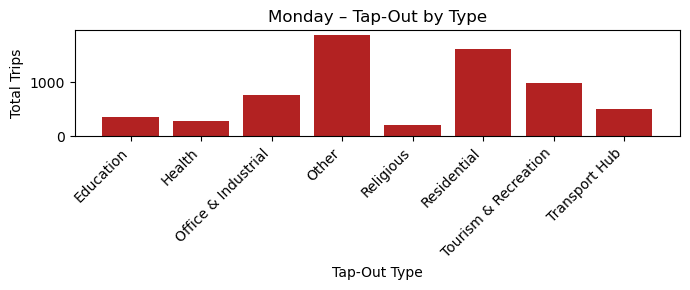

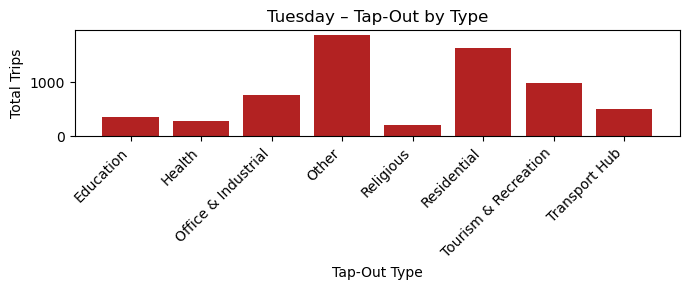

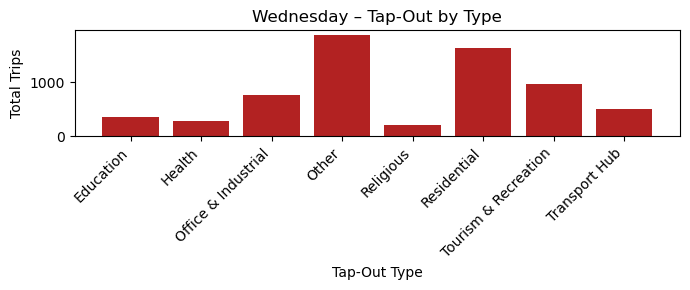

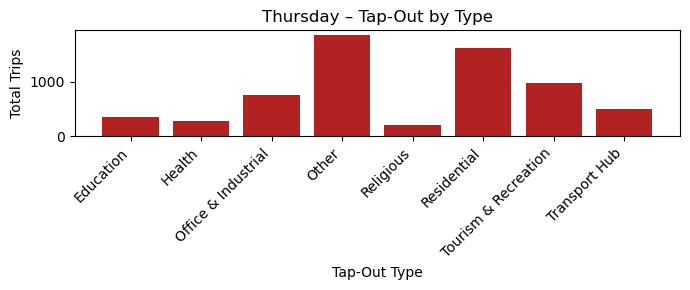

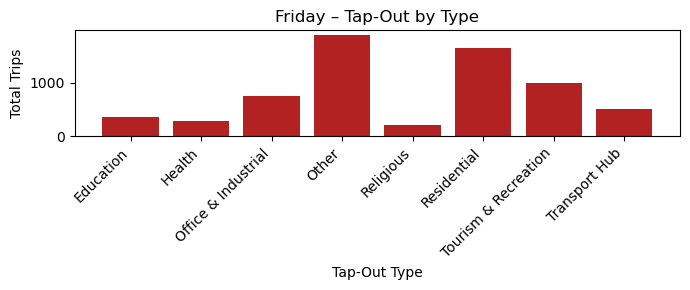

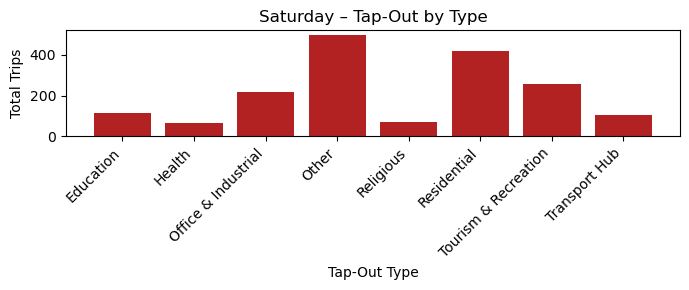

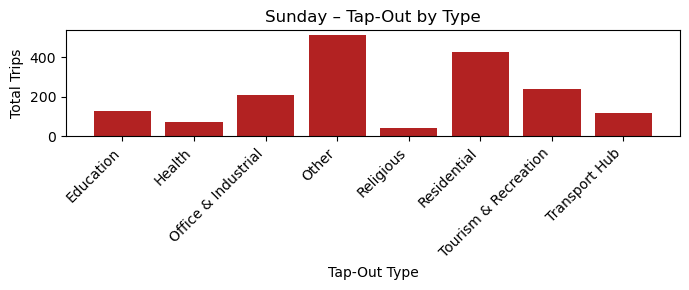

In [274]:
# tapInDayName column

# dayname as datetime
dfc['tapInDayName'] = pd.to_datetime(dfc['tapInDate']).dt.day_name()

# ordering days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# to categorical in order
dfc['tapInDayName'] = pd.Categorical(dfc['tapInDayName'], categories=day_order, ordered=True)

# Daily tap-in
daily_tapin = dfc.groupby(['tapInDayName', 'tapInType'])['payCardID'] \
                 .count().reset_index(name='total_trips')

# Daily tap-out
daily_tapout = dfc.groupby(['tapInDayName', 'tapOutType'])['payCardID'] \
                  .count().reset_index(name='total_trips')

# Plot per day (Tap-In)
for day in day_order:
    d = daily_tapin[daily_tapin['tapInDayName'] == day]
    if not d.empty:
        plt.figure(figsize=(7, 3))
        plt.bar(d['tapInType'], d['total_trips'], color='mediumblue')
        plt.title(f'{day} – Tap-In by Type')
        plt.xlabel('Tap-In Type')
        plt.ylabel('Total Trips')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Plot per day (Tap-Out)
for day in day_order:
    d = daily_tapout[daily_tapout['tapInDayName'] == day]
    if not d.empty:
        plt.figure(figsize=(7, 3))
        plt.bar(d['tapOutType'], d['total_trips'], color='firebrick')
        plt.title(f'{day} – Tap-Out by Type')
        plt.xlabel('Tap-Out Type')
        plt.ylabel('Total Trips')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


## Stops Analysis

In [275]:
# Aggregate per stop: total trips and unique passengers
stop_stats = dfc.groupby('tapInStopsName').agg(
    total_trips        = ('payCardID', 'count'),
    unique_passengers  = ('payCardID', 'nunique')
).reset_index()

# Top 5 busiest by total trips
busiest_trips = stop_stats.sort_values('total_trips', ascending=False).head()

# Top 5 least busy by total trips
least_trips   = stop_stats.sort_values('total_trips', ascending=True).head()

# Top 5 busiest by unique passengers
busiest_unique = stop_stats.sort_values('unique_passengers', ascending=False).head()

# Top 5 least busy by unique passengers
least_unique   = stop_stats.sort_values('unique_passengers', ascending=True).head()

print("Busiest Stops by Total Trips:")
print(busiest_trips)
print("\nLeast Busy Stops by Total Trips:")
print(least_trips)
print("\nBusiest Stops by Unique Passengers:")
print(busiest_unique)
print("\nLeast Busy Stops by Unique Passengers:")
print(least_unique)

Busiest Stops by Total Trips:
         tapInStopsName  total_trips  unique_passengers
1246  Penjaringan        235          22               
265   Garuda Taman Mini  203          16               
52    BKN                163          17               
58    BNN LRT            150          21               
1227  Pejaten            146          13               

Least Busy Stops by Total Trips:
                tapInStopsName  total_trips  unique_passengers
2506  Yos Sudarso Kodamar       1            1                
829   Kantor Pos Cikini         1            1                
830   Kantor Pos Dukuh          1            1                
1939  Sbr. Pos Ayam             1            1                
1938  Sbr. Port Medical Center  1            1                

Busiest Stops by Unique Passengers:
         tapInStopsName  total_trips  unique_passengers
1246  Penjaringan        235          22               
58    BNN LRT            150          21               
52    BKN        

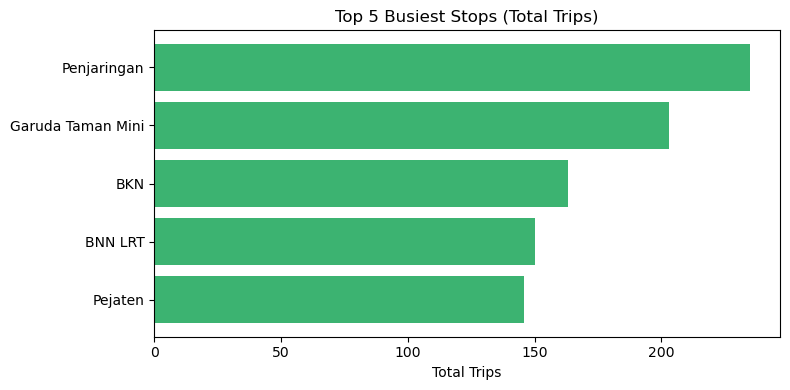

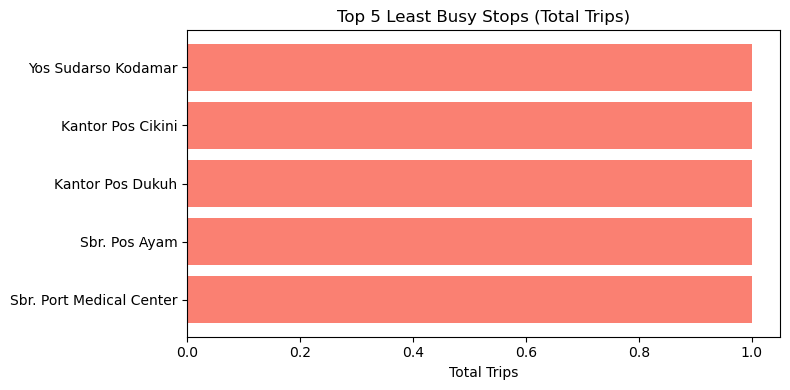

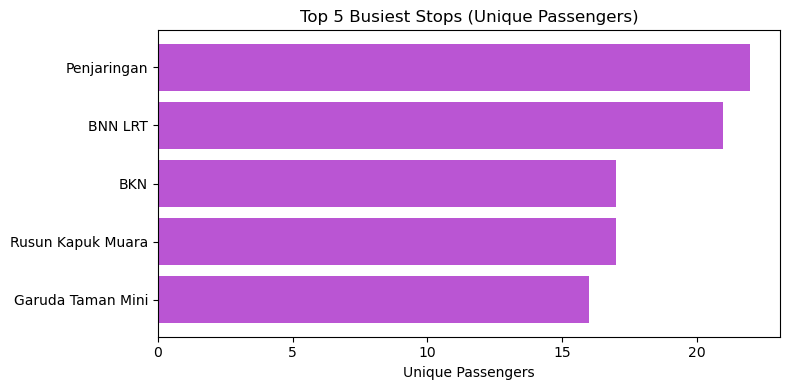

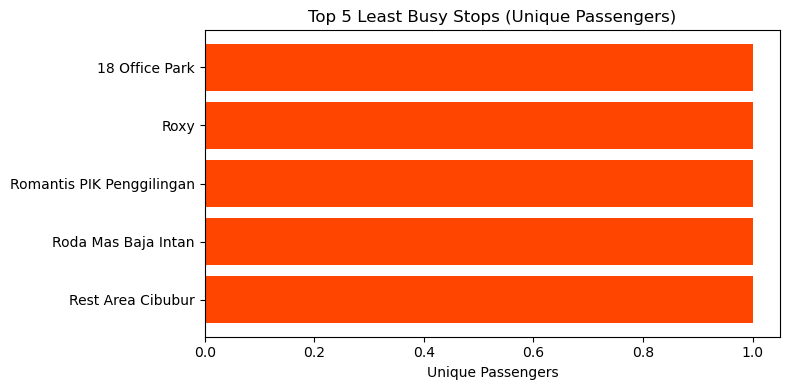

In [276]:
# Plotting helper
def plot_barh(df, value_col, title, color):
    plt.figure(figsize=(8, 4))
    plt.barh(df['tapInStopsName'], df[value_col], color=color)
    plt.title(title)
    plt.xlabel(value_col.replace('_', ' ').title()) # ex 'tap_count' becomes 'Tap Count'
    plt.gca().invert_yaxis()  # highest at top
    plt.tight_layout()
    plt.show()

# Visualize overall busiest / least by total trips
plot_barh(busiest_trips, 'total_trips',   'Top 5 Busiest Stops (Total Trips)', 'mediumseagreen')
plot_barh(least_trips,   'total_trips',   'Top 5 Least Busy Stops (Total Trips)', 'salmon')

# Visualize overall busiest / least by unique passengers
plot_barh(busiest_unique, 'unique_passengers', 'Top 5 Busiest Stops (Unique Passengers)', 'mediumorchid')
plot_barh(least_unique,   'unique_passengers', 'Top 5 Least Busy Stops (Unique Passengers)', 'orangered')

    originCorridorGroup  total_trips  unique_passengers
0  Non‑Tourism Corridor  493          370              
1  Tourism Corridor      5            5                


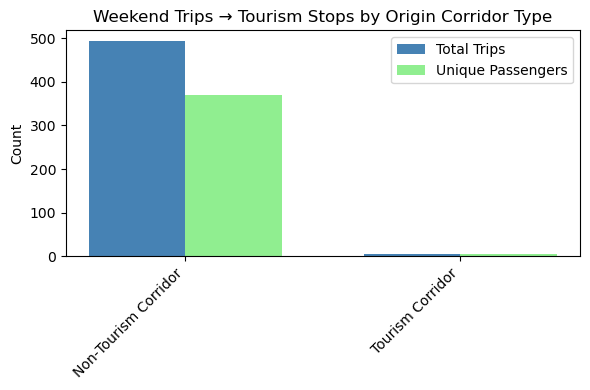

In [277]:
# Filter to weekend
weekend = dfc[dfc['tapInDayName'].isin(['Saturday','Sunday'])]

# trips that END at a Tourism & Recreation stop
weekend_to_tourism = weekend[weekend['tapOutType'] == 'Tourism & Recreation']

# Classify as 'Tourism Corridor' or 'Non‑Tourism Corridor'
weekend_to_tourism['originCorridorGroup'] = weekend_to_tourism['corridorType'] \
    .apply(lambda x: 'Tourism Corridor' if x=='Tourism' else 'Non‑Tourism Corridor')

# Aggregate counts by that group
flow_counts = weekend_to_tourism.groupby('originCorridorGroup')['payCardID'] \
    .agg(total_trips='count', unique_passengers='nunique') \
    .reset_index()

print(flow_counts)

# Plot the comparison side‑by‑side
labels = flow_counts['originCorridorGroup']  # x-axis labels
totals = flow_counts['total_trips']          # Total number of trips
uniques = flow_counts['unique_passengers']   # Unique passenger count

# positions for each group
x = range(len(labels))
width = 0.35

# Plot bargraph
plt.figure(figsize=(6,4))
plt.bar(x, totals, width, label='Total Trips', color='steelblue')
plt.bar([i+width for i in x], uniques, width, label='Unique Passengers', color='lightgreen') #  Plot unique passengers next to total trips
plt.xticks([i+width/2 for i in x], labels, rotation=45, ha='right') # Set x-axis labels and position them between the grouped bars
plt.ylabel('Count')
plt.title('Weekend Trips → Tourism Stops by Origin Corridor Type')
plt.legend()
plt.tight_layout()
plt.show()


Weekday → Tourism Stop Flows
    originCorridorGroup  total_trips  unique_passengers
0  Non‑Tourism Corridor  4746         303              
1  Tourism Corridor      157          6                


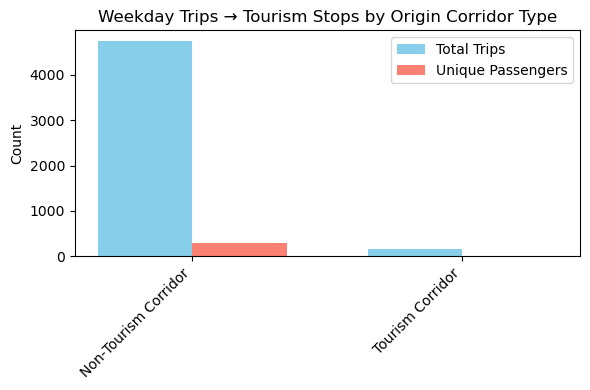

In [278]:
# Filter to weekdays
weekday = dfc[~dfc['tapInDayName'].isin(['Saturday','Sunday'])]

# trips that end at a Tourism & Recreation stop
weekday_to_tourism = weekday[weekday['tapOutType'] == 'Tourism & Recreation']

# Classify as 'Tourism Corridor' or 'Non‑Tourism Corridor'
weekday_to_tourism['originCorridorGroup'] = weekday_to_tourism['corridorType'] \
    .apply(lambda x: 'Tourism Corridor' if x=='Tourism' else 'Non‑Tourism Corridor')

# Aggregate counts total trips and unique passengers
flow_counts_wd = weekday_to_tourism.groupby('originCorridorGroup')['payCardID'] \
    .agg(total_trips='count', unique_passengers='nunique') \
    .reset_index()

print("Weekday → Tourism Stop Flows")
print(flow_counts_wd)

# Plot side‑by‑side comparison
labels = flow_counts_wd['originCorridorGroup']
totals = flow_counts_wd['total_trips']
uniques = flow_counts_wd['unique_passengers']

x = range(len(labels))
width = 0.35  # bar width

# Plot bargraph
plt.figure(figsize=(6,4))
plt.bar(x, totals, width, label='Total Trips', color='skyblue')
plt.bar([i+width for i in x], uniques, width, label='Unique Passengers', color='salmon')
plt.xticks([i+width/2 for i in x], labels, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Weekday Trips → Tourism Stops by Origin Corridor Type')
plt.legend()
plt.tight_layout()
plt.show()


Non-Tourism corridor dwarfs tourism corridor on weekends and weekdays (might be due to the extend of non-tourism corridors)

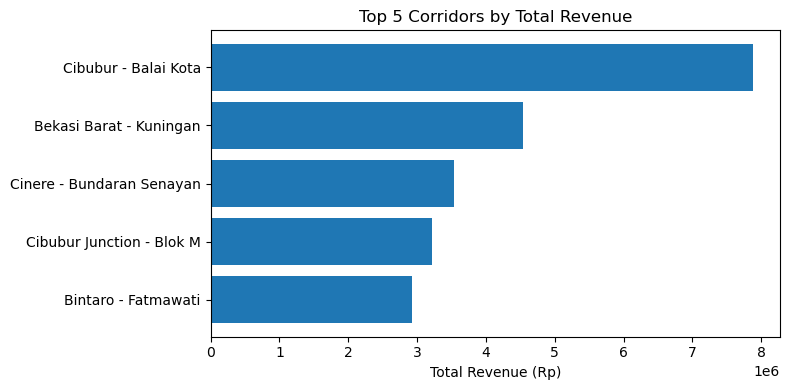

             corridorName  total_revenue
     Cibubur - Balai Kota      7880000.0
  Bekasi Barat - Kuningan      4540000.0
Cinere - Bundaran Senayan      3540000.0
Cibubur Junction - Blok M      3220000.0
      Bintaro - Fatmawati      2920000.0

----------------------------------------



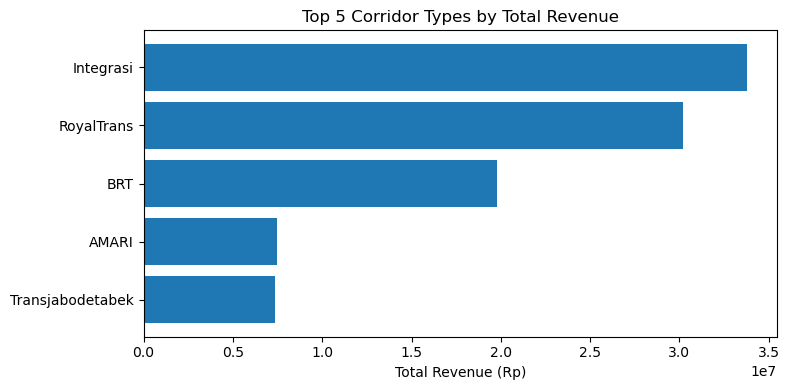

    corridorType  total_revenue
       Integrasi     33782000.0
      RoyalTrans     30220000.0
             BRT     19796000.0
           AMARI      7458500.0
Transjabodetabek      7343000.0

----------------------------------------



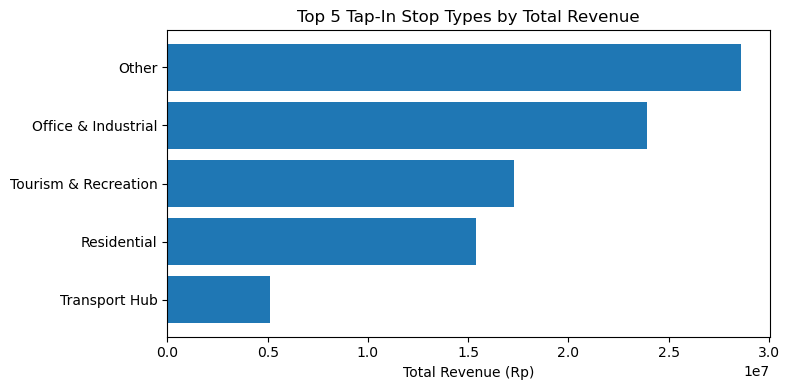

           tapInType  total_revenue
               Other     28611500.0
 Office & Industrial     23898000.0
Tourism & Recreation     17263000.0
         Residential     15378000.0
       Transport Hub      5113000.0

----------------------------------------



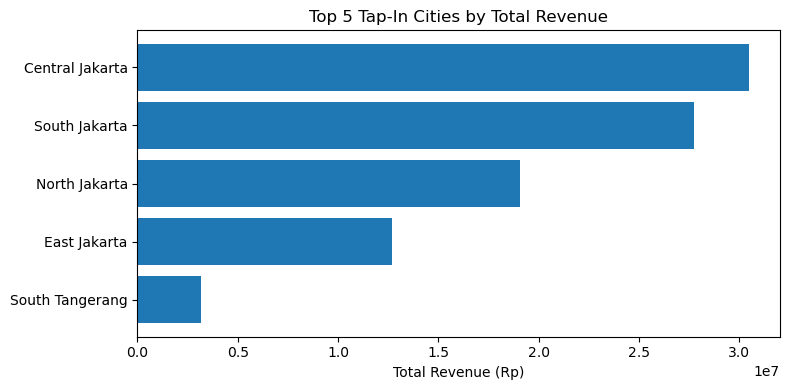

      tapInCity  total_revenue
Central Jakarta     30502000.0
  South Jakarta     27736500.0
  North Jakarta     19046000.0
   East Jakarta     12703500.0
South Tangerang      3149500.0

----------------------------------------



In [279]:
# Helper to plot top 5 categories
def plot_top(df, category_col, value_col, title, top_n=5):
    """
    df            : DataFrame with category_col and value_col
    category_col  : column name to group by
    value_col     : numeric column to sum
    title         : chart title
    top_n         : how many top items to show
    """
    # Group & sum
    stats = df.groupby(category_col)[value_col] \
              .sum() \
              .reset_index(name='total_revenue')
    # Sort descending and take top_n
    top = stats.sort_values('total_revenue', ascending=False).head(top_n)
    
    # Plot bargraph
    plt.figure(figsize=(8, 4))
    plt.barh(top[category_col], top['total_revenue'])
    plt.gca().invert_yaxis()  # highest on top
    plt.title(title)
    plt.xlabel('Total Revenue (Rp)')
    plt.tight_layout()
    plt.show()
    
    # Print top table
    print(top.to_string(index=False))
    print("\n" + "-"*40 + "\n")

# Most profitable corridors
plot_top(
    dfc,
    category_col='corridorName',
    value_col='payAmount',
    title='Top 5 Corridors by Total Revenue'
)

# Most profitable bus types
plot_top(
    dfc,
    category_col='corridorType',
    value_col='payAmount',
    title='Top 5 Corridor Types by Total Revenue'
)

# Most profitable stop types
plot_top(
    dfc,
    category_col='tapInType',
    value_col='payAmount',
    title='Top 5 Tap-In Stop Types by Total Revenue'
)

# Most profitable cities
plot_top(
    dfc,
    category_col='tapInCity',
    value_col='payAmount',
    title='Top 5 Tap-In Cities by Total Revenue'
)


## Daily and Rush Hour Analysis

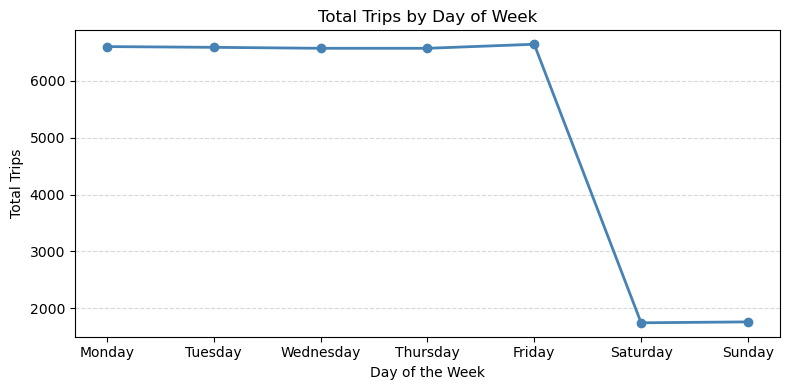

Total Trips by Day of the Week:
tapInDayName  total_trips
      Monday         6604
     Tuesday         6591
   Wednesday         6574
    Thursday         6574
      Friday         6645
    Saturday         1743
      Sunday         1759


In [280]:
# Group by day and count trips (i.e. tap-ins)
busiest_by_day = dfc.groupby('tapInDayName')['payCardID'] \
                    .count() \
                    .reset_index(name='total_trips')

# order days as categories
busiest_by_day['tapInDayName'] = pd.Categorical(busiest_by_day['tapInDayName'], categories=day_order, ordered=True)
busiest_by_day = busiest_by_day.sort_values('tapInDayName')


# Plot linegraph
plt.figure(figsize=(8, 4))
plt.plot(busiest_by_day['tapInDayName'], busiest_by_day['total_trips'], 
         marker='o', color='steelblue', linewidth=2)
plt.title('Total Trips by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Trips')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print values
print("Total Trips by Day of the Week:")
print(busiest_by_day.to_string(index=False))

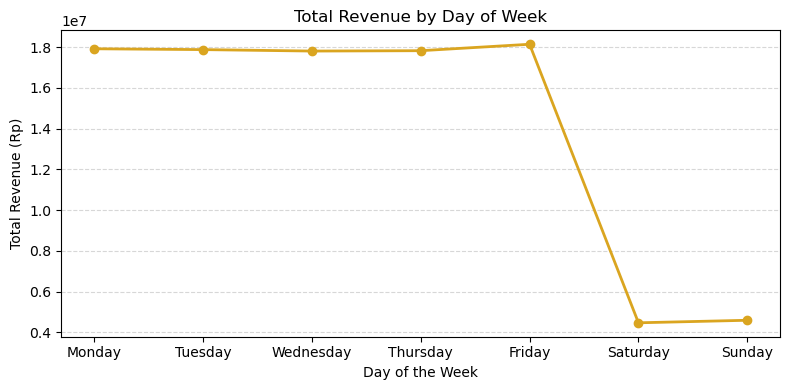

Revenue by Day of the Week:
tapInDayName  total_revenue
      Monday     17914500.0
     Tuesday     17873500.0
   Wednesday     17802500.0
    Thursday     17820000.0
      Friday     18136000.0
    Saturday      4464500.0
      Sunday      4588500.0


In [281]:
# 3) Group by day of the week and sum payAmount
revenue_by_day = dfc.groupby('tapInDayName')['payAmount'] \
                    .sum() \
                    .reset_index(name='total_revenue')

# order days as categories
revenue_by_day['tapInDayName'] = pd.Categorical(revenue_by_day['tapInDayName'], categories=day_order, ordered=True)
revenue_by_day = revenue_by_day.sort_values('tapInDayName')


# Plot linegraph
plt.figure(figsize=(8, 4))
plt.plot(revenue_by_day['tapInDayName'], revenue_by_day['total_revenue'], 
         marker='o', color='goldenrod', linewidth=2)
plt.title('Total Revenue by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue (Rp)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print results
print("Revenue by Day of the Week:")
print(revenue_by_day.to_string(index=False))

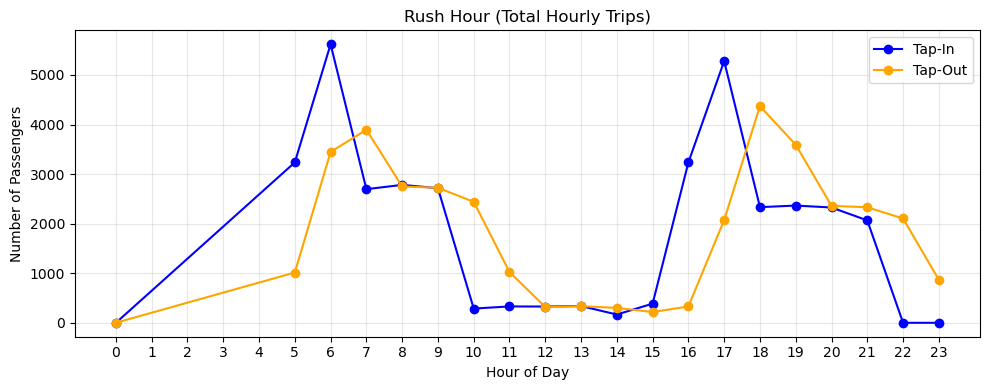

In [282]:
# Total tap-ins per hour
rush_in = dfc['tapInHour'].value_counts().sort_index().reset_index()
rush_in.columns = ['hour', 'tapInCount']

# Total tap-outs per hour
rush_out = dfc['tapOutHour'].value_counts().sort_index().reset_index()
rush_out.columns = ['hour', 'tapOutCount']

# Combine for plotting
rush = pd.merge(rush_in, rush_out, on='hour', how='outer').fillna(0).sort_values('hour')

# Plot
plt.figure(figsize=(10, 4))
plt.plot(rush['hour'], rush['tapInCount'], marker='o', label='Tap-In', color='blue')
plt.plot(rush['hour'], rush['tapOutCount'], marker='o', label='Tap-Out', color='orange')
plt.title('Rush Hour (Total Hourly Trips)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


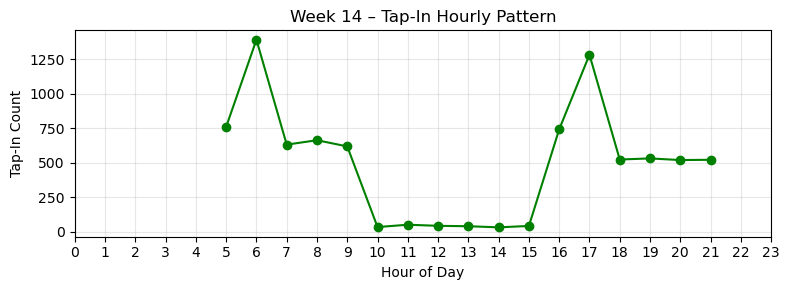

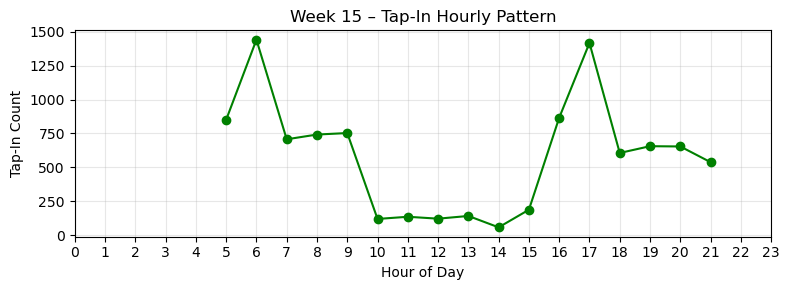

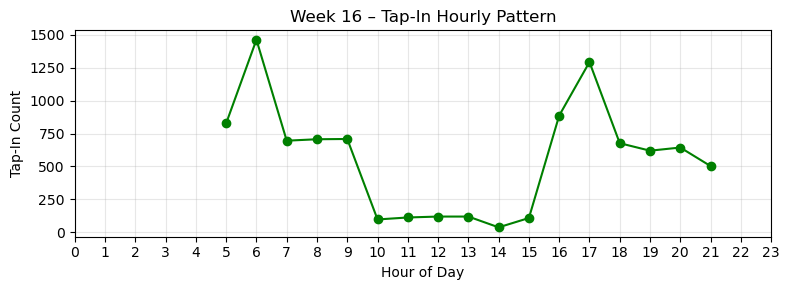

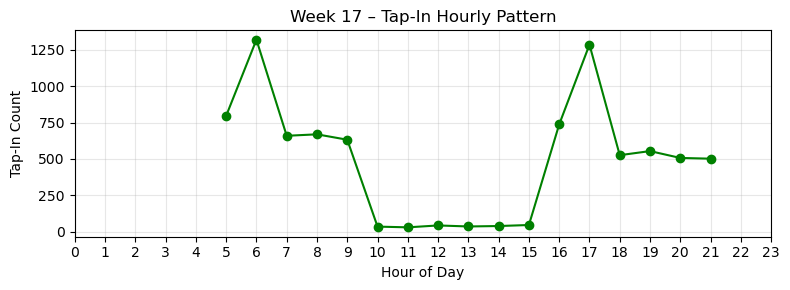

In [283]:
# Group by week and hour
weekly_hour = dfc14.groupby(['week', 'tapInHour']).size().reset_index(name='tapInCount')

# Plot each week’s rush pattern
for w in sorted(weekly_hour['week'].unique()):
    data = weekly_hour[weekly_hour['week'] == w]
    plt.figure(figsize=(8, 3))
    plt.plot(data['tapInHour'], data['tapInCount'], marker='o', color='green')
    plt.title(f'Week {w} – Tap-In Hourly Pattern')
    plt.xlabel('Hour of Day')
    plt.ylabel('Tap-In Count')
    plt.xticks(range(0, 24))
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


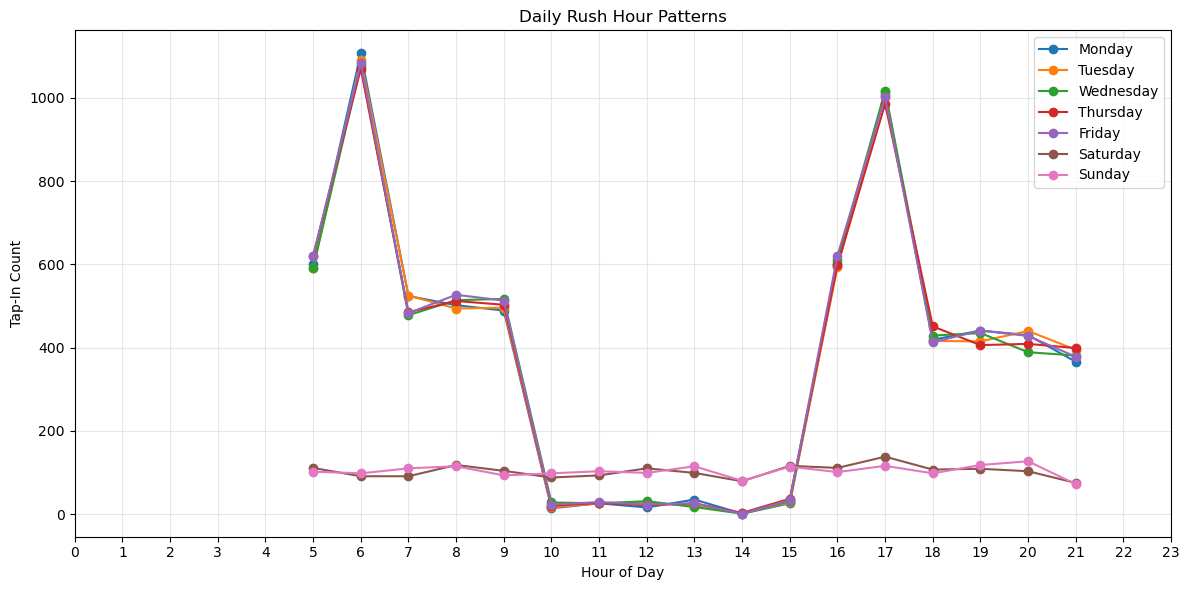

In [284]:
# Group by day of week and hour
dfc['tapInDayName'] = pd.to_datetime(dfc['tapInDate'], errors='coerce').dt.day_name()
daily_hour = dfc.groupby(['tapInDayName', 'tapInHour']).size().reset_index(name='tapInCount')

# Order day names
daily_hour['tapInDayName'] = pd.Categorical(daily_hour['tapInDayName'], categories=day_order, ordered=True)

# Plot one line per day
plt.figure(figsize=(12, 6))
for day in day_order:
    day_data = daily_hour[daily_hour['tapInDayName'] == day]
    plt.plot(day_data['tapInHour'], day_data['tapInCount'], marker='o', label=day)

plt.title('Daily Rush Hour Patterns')
plt.xlabel('Hour of Day')
plt.ylabel('Tap-In Count')
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


## Bank Analysis

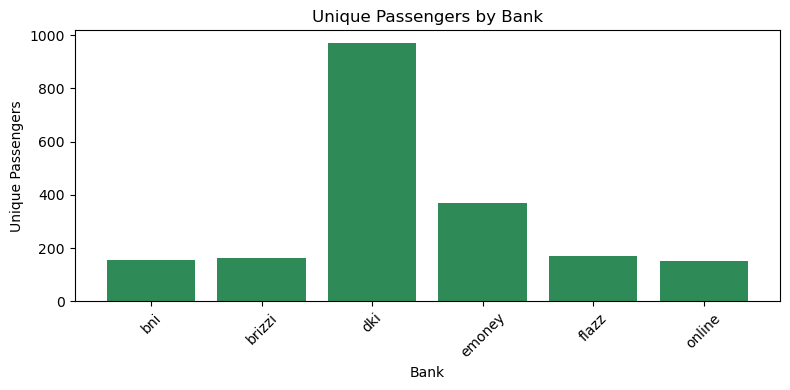

Unique Passenger Count per Bank:
payCardBank  unique_passengers
        bni                155
     brizzi                164
        dki                970
     emoney                370
      flazz                171
     online                150


In [285]:
# Unique payCardID per bank
unique_users_per_bank = dfc.groupby('payCardBank')['payCardID'].nunique().reset_index()
unique_users_per_bank.columns = ['payCardBank', 'unique_passengers']

# Plot
plt.figure(figsize=(8, 4))
plt.bar(unique_users_per_bank['payCardBank'], unique_users_per_bank['unique_passengers'], color='seagreen')
plt.title('Unique Passengers by Bank')
plt.xlabel('Bank')
plt.ylabel('Unique Passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show values
print("Unique Passenger Count per Bank:")
print(unique_users_per_bank.to_string(index=False))


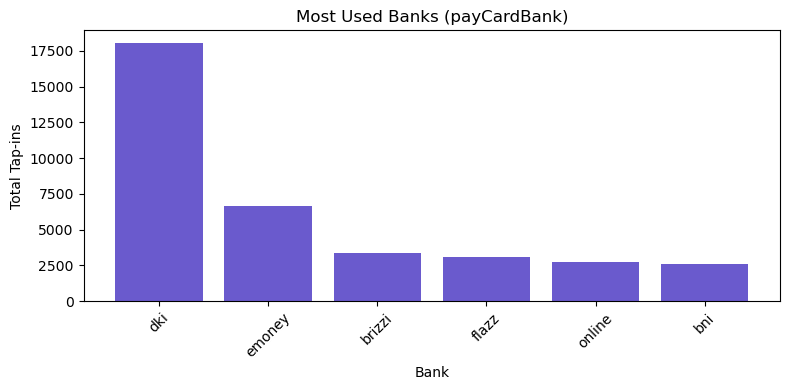

Bank Usage Summary (April):
payCardBank  total_trips
        dki        18026
     emoney         6627
     brizzi         3390
      flazz         3101
     online         2767
        bni         2579


In [286]:
# Count total cards per bank
bank_counts = dfc['payCardBank'].value_counts().reset_index()
bank_counts.columns = ['payCardBank', 'total_trips']

# Plot
plt.figure(figsize=(8, 4))
plt.bar(bank_counts['payCardBank'], bank_counts['total_trips'], color='slateblue')
plt.title('Most Used Banks (payCardBank)')
plt.xlabel('Bank')
plt.ylabel('Total Tap-ins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show values
print("Bank Usage Summary (April):")
print(bank_counts.to_string(index=False))


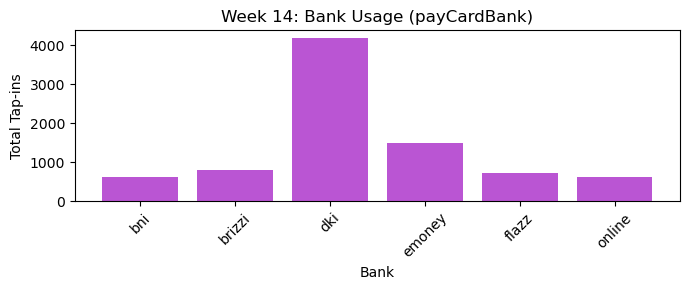

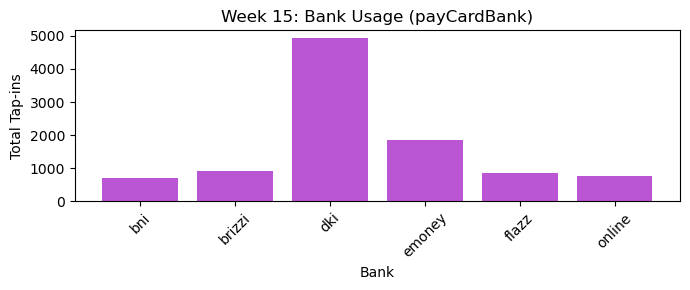

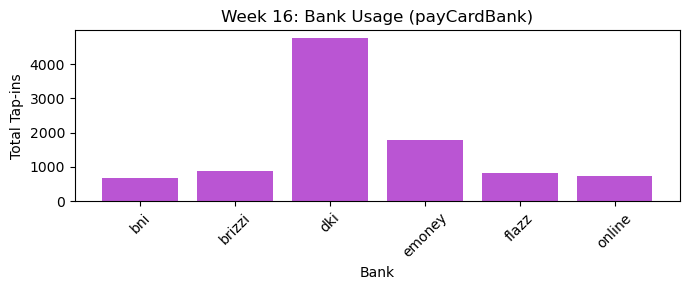

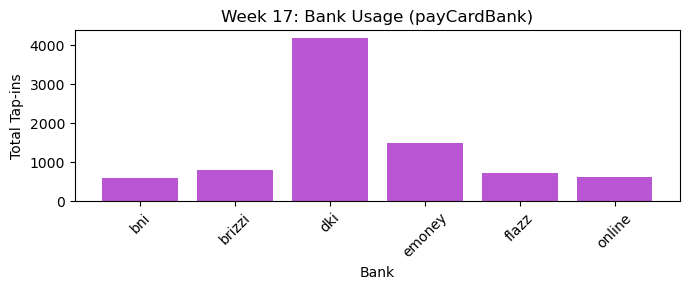

In [287]:
# Count usage by week + bank
weekly_bank = dfc14.groupby(['week', 'payCardBank'])['payCardID'] \
                 .count().reset_index(name='total_trips')

# Plot weekly trends
for w in sorted(weekly_bank['week'].unique()):
    dfw = weekly_bank[weekly_bank['week'] == w]
    plt.figure(figsize=(7, 3))
    plt.bar(dfw['payCardBank'], dfw['total_trips'], color='mediumorchid')
    plt.title(f'Week {w}: Bank Usage (payCardBank)')
    plt.xlabel('Bank')
    plt.ylabel('Total Tap-ins')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [288]:
# Group by user and count how many unique banks they used
bank_switchers = dfc.groupby('payCardID')['payCardBank'] \
                    .nunique().reset_index(name='num_banks')

# Users who used more than 1 bank = switchers
switchers = bank_switchers[bank_switchers['num_banks'] > 1]
switch_count = switchers.shape[0]
total_users = dfc['payCardID'].nunique()

print(f"Total passengers who used more than 1 bank: {switch_count}")
print(f"Out of total unique passengers: {total_users}")
print(f"Percentage who switched banks: {switch_count / total_users:.2%}")


Total passengers who used more than 1 bank: 0
Out of total unique passengers: 1980
Percentage who switched banks: 0.00%


Bank DKI is the most widely used (might be due to DKI Government's programs)

## Missing Tap-Out Analysis

In [289]:
# Apply tap type category regex pattern to df
df_no_tapout['tapInType']  = df_no_tapout['tapInStopsName'].apply(classify_stop)
df_no_tapout['tapOutType'] = df_no_tapout['tapOutStopsName'].apply(classify_stop)

# Reorder columns so the new types after their source names
cols = list(df_no_tapout.columns)
for src, new in [('tapInStopsName','tapInType'), ('tapOutStopsName','tapOutType')]:
    if new in cols and src in cols:
        cols.remove(new)
        idx = cols.index(src)
        cols.insert(idx+1, new)
df_no_tapout = df_no_tapout[cols]
# cols.remove(new)  # Remove the new column from its current position
# idx = cols.index(src)  # Find the index of the source column
# cols.insert(idx + 1, new)  # Insert the new column right after the source column

In [290]:
# Check total and percentage of not tapped out
total_missing = df_no_tapout.shape[0]
total_all = dfc.shape[0]

print(f"Total passengers without tap-out: {total_missing:,}")
print(f"Proportion of total: {total_missing / total_all:.2%}")


Total passengers without tap-out: 1,344
Proportion of total: 3.68%


In [291]:
# Assume they should be charged a full fare (if not free)
df_no_tapout['potential_loss'] = df_no_tapout['corridorType'].apply(lambda x: 0 if x in ['Rusun','Mikrotrans','Tourism'] else (20000 if x == 'RoyalTrans' else 3500))

# Sum loss
lost_revenue = df_no_tapout['potential_loss'].sum()

print(f"Estimated potential revenue loss from missing tap-outs: Rp{lost_revenue:,.0f}")


Estimated potential revenue loss from missing tap-outs: Rp3,530,000


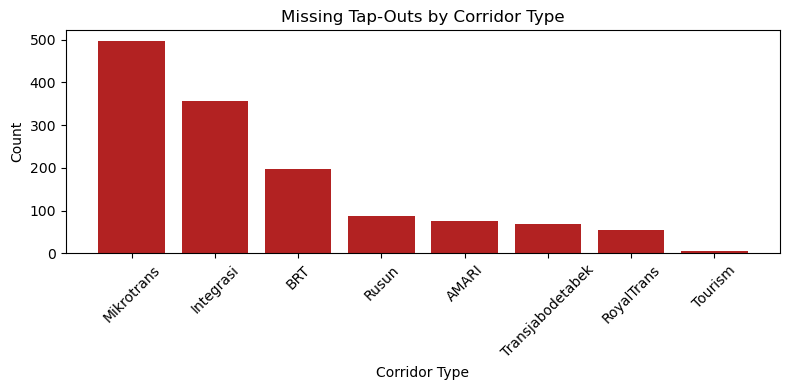

Tap-Out Missing by Corridor Type:
    corridorType  missing_count
      Mikrotrans            497
       Integrasi            356
             BRT            198
           Rusun             88
           AMARI             76
Transjabodetabek             69
      RoyalTrans             54
         Tourism              5


In [292]:
type_missing = df_no_tapout['corridorType'].value_counts().reset_index()
type_missing.columns = ['corridorType', 'missing_count']

# Plot
plt.figure(figsize=(8, 4))
plt.bar(type_missing['corridorType'], type_missing['missing_count'], color='firebrick')
plt.title('Missing Tap-Outs by Corridor Type')
plt.xlabel('Corridor Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Tap-Out Missing by Corridor Type:")
print(type_missing.to_string(index=False))


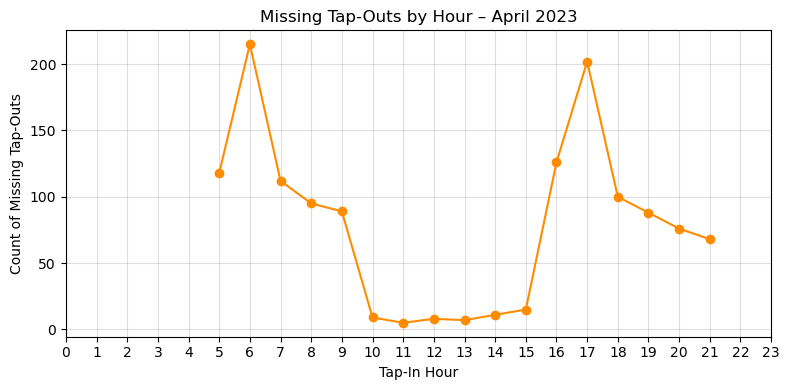

In [293]:
# Group by hour of tap-in
missing_by_hour = df_no_tapout.groupby('tapInHour')['payCardID'] \
                              .count().reset_index(name='missing_tapouts')

# Plot
plt.figure(figsize=(8, 4))
plt.plot(missing_by_hour['tapInHour'], missing_by_hour['missing_tapouts'], marker='o', color='darkorange')
plt.title('Missing Tap-Outs by Hour – April 2023')
plt.xlabel('Tap-In Hour')
plt.ylabel('Count of Missing Tap-Outs')
plt.xticks(range(0, 24))
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


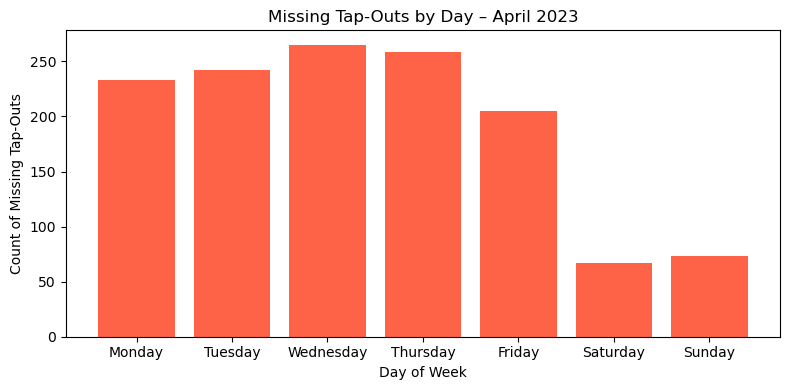

In [294]:
# Make sure we have weekday name
df_no_tapout['tapInDayName'] = pd.to_datetime(df_no_tapout['tapInDate'], errors='coerce').dt.day_name()

missing_by_day = df_no_tapout['tapInDayName'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()
missing_by_day.columns = ['Day', 'Missing Tap-Outs']

# Plot
plt.figure(figsize=(8, 4))
plt.bar(missing_by_day['Day'], missing_by_day['Missing Tap-Outs'], color='tomato')
plt.title('Missing Tap-Outs by Day – April 2023')
plt.xlabel('Day of Week')
plt.ylabel('Count of Missing Tap-Outs')
plt.tight_layout()
plt.show()


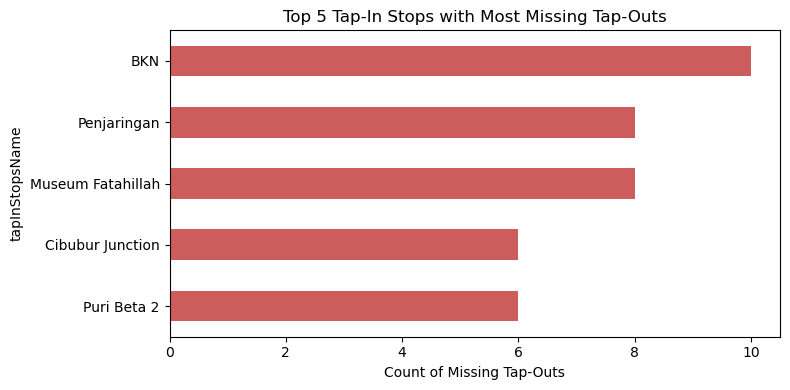

Tap-In Stops with Most Missing Tap-Outs:
tapInStopsName
BKN                  10
Penjaringan          8 
Museum Fatahillah    8 
Cibubur Junction     6 
Puri Beta 2          6 
Name: count, dtype: int64


In [295]:
top_start_stops = df_no_tapout['tapInStopsName'].value_counts().head()

plt.figure(figsize=(8, 4))
top_start_stops.plot(kind='barh', color='indianred')
plt.gca().invert_yaxis()
plt.title('Top 5 Tap-In Stops with Most Missing Tap-Outs')
plt.xlabel('Count of Missing Tap-Outs')
plt.tight_layout()
plt.show()

print("Tap-In Stops with Most Missing Tap-Outs:")
print(top_start_stops)


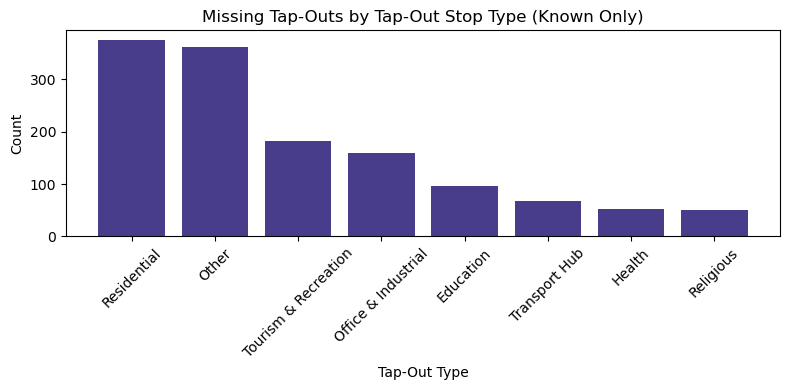

Tap-Out Types in Missing Tap-Out Records:
           tapInType  count
         Residential    375
               Other    361
Tourism & Recreation    182
 Office & Industrial    159
           Education     97
       Transport Hub     67
              Health     52
           Religious     51


In [296]:
# Count types (ignore NaNs)
tapIn_type_missing = df_no_tapout['tapInType'].value_counts().reset_index()
tapIn_type_missing.columns = ['tapInType', 'count']

# Plot
plt.figure(figsize=(8, 4))
plt.bar(tapIn_type_missing['tapInType'], tapIn_type_missing['count'], color='darkslateblue')
plt.title('Missing Tap-Outs by Tap-Out Stop Type (Known Only)')
plt.xlabel('Tap-Out Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Table view
print("Tap-Out Types in Missing Tap-Out Records:")
print(tapIn_type_missing.to_string(index=False))


Missing tap-outs align with rush hours and busy corridors, likely due to high passenger volumes. This suggests operational or technical challenges during peak usage times. Further investigation is needed.

## Age Analysis

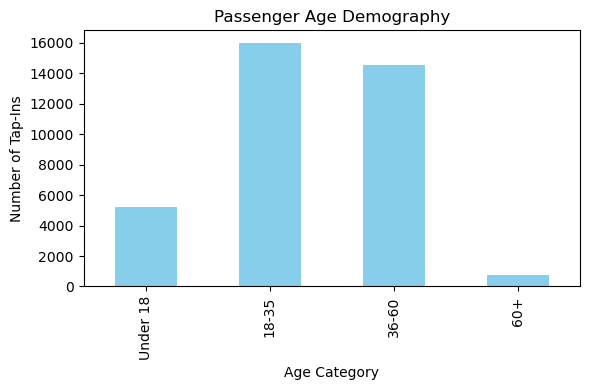

Overall Age Distribution:
ageCat
Under 18    5222 
18-35       16011
36-60       14523
60+         734  


In [297]:
# birth year is in payCardBirthDate
dfc['birthYear'] = pd.to_numeric(dfc['payCardBirthDate'], errors='coerce')

# Calculate age as of 2023
dfc['age'] = 2023 - dfc['birthYear']

# Define age categories
def age_category(age):
    age = int(age)
    if age < 18:
        return 'Under 18'
    elif age <= 35:
        return '18-35'
    elif age <= 60:
        return '36-60'
    else:
        return '60+'

dfc['ageCat'] = dfc['age'].apply(age_category)

# Overall age demography
age_counts = dfc['ageCat'].value_counts().reindex(
    ['Under 18','18-35','36-60','60+'], fill_value=0
)

plt.figure(figsize=(6,4))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Passenger Age Demography')
plt.xlabel('Age Category')
plt.ylabel('Number of Tap-Ins')
plt.tight_layout()
plt.show()

print("Overall Age Distribution:")
print(age_counts.to_string())

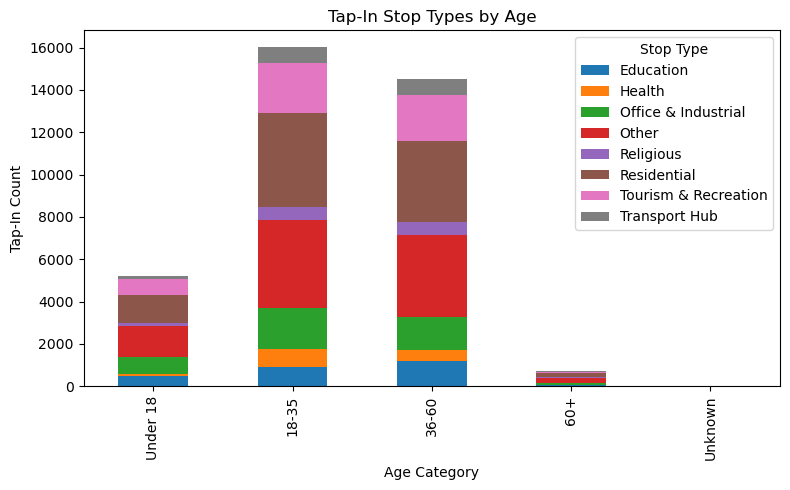

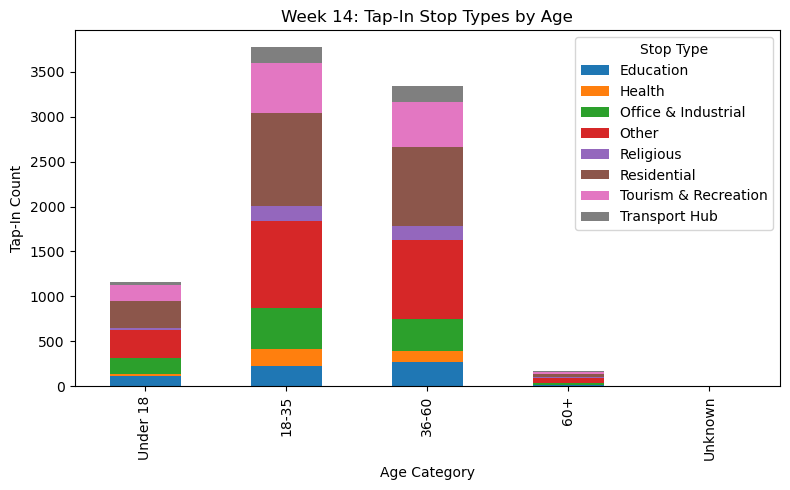

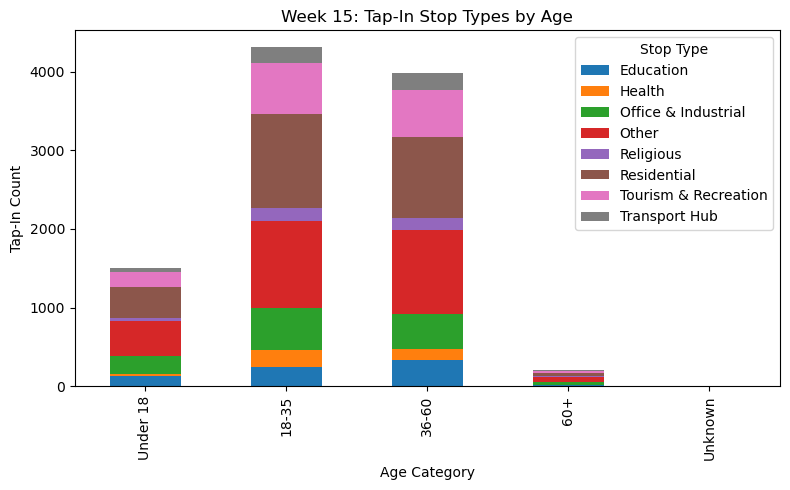

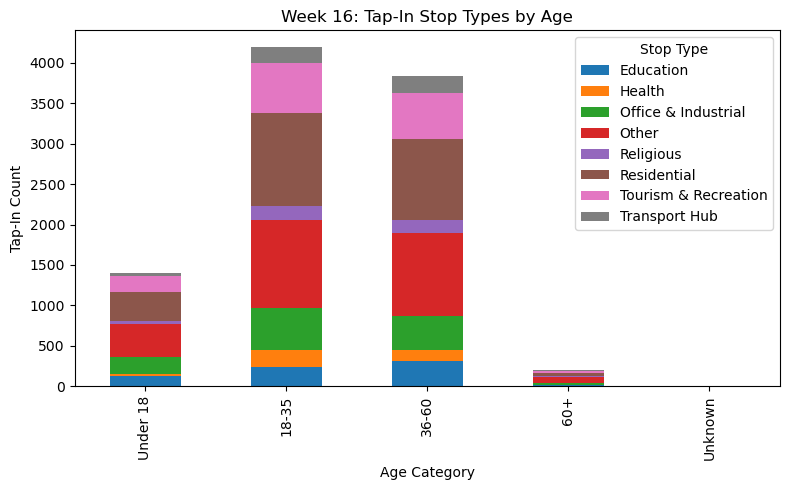

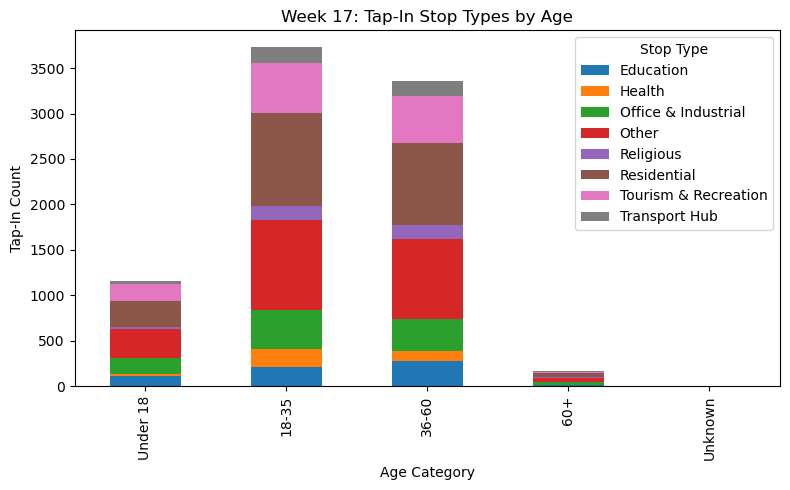

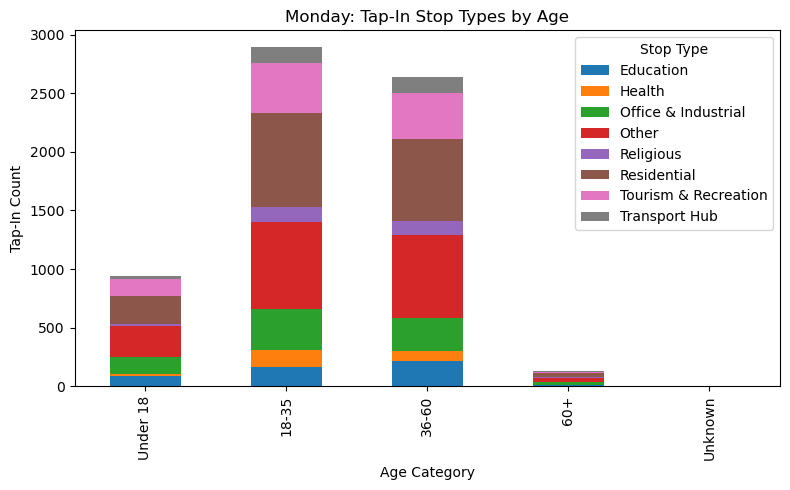

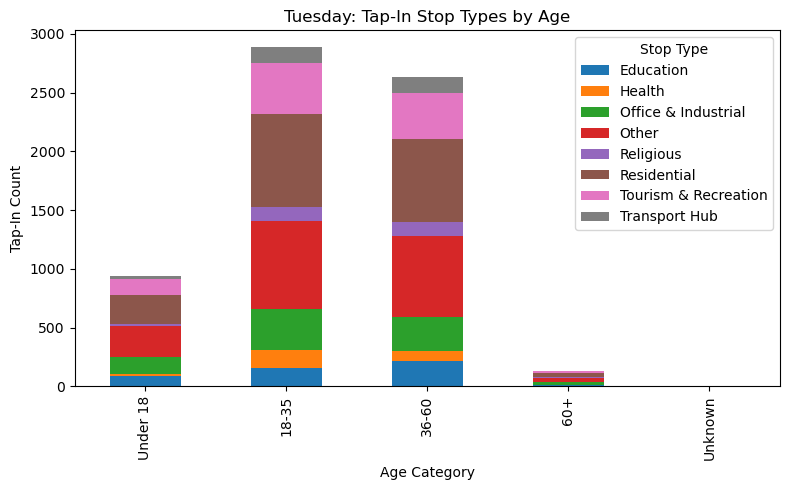

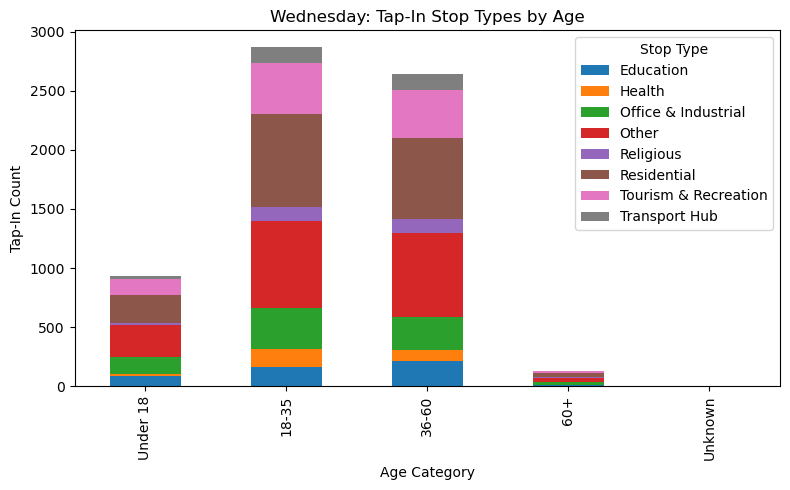

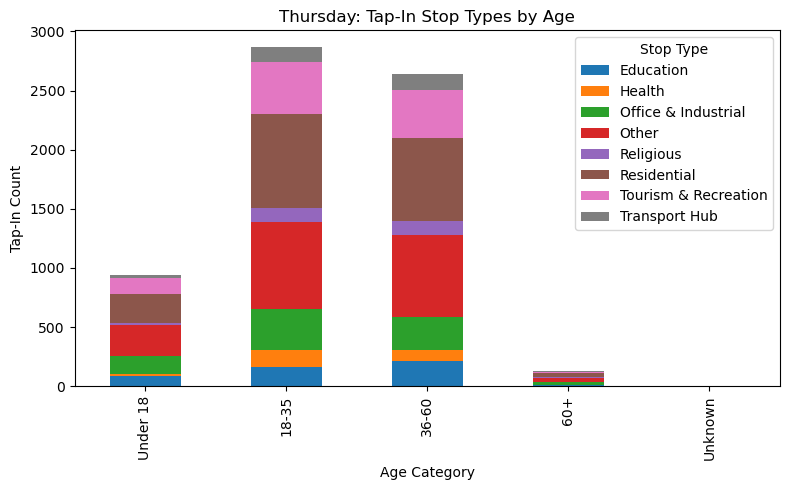

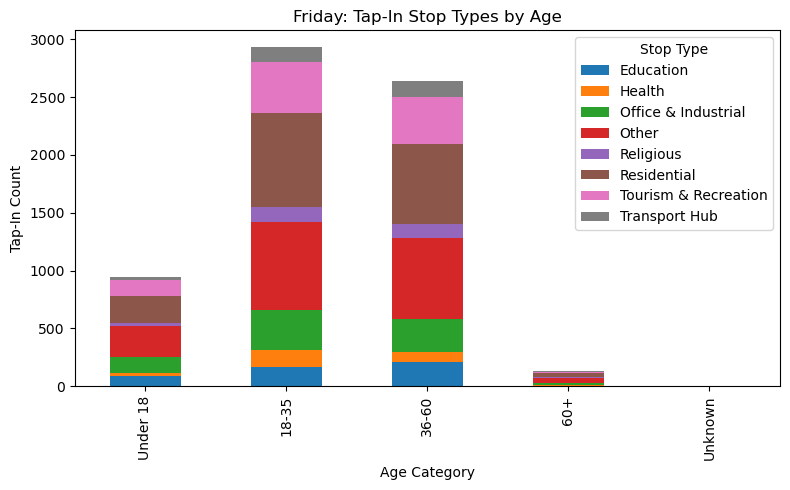

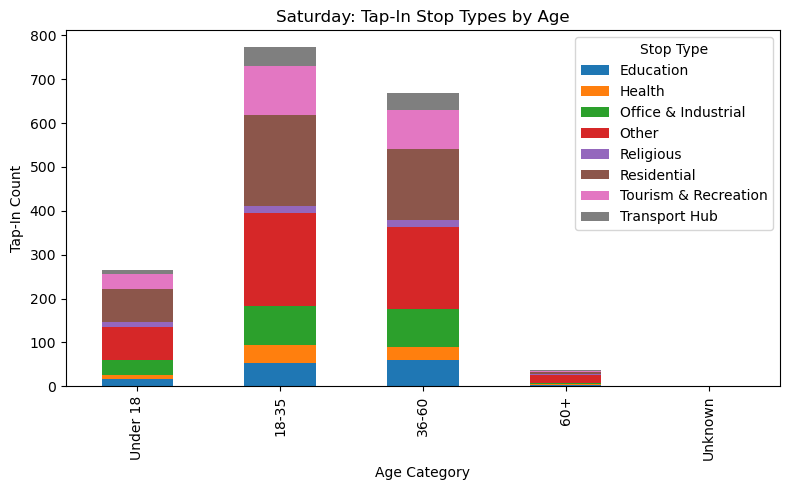

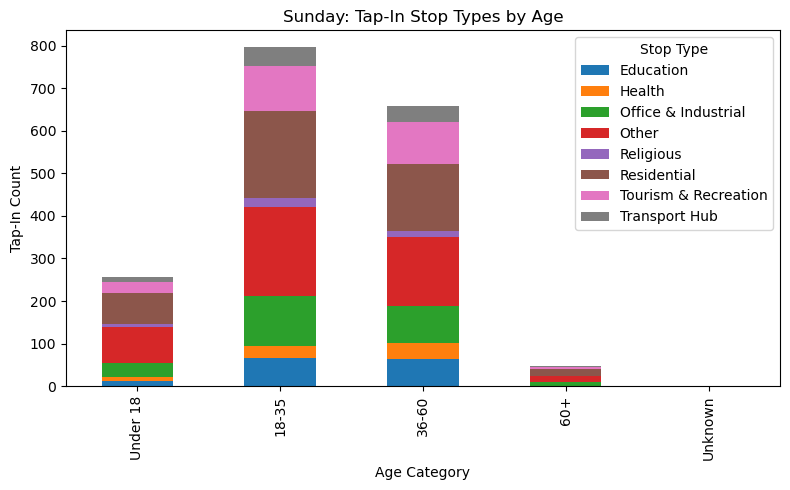

In [298]:
# Most frequent tap-in stop types by age

# Helper to plot counts of tapInType by ageCat
def plot_stop_type_by_age(df, title):
    pivot = df.pivot_table(index='ageCat', columns='tapInType',
                           values='payCardID', aggfunc='count',
                           fill_value=0)
    pivot = pivot.reindex(['Under 18','18-35','36-60','60+','Unknown'])
    pivot.plot(kind='bar', stacked=True, figsize=(8,5))
    plt.title(title)
    plt.xlabel('Age Category')
    plt.ylabel('Tap-In Count')
    plt.legend(title='Stop Type', bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()

# Overall April
plot_stop_type_by_age(dfc, 'Tap-In Stop Types by Age')

# Weekly
for w in sorted(dfc14['week'].unique()):
    dfw = dfc[dfc['week']==w]
    plot_stop_type_by_age(dfw, f'Week {w}: Tap-In Stop Types by Age')

# Daily
for day in day_order:
    dfd = dfc[dfc['tapInDayName']==day]
    if not dfd.empty:
        plot_stop_type_by_age(dfd, f'{day}: Tap-In Stop Types by Age')

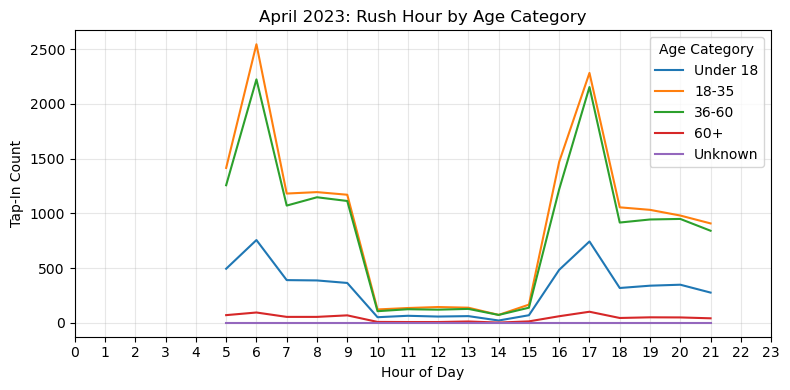

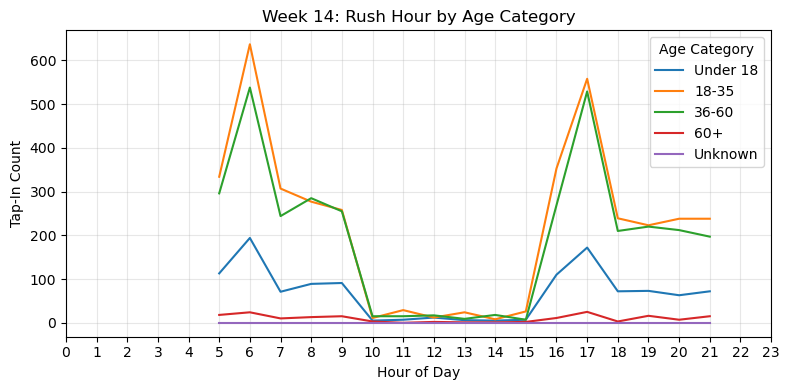

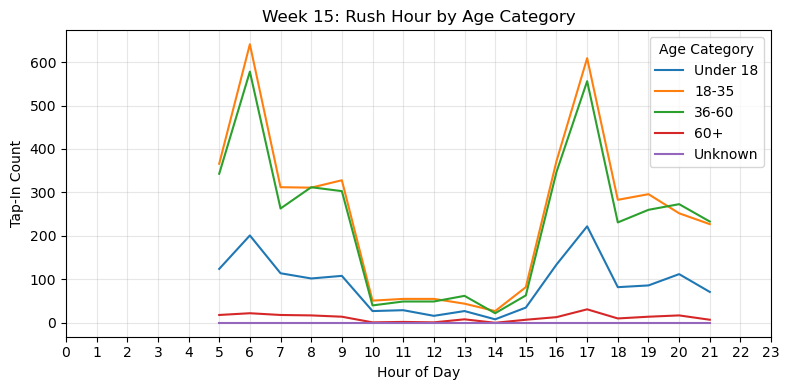

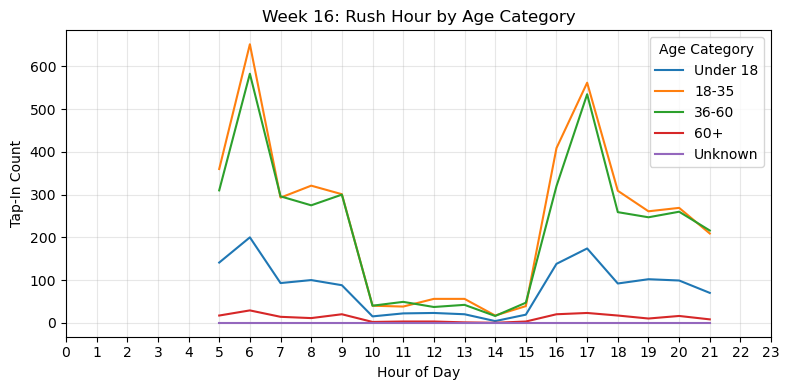

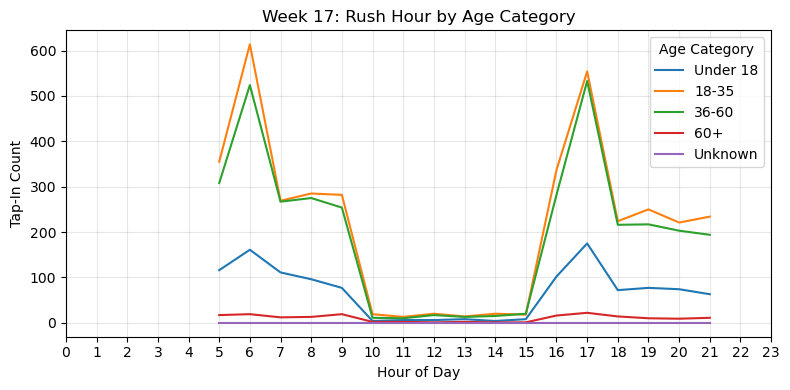

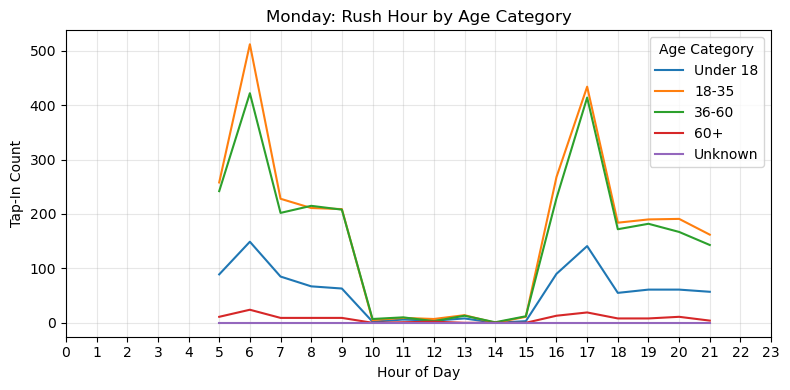

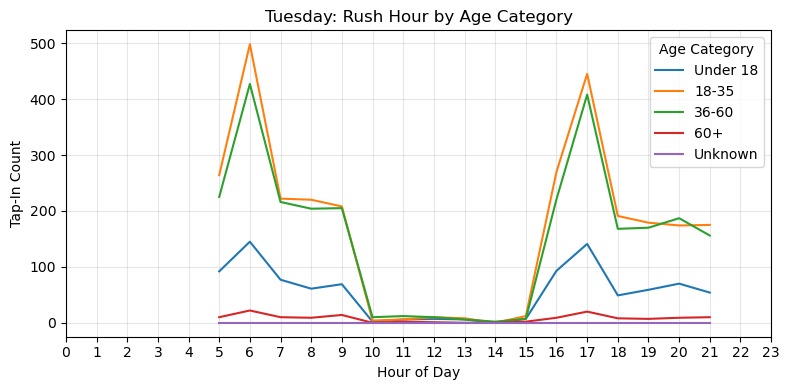

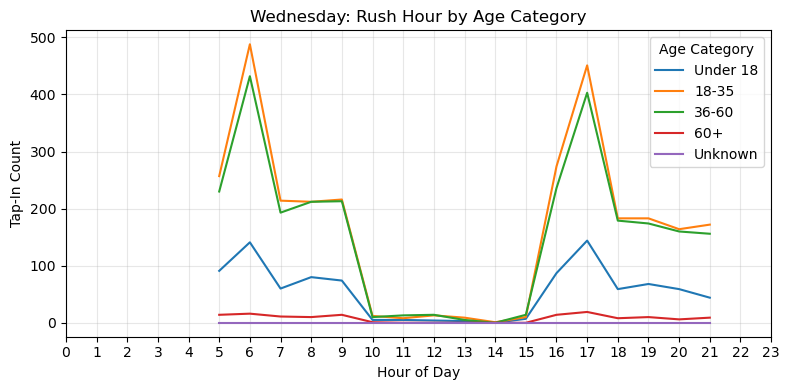

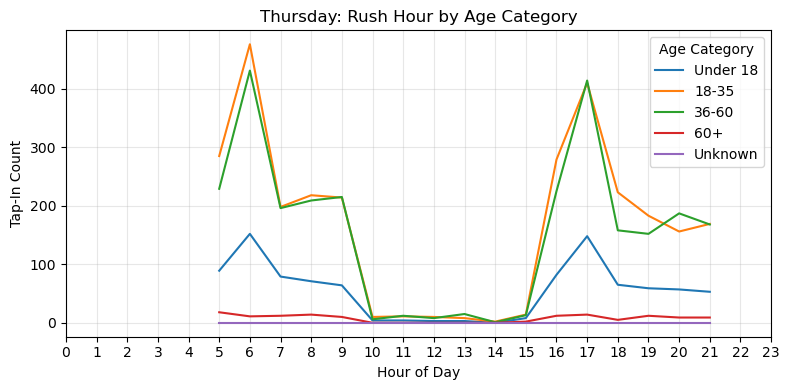

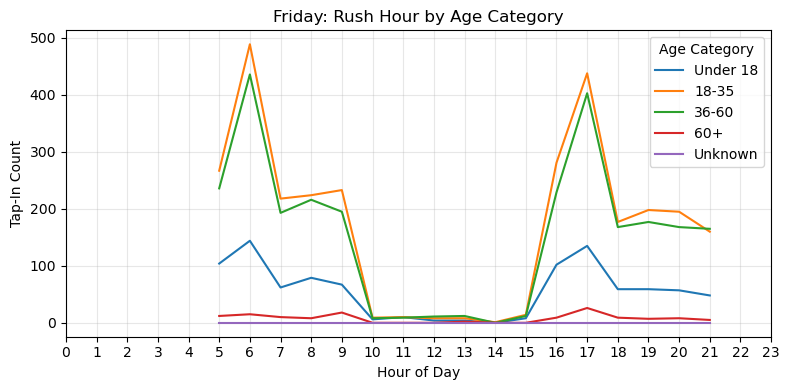

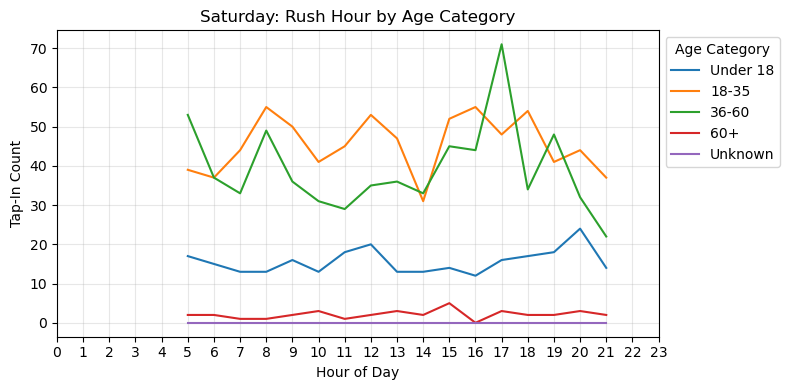

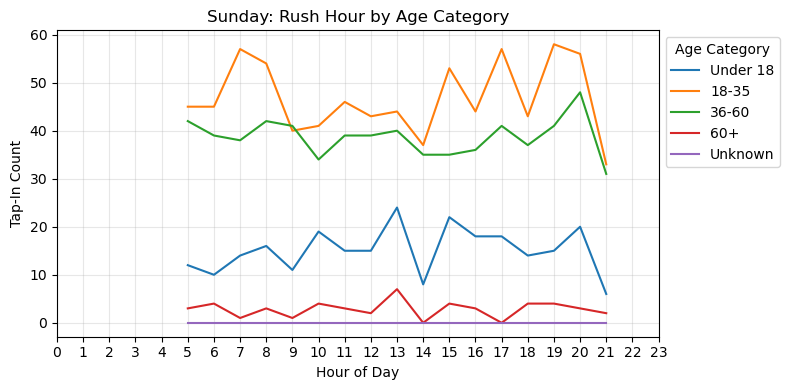

In [299]:
# Rush hour by age category

# Helper to plot hourly pattern by age
def plot_rush_by_age(df, title):
    pivot = df.pivot_table(index='tapInHour', columns='ageCat',
                           values='payCardID', aggfunc='count',
                           fill_value=0)
    pivot = pivot.reindex(columns=['Under 18','18-35','36-60','60+','Unknown'], fill_value=0)
    pivot.plot(figsize=(8,4))
    plt.title(title)
    plt.xlabel('Hour of Day')
    plt.ylabel('Tap-In Count')
    plt.xticks(range(0,24))
    plt.grid(alpha=0.3)
    plt.legend(title='Age Category', bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()

# Overall April
plot_rush_by_age(dfc, 'April 2023: Rush Hour by Age Category')

# Weekly
for w in sorted(dfc14['week'].unique()):
    dfw = dfc[dfc['week']==w]
    plot_rush_by_age(dfw, f'Week {w}: Rush Hour by Age Category')

# Daily
for day in day_order:
    dfd = dfc[dfc['tapInDayName']==day]
    if not dfd.empty:
        plot_rush_by_age(dfd, f'{day}: Rush Hour by Age Category')


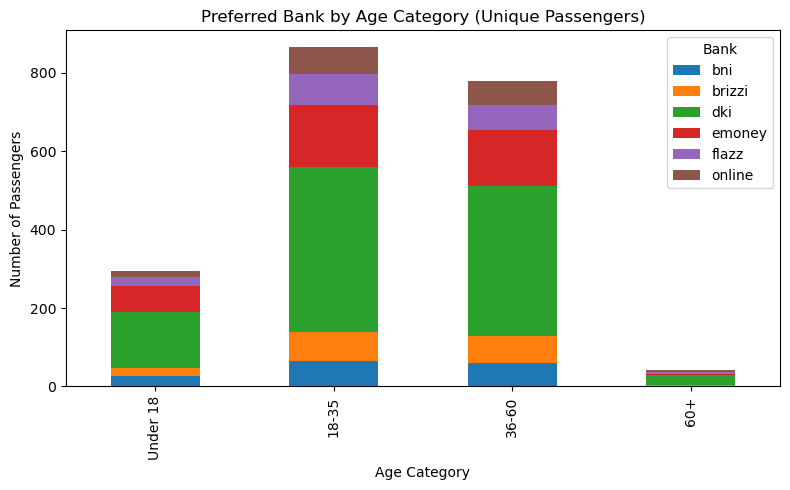

Preferred Banks by Age Category:
payCardBank  bni  brizzi  dki  emoney  flazz  online
ageCat                                              
Under 18      27      21  142      65     24      15
18-35         66      73  420     159     79      68
36-60         60      68  384     143     63      62
60+            2       2   24       3      5       5


In [300]:
#Age preferred Payment Type

# Count unique passengers per bank & ageCat
pref_bank = dfc.groupby(['ageCat','payCardBank'])['payCardID'] \
               .nunique().reset_index(name='unique_passengers')

# Pivot for plotting
pivot_bank = pref_bank.pivot(index='ageCat', columns='payCardBank',
                             values='unique_passengers').fillna(0)
pivot_bank = pivot_bank.reindex(['Under 18','18-35','36-60','60+'])

pivot_bank.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Preferred Bank by Age Category (Unique Passengers)')
plt.xlabel('Age Category')
plt.ylabel('Number of Passengers')
plt.legend(title='Bank', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

print("Preferred Banks by Age Category:")
print(pivot_bank.to_string())

## Gender Analysis
The following exploratory data analysis focuses on female ridership to help optimize the operation and placement of female-only buses.

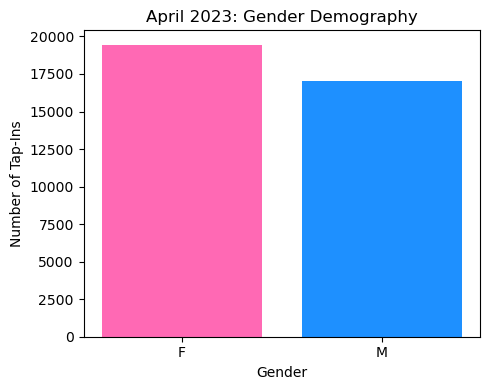

Gender Demography (April 2023):
Gender  Count
     F  19435
     M  17055


In [301]:
# Gender Demography Overall


gender_counts = dfc['payCardSex'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

plt.figure(figsize=(5,4))
plt.bar(gender_counts['Gender'], gender_counts['Count'], color=['#FF69B4','#1E90FF'])
plt.title('April 2023: Gender Demography')
plt.xlabel('Gender')
plt.ylabel('Number of Tap-Ins')
plt.tight_layout()
plt.show()

print("Gender Demography (April 2023):")
print(gender_counts.to_string(index=False))

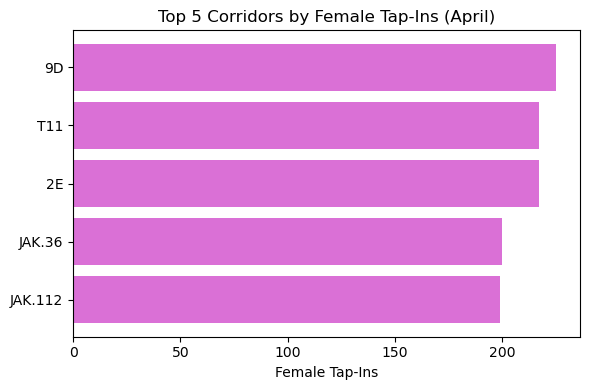

corridorID  Count
        9D    225
       T11    217
        2E    217
    JAK.36    200
   JAK.112    199

----------------------------------------



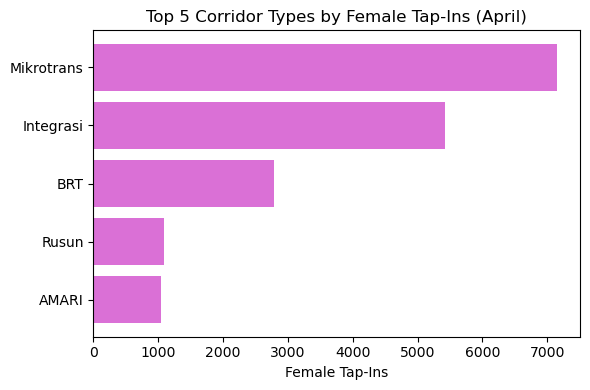

corridorType  Count
  Mikrotrans   7148
   Integrasi   5418
         BRT   2783
       Rusun   1088
       AMARI   1045

----------------------------------------



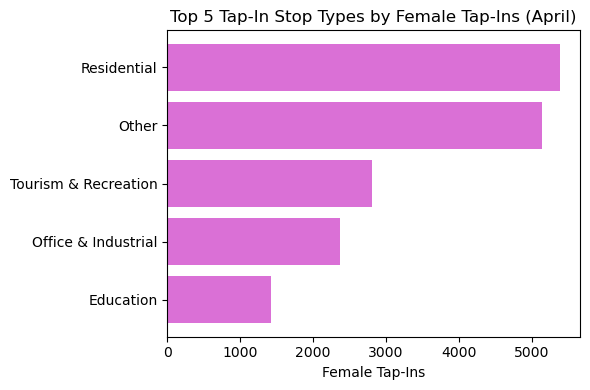

           tapInType  Count
         Residential   5395
               Other   5146
Tourism & Recreation   2811
 Office & Industrial   2370
           Education   1422

----------------------------------------



In [302]:
# Where Women Ride Most

# Filter to female riders only
df_f = dfc[dfc['payCardSex']=='F'].copy()


# Helper to plot top (N) for a given column
def plot_topN(df, col, title, top_n=5, color='orchid'):
    counts = df[col].value_counts().head(top_n).reset_index()
    counts.columns = [col, 'Count']
    plt.figure(figsize=(6,4))
    plt.barh(counts[col], counts['Count'], color=color)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel('Female Tap-Ins')
    plt.tight_layout()
    plt.show()
    print(counts.to_string(index=False))
    print("\n" + "-"*40 + "\n")

# Overall April: by corridorID, corridorType, tapInType
plot_topN(df_f, 'corridorID',   'Top 5 Corridors by Female Tap-Ins (April)')
plot_topN(df_f, 'corridorType', 'Top 5 Corridor Types by Female Tap-Ins (April)')
plot_topN(df_f, 'tapInType',    'Top 5 Tap-In Stop Types by Female Tap-Ins (April)')


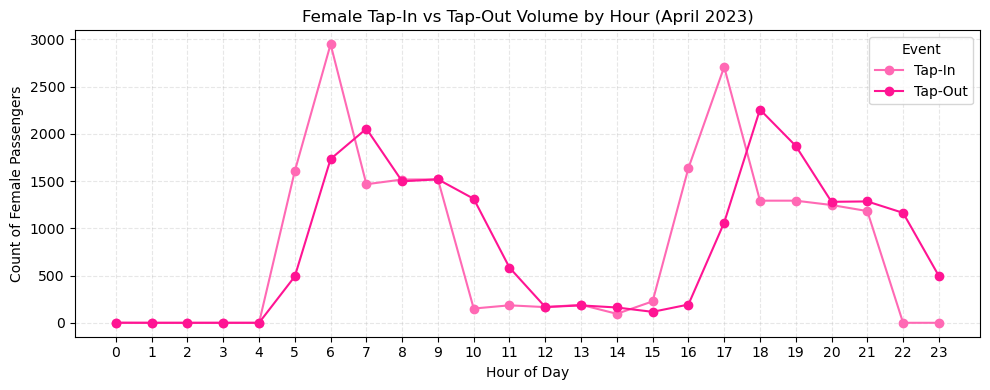

In [303]:
# Female Rush‑Hour Patterns

# hourly counts for tap‑in and tap‑out
in_counts  = df_f['tapInHour'].value_counts().sort_index()
out_counts = df_f['tapOutHour'].value_counts().sort_index()

# hour 0–23 appears (fill missing with 0)
hours = list(range(24))
in_counts  = in_counts.reindex(hours, fill_value=0)
out_counts = out_counts.reindex(hours, fill_value=0)

# Plot both on one figure
plt.figure(figsize=(10, 4))

# Tap‑in line plot
plt.plot(hours, in_counts, marker='o', label='Tap‑In', color='hotpink')

# Tap‑out line plot
plt.plot(hours, out_counts, marker='o', label='Tap‑Out', color='deeppink')

# Formatting
plt.title('Female Tap‑In vs Tap‑Out Volume by Hour (April 2023)')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Female Passengers')
plt.xticks(hours)               # show every hour
plt.grid(alpha=0.3, linestyle='--')
plt.legend(title='Event')       # show which line is which
plt.tight_layout()
plt.show()

# Normality Test

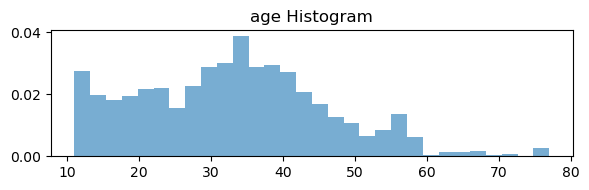

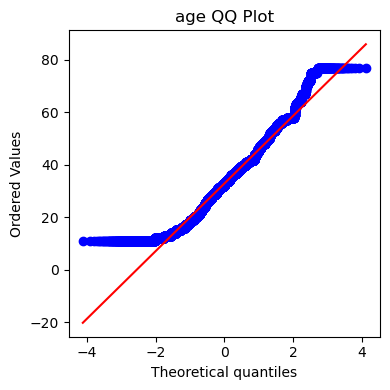

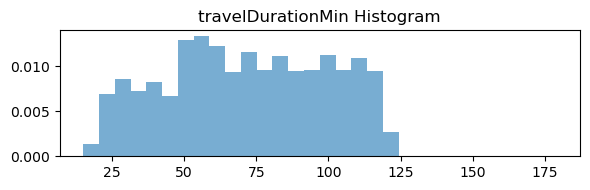

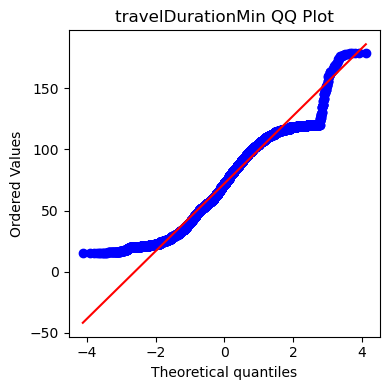

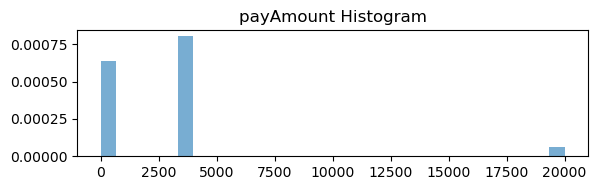

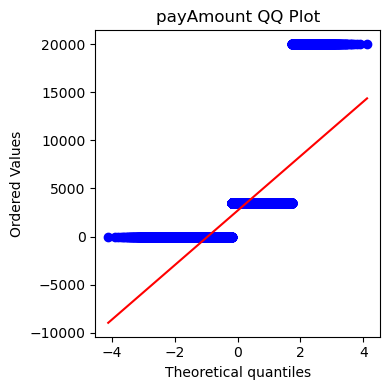

In [304]:
# List of numeric variables we want to check for normality
vars_to_test = ['age', 'travelDurationMin', 'payAmount']

# Loop through each variable in the list
for v in vars_to_test:
    
    # Remove any missing values (NaN) so we only plot real data
    data = dfc[v].dropna()
    
    # Histogram: 
    # Shows shape of the distribution
    plt.figure(figsize=(6, 2))
    plt.hist(data, bins=30, density=True, alpha=0.6)  
    # More bins = more detail
    
    plt.title(f'{v} Histogram')  
    # Add a title with variable name
    plt.tight_layout()
    plt.show()
    
    # QQ plot: 
    # Compare to a perfect normal distribution
    plt.figure(figsize=(4, 4))
    stats.probplot(data, dist="norm", plot=plt)  
    # qq plot using normal distribution
    
    plt.title(f'{v} QQ Plot')
    plt.tight_layout()
    plt.show()


In [305]:
# Loop through each variable to test for normality
for v in vars_to_test:
    
    # Drop variable's na
    data = dfc[v].dropna()
    
    # dataset is large, take 5000 random sample to avoid performance + sensitivity issues
    sample = data.sample(5000, random_state=1)  
    # random_state:  guarantees the same subset of data is selected every time you run the code.
    
    # Shapiro-Wilk normality test on the sample
    stat, p = stats.shapiro(sample)
    
    # Print the results in a clear format
    print(f"{v}: W={stat:.3f}, p={p:.3f} {'normal' if p > 0.05 else 'NOT normal'}")

age: W=0.978, p=0.000 NOT normal
travelDurationMin: W=0.969, p=0.000 NOT normal
payAmount: W=0.506, p=0.000 NOT normal


---------------------------

# Monetizing Mobility: Leveraging Strategic Partnership to Offset Free Fare Costs in Public Transit
## 1. Who and Where
### TLDR:
1. Gender Analysis
- Females are generally more predominant than males
- Area types
    - "unisex" and male focused markets can be advertised on Health, Office, and Religious
    - Partners with female focused market have more leaway on choosing stops to advertise
- Corridor Types
    - Female: Integrasi, Mikrotrans, Royaltrans, Rusun, Tourism (74%)
    - Male: AMARI, BRT, Transjabodetabek

2. Age Analysis
- General Ranking
    1. 18-35    
    2. 36-60    
    3. <18      
    4. 60+
- Area Types
    - <18: little market (most are on Education, Office, and Transportation Hub)
    - 18-35: Prevalent
    - 36-60: Prevalent but usually not as much as 18-35. Predominant on Transport Hubs
    - 60+: the least predominant of all passengers. Avoid Health and Tourism. Most are on Religious
- Corridor Types
    - <18: by total, most are on Mikrotrans and Integrasi, but by percentage most are on tourism and BRT
    - 18-35: BRT, Integrasi, Mikrotrans (slight margin 36-60), Royaltrans, Tourism, Transjabodetabek
    - 36-60: AMARI, Rusun
    - 60+: very low market, most on AMARI and Integrasi

In [306]:
# Count male and female passengers
gender_counts = dfc['payCardSex'].value_counts()
print("Gender Counts:")
print(gender_counts)

# commuters count per day by gender
daily_gender = dfc.groupby(['tapInDate', 'payCardSex'])['payCardID'].count().reset_index(name='commuters')

# grouping
female_counts = daily_gender[daily_gender['payCardSex'] == 'F']['commuters']
male_counts = daily_gender[daily_gender['payCardSex'] == 'M']['commuters']

# Mann–Whitney U Test
stat, p = stats.mannwhitneyu(female_counts, male_counts, alternative='greater')
print(f"Daily Commuters by Gender: U = {stat:.2f}, p = {p:.4f}")

# Interpretation
if p < 0.05:
    print("Females commute more daily than males.")
else:
    print("Gender's daily distributions are not significantly different.")

Gender Counts:
payCardSex
F    19435
M    17055
Name: count, dtype: int64
Daily Commuters by Gender: U = 592.50, p = 0.0179
Females commute more daily than males.


Females are generally more predominant

In [307]:
# commuters count per day by ageCat
count_age = dfc.groupby(['tapInDate', 'ageCat'])['payCardID'].count().reset_index(name='commuters')

# list of commuter counts per age group
age_groups = [count_age[count_age['ageCat'] == age]['commuters'] for age in dfc['ageCat'].unique()]

# Kruskal–Wallis H test
stat, p = stats.kruskal(*age_groups)
print(f"Daily Commuters by Age Category: H = {stat:.2f}, p = {p:.4f}")

# Interpretation
if p < 0.05:
    print("Significant difference in daily commuter counts across age groups")
else:
    print("No significant difference.")



Daily Commuters by Age Category: H = 66.20, p = 0.0000
Significant difference in daily commuter counts across age groups


In [308]:
age_counts = dfc['ageCat'].value_counts().sort_index()
print("Age category distribution:\n", age_counts)

chi2_a, p_a = stats.chisquare(age_counts)
print(f"Chi-square: χ²={chi2_a:.2f}, p={p_a:.4f}\n")

# Interpretation
if p < 0.05:
    print("Gender proportions are significantly different.")
else:
    print("Gender proportions are not significantly different.")

predominant_age = age_counts.idxmax()
print(f"\nThe predominant age is: {predominant_age}")

Age category distribution:
 ageCat
18-35       16011
36-60       14523
60+         734  
Under 18    5222 
Name: count, dtype: int64
Chi-square: χ²=17779.96, p=0.0000

Gender proportions are significantly different.

The predominant age is: 18-35


In [309]:
# 1a. Chi-Square: Tap-In Type vs Gender
table1 = pd.crosstab(dfc['tapInType'], dfc['payCardSex'])
chi1_stat, chi1_p, _, _ = stats.chi2_contingency(table1)
print(f"Chi² TapInType vs Gender: stat={chi1_stat:.2f}, p={chi1_p:.4f}")
# Interpretation
if p < 0.05:
    print("Significant association: Age distribution differs by Tap-In stop type.")
else:
    print("No significant association: Age is evenly distributed across Tap-In stop types.")

# 1b. Chi-Square: Tapout Type vs Gender
table2 = pd.crosstab(dfc['tapOutType'], dfc['payCardSex'])
chi1_stat, chi1_p, _, _ = stats.chi2_contingency(table1)
print(f"\nChi² TapOutType vs Gender: stat={chi1_stat:.2f}, p={chi1_p:.4f}")
# Interpretation
if p < 0.05:
    print("Significant association: Gender distribution differs by Tap-Out stop type.")
else:
    print("No significant association: Gender is evenly distributed across Tap-Out stop types.")

Chi² TapInType vs Gender: stat=85.39, p=0.0000
Significant association: Age distribution differs by Tap-In stop type.

Chi² TapOutType vs Gender: stat=85.39, p=0.0000
Significant association: Gender distribution differs by Tap-Out stop type.


Significant difference in gender based on their tap-in and tap-out, this can be used for products and services specifically targeting gender

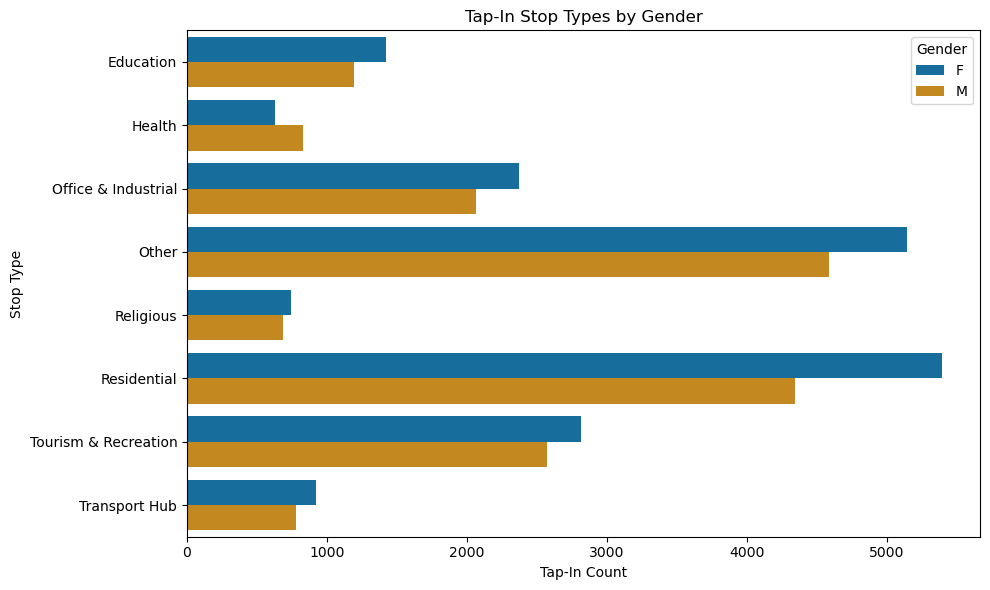

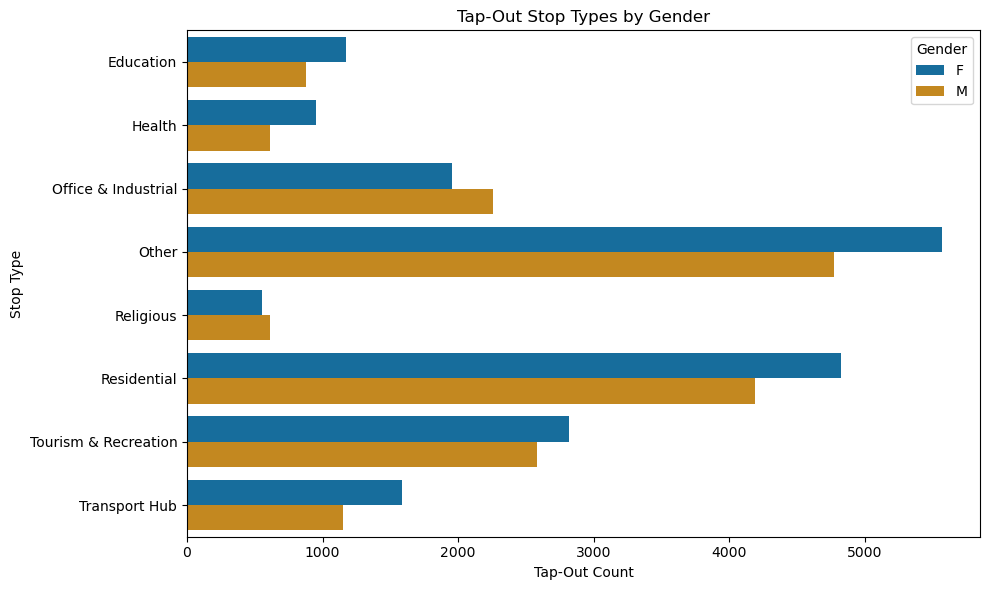

In [310]:
# Gender distribution per tapin stop type
gender_tapin_type = dfc.groupby(['tapInType', 'payCardSex'])['payCardID'].count().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_tapin_type, x='count', y='tapInType', hue='payCardSex', palette='colorblind')
plt.title('Tap-In Stop Types by Gender')
plt.xlabel('Tap-In Count')
plt.ylabel('Stop Type')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Gender distribution per tapout stop type
gender_tapout_type = dfc.groupby(['tapOutType', 'payCardSex'])['payCardID'].count().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_tapout_type, x='count', y='tapOutType', hue='payCardSex', palette='colorblind')
plt.title('Tap-Out Stop Types by Gender')
plt.xlabel('Tap-Out Count')
plt.ylabel('Stop Type')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [311]:
# Group and pivot
pivot_genderIn = gender_tapin_type.pivot(index='tapInType', columns='payCardSex', values='count').fillna(0)
pivot_genderOut = gender_tapout_type.pivot(index='tapOutType', columns='payCardSex', values='count').fillna(0)

# Add total and percentages
pivot_genderIn['Total'] = pivot_genderIn.sum(axis=1)
pivot_genderIn['Pct_Female'] = (pivot_genderIn['F'] / pivot_genderIn['Total']) * 100
pivot_genderIn['Pct_Male'] = (pivot_genderIn['M'] / pivot_genderIn['Total']) * 100

pivot_genderOut['Total'] = pivot_genderOut.sum(axis=1)
pivot_genderOut['Pct_Female'] = (pivot_genderOut['F'] / pivot_genderOut['Total']) * 100
pivot_genderOut['Pct_Male'] = (pivot_genderOut['M'] / pivot_genderOut['Total']) * 100

# Round for readability
genderIn_table = pivot_genderIn[['F', 'M', 'Total', 'Pct_Female', 'Pct_Male']].round(2)
genderOut_table = pivot_genderOut[['F', 'M', 'Total', 'Pct_Female', 'Pct_Male']].round(2)

# Display tables
print("Tap-In Stop Types by Gender (Counts and Percentages):")
display(genderIn_table)

print("Tap-Out Stop Types by Gender (Counts and Percentages):")
display(genderOut_table)

Tap-In Stop Types by Gender (Counts and Percentages):


payCardSex               F     M  Total  Pct_Female  Pct_Male
tapInType                                                    
Education             1422  1192  2614   54.40       45.60   
Health                628   832   1460   43.01       56.99   
Office & Industrial   2370  2062  4432   53.47       46.53   
Other                 5146  4589  9735   52.86       47.14   
Religious             745   689   1434   51.95       48.05   
Residential           5395  4342  9737   55.41       44.59   
Tourism & Recreation  2811  2570  5381   52.24       47.76   
Transport Hub         918   779   1697   54.10       45.90

Tap-Out Stop Types by Gender (Counts and Percentages):


payCardSex               F     M  Total  Pct_Female  Pct_Male
tapOutType                                                   
Education             1171  880   2051   57.09       42.91   
Health                954   609   1563   61.04       38.96   
Office & Industrial   1953  2260  4213   46.36       53.64   
Other                 5571  4772  10343  53.86       46.14   
Religious             555   610   1165   47.64       52.36   
Residential           4826  4188  9014   53.54       46.46   
Tourism & Recreation  2818  2583  5401   52.18       47.82   
Transport Hub         1587  1153  2740   57.92       42.08

1. Tap-Ins:
- Predominantly Female: Education, Office, Other, Tourism, Transport hub
- Predominantly Male: Health

2. Tap-Outs:
- Female: Education, Health, Other, Residential, Tourism, Transport
- Male: Office, Religious

3. Summary
- Strategic partners with products and services that are "unisex" and male focused markets can be advertised on Health, Office, and Religious stop types
- Partners with female focused market have more leaway on choosing stops to advertise

In [312]:
# Chi-Square: Tap-In Type vs Age Group
tableIn = pd.crosstab(dfc['tapInType'], dfc['ageCat'])
chi2_stat, chi2_p, _, _ = stats.chi2_contingency(table2)
print(f"Chi² TapInType vs AgeGroup: stat={chi2_stat:.2f}, p={chi2_p:.4f}")
# Interpretation
if p < 0.05:
    print("Significant association: Age distribution differs by Tap-In stop type.")
else:
    print("No significant association: Age is evenly distributed across Tap-In stop types.")

# Tap-Out Type vs Age Group
tableOut = pd.crosstab(dfc['tapOutType'], dfc['ageCat'])
chi2_stat, chi2_p, _, _ = stats.chi2_contingency(table2)
print(f"\nChi² TapOutType vs AgeGroup: stat={chi2_stat:.2f}, p={chi2_p:.4f}")
# Interpretation
if p < 0.05:
    print("Significant association: Age distribution differs by Tap-Out stop type.")
else:
    print("No significant association: Age is evenly distributed across Tap-Out stop types.")

Chi² TapInType vs AgeGroup: stat=173.76, p=0.0000
Significant association: Age distribution differs by Tap-In stop type.

Chi² TapOutType vs AgeGroup: stat=173.76, p=0.0000
Significant association: Age distribution differs by Tap-Out stop type.


Significant difference in Age groups based on their stops, this can be used for products and services specifically targeting Age groups

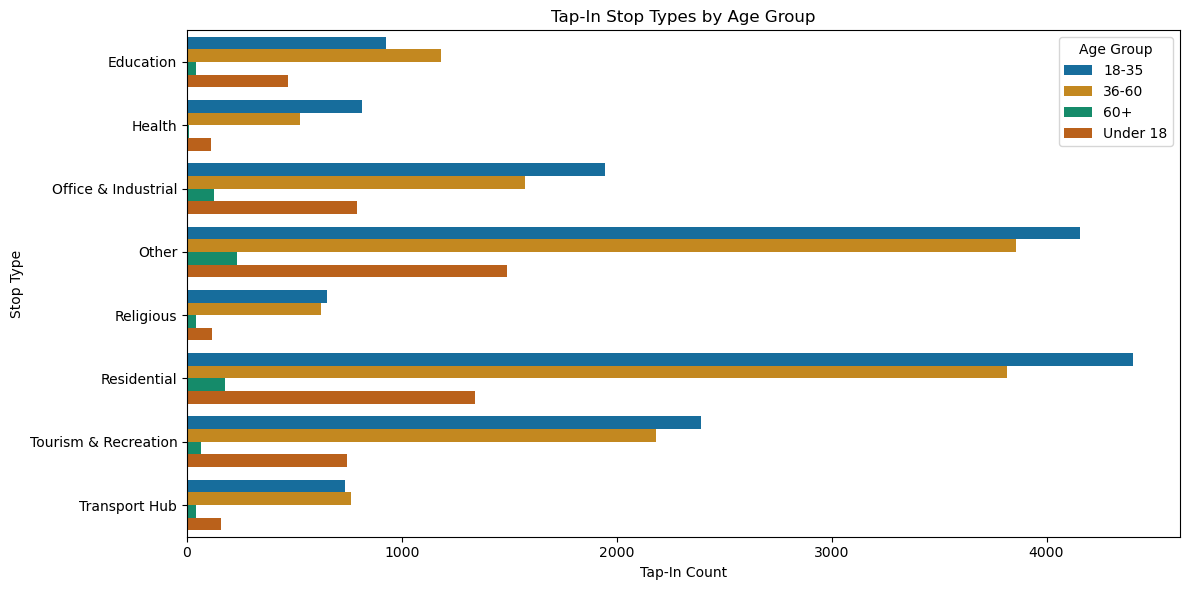

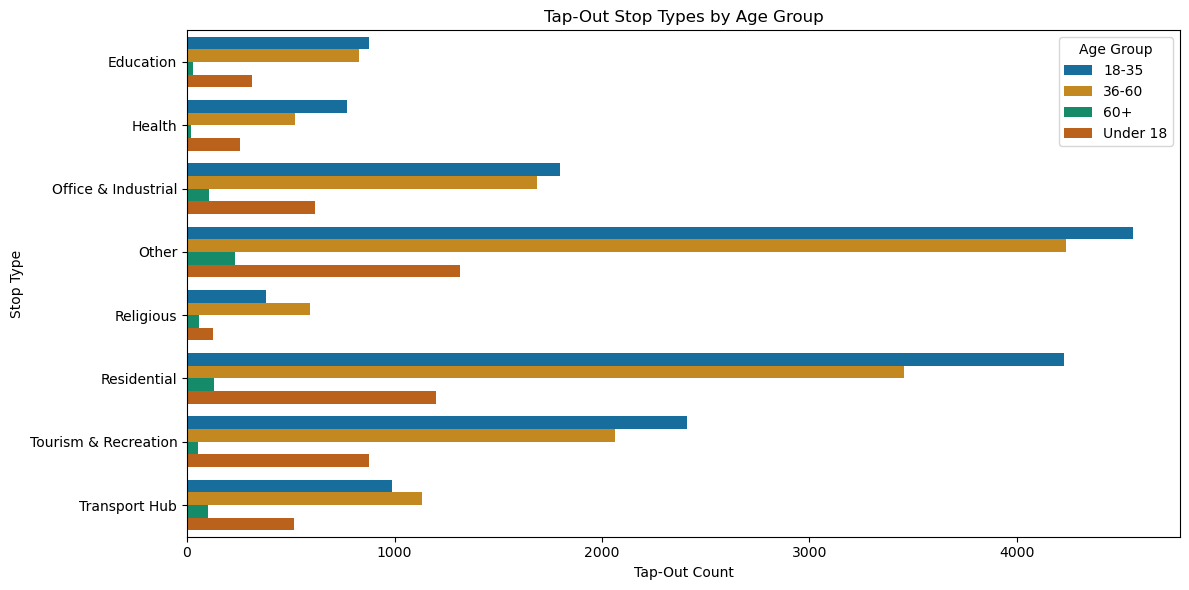

In [313]:
agegroup_tapin_type = dfc.groupby(['tapInType', 'ageCat'])['payCardID'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=agegroup_tapin_type, x='count', y='tapInType', hue='ageCat', palette='colorblind')
plt.title('Tap-In Stop Types by Age Group')
plt.xlabel('Tap-In Count')
plt.ylabel('Stop Type')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

agegroup_tapout_type = dfc.groupby(['tapOutType', 'ageCat'])['payCardID'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=agegroup_tapout_type, x='count', y='tapOutType', hue='ageCat', palette='colorblind')
plt.title('Tap-Out Stop Types by Age Group')
plt.xlabel('Tap-Out Count')
plt.ylabel('Stop Type')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [314]:
# Group and pivot
pivot_agein = agegroup_tapin_type.pivot(index='tapInType', columns='ageCat', values='count').fillna(0)
pivot_ageout = agegroup_tapout_type.pivot(index='tapOutType', columns='ageCat', values='count').fillna(0)

# Add total and % per age group
pivot_agein['Total'] = pivot_agein.sum(axis=1)
for col in pivot_agein.columns[:-1]:
    pivot_agein[f'Pct_{col}'] = (pivot_agein[col] / pivot_agein['Total']) * 100

# Add total and % per age group
pivot_ageout['Total'] = pivot_ageout.sum(axis=1)
for col in pivot_ageout.columns[:-1]:
    pivot_ageout[f'Pct_{col}'] = (pivot_ageout[col] / pivot_ageout['Total']) * 100

# Round for readability
age_tablein = pivot_agein.round(2)
age_tableout = pivot_ageout.round(2)
print("\nTap-In Stop Types by Age Group (Counts and Percentages):")
display(age_tablein)
print("\nTap-Out Stop Types by Age Group (Counts and Percentages):")
display(age_tableout)


Tap-In Stop Types by Age Group (Counts and Percentages):


ageCat                18-35  36-60  60+  Under 18  Total  Pct_18-35  \
tapInType                                                             
Education             924    1182   40   468       2614   35.35       
Health                813    527    8    112       1460   55.68       
Office & Industrial   1943   1572   127  790       4432   43.84       
Other                 4156   3857   232  1490      9735   42.69       
Religious             650    624    44   116       1434   45.33       
Residential           4401   3817   177  1342      9737   45.20       
Tourism & Recreation  2391   2181   64   745       5381   44.43       
Transport Hub         733    763    42   159       1697   43.19       

ageCat                Pct_36-60  Pct_60+  Pct_Under 18  
tapInType                                               
Education             45.22      1.53     17.90         
Health                36.10      0.55     7.67          
Office & Industrial   35.47      2.87     17.82         
Other                 39.62      2.38     15.31         
Religious             43.51      3.07     8.09          
Residential           39.20      1.82     13.78         
Tourism & Recreation  40.53      1.19     13.85         
Transport Hub         44.96      2.47     9.37


Tap-Out Stop Types by Age Group (Counts and Percentages):


ageCat                18-35  36-60  60+  Under 18  Total  Pct_18-35  \
tapOutType                                                            
Education             876    831    31   313       2051   42.71       
Health                772    518    20   253       1563   49.39       
Office & Industrial   1797   1689   108  619       4213   42.65       
Other                 4558   4237   231  1317      10343  44.07       
Religious             383    595    60   127       1165   32.88       
Residential           4227   3457   129  1201      9014   46.89       
Tourism & Recreation  2410   2062   52   877       5401   44.62       
Transport Hub         988    1134   103  515       2740   36.06       

ageCat                Pct_36-60  Pct_60+  Pct_Under 18  
tapOutType                                              
Education             40.52      1.51     15.26         
Health                33.14      1.28     16.19         
Office & Industrial   40.09      2.56     14.69         
Other                 40.96      2.23     12.73         
Religious             51.07      5.15     10.90         
Residential           38.35      1.43     13.32         
Tourism & Recreation  38.18      0.96     16.24         
Transport Hub         41.39      3.76     18.80

1. Tap-In:
- <18: free to choose but little market, most are on Education and Office 
- 18-35: Health, Office, other, religious, residential, tourism
- 36-60: Education, Transport Hub
- 60+: avoid Health, most are on Religious but little market

2. Tap-Out:
- <18: free to choose but little market, most on transport hub
- 18-35: Education, Health, Office, Other, Residential, Tourism
- 36-60: Religious, Transport Hub
- 60+: avoid tourism, most are on Religious but little market

3. Summary:
- <18: little market, but most are on Education, Office, and Transportation Hub
- 18-35: Relatively prevalent everywhere
- 36-60: Also prevalent but usually not as much as 18-35. They are predominant on Transport Hubs
- 60+: the least predominant of all passengers. Avoid Health and Tourism. Most are on Religious

In [315]:
# Create a contingency table of gender vs. corridorType
table_cg  = pd.crosstab(dfc['corridorType'], dfc['payCardSex'])

# Chi-Square test: corridor type and gender
chi2, p, dof, expected = stats.chi2_contingency(table_cg)

# Print the result
print(f"Chi-Square Test Gender vs. Corridor Type: stat={chi2:.2f}, p-value = {p:.4f}")

# Interpretation
if p < 0.05:
    print("Significant association: Gender distribution differs by corridor type.")
else:
    print("No significant association: Gender is evenly distributed across corridor types.")

Chi-Square Test Gender vs. Corridor Type: stat=211.09, p-value = 0.0000
Significant association: Gender distribution differs by corridor type.


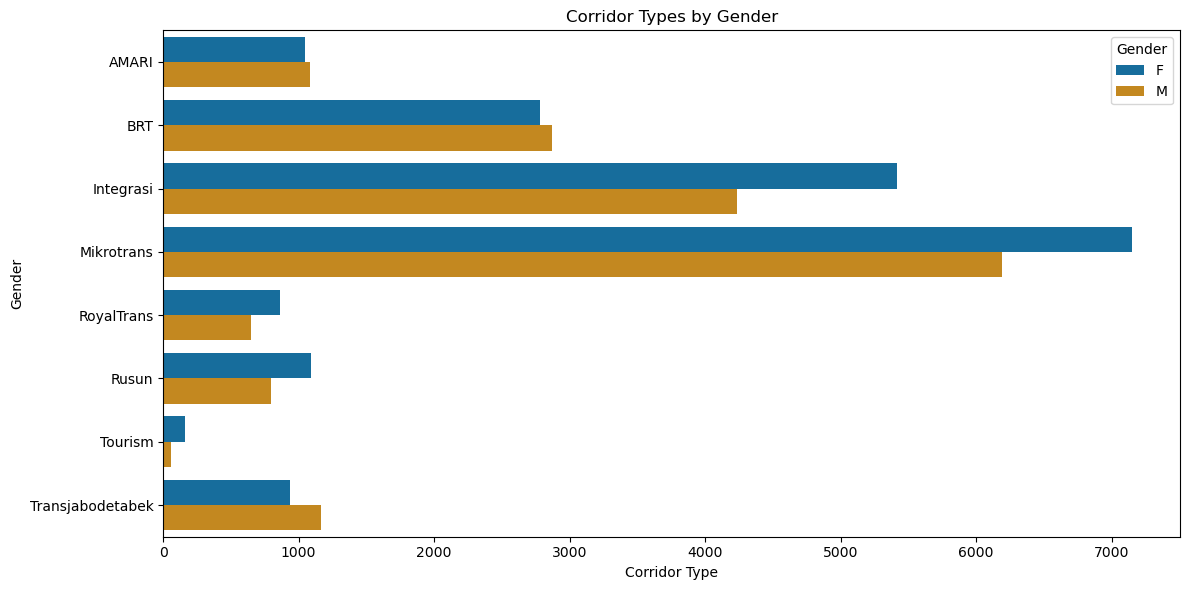

In [316]:
ctype_gender = dfc.groupby(['corridorType', 'payCardSex'])['payCardID'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(ctype_gender, x='count', y='corridorType', hue='payCardSex', palette='colorblind')
plt.title('Corridor Types by Gender')
plt.xlabel('Corridor Type')
plt.ylabel('Gender')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [317]:
# Group and pivot
pivot_cg = ctype_gender.pivot(index='corridorType', columns='payCardSex', values='count').fillna(0)

# Add total and % per age group
pivot_cg['Total'] = pivot_cg.sum(axis=1)

for col in pivot_cg.columns[:-1]:
    pivot_cg[f'Pct_{col}'] = (pivot_cg[col] / pivot_cg['Total']) * 100


# Calculate percentages for each gender group
for col in pivot_cg.columns[:-1]:  # Exclude the 'Total' column
    pivot_cg[f'Pct_{col}'] = (pivot_cg[col] / pivot_cg['Total']) * 100

# Round for readability
tablecg = pivot_cg.round(2)
tablecg = tablecg[['F', 'M', 'Total', 'Pct_F', 'Pct_M']]
print("\nCorridor Types by gender (Counts and Percentages):")
display(tablecg)


Corridor Types by gender (Counts and Percentages):


payCardSex           F     M  Total  Pct_F  Pct_M
corridorType                                     
AMARI             1045  1086  2131   49.04  50.96
BRT               2783  2873  5656   49.20  50.80
Integrasi         5418  4234  9652   56.13  43.87
Mikrotrans        7148  6195  13343  53.57  46.43
RoyalTrans        859   652   1511   56.85  43.15
Rusun             1088  793   1881   57.84  42.16
Tourism           161   57    218    73.85  26.15
Transjabodetabek  933   1165  2098   44.47  55.53

- Female: Integrasi, Mikrotrans, Royaltrans, Rusun, Tourism (74%)
- Male: AMARI, BRT, Transjabodetabek

In [318]:
# Create a contingency table of age vs. corridorType
table_ca  = pd.crosstab(dfc['corridorType'], dfc['ageCat'])

# Chi-Square test: corridor type and gender
chi2, p, dof, expected = stats.chi2_contingency(table_ca)

# Print the result
print(f"Chi-Square Test Age vs. Corridor Type: stat={chi2:.2f}, p-value = {p:.4f}")

# Interpretation
if p < 0.05:
    print("Significant association: Age distribution differs by corridor type.")
else:
    print("No significant association: Age is evenly distributed across corridor types.")

Chi-Square Test Age vs. Corridor Type: stat=824.05, p-value = 0.0000
Significant association: Age distribution differs by corridor type.


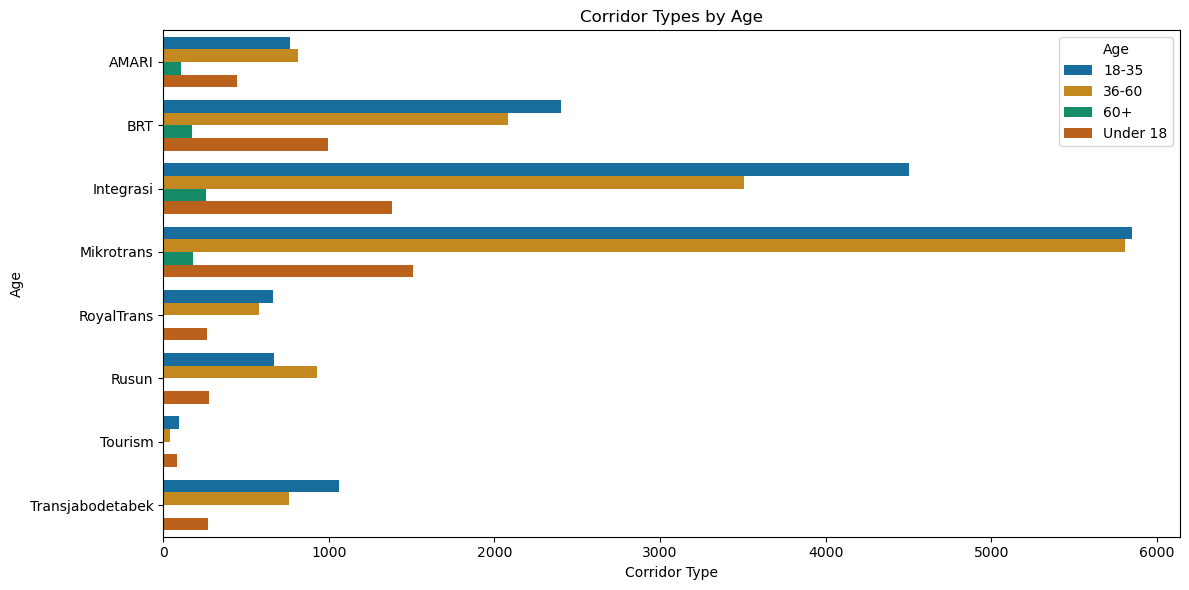

In [319]:
ctype_age = dfc.groupby(['corridorType', 'ageCat'])['payCardID'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(ctype_age, x='count', y='corridorType', hue='ageCat', palette='colorblind')
plt.title('Corridor Types by Age')
plt.xlabel('Corridor Type')
plt.ylabel('Age')
plt.legend(title='Age')
plt.tight_layout()
plt.show()

In [320]:
# Group and pivot
pivot_ca = ctype_age.pivot(index='corridorType', columns='ageCat', values='count').fillna(0)

# Add total and % per age group
pivot_ca['Total'] = pivot_ca.sum(axis=1)

# Calculate percentages for each gender group
for col in pivot_ca.columns[:-1]:  # Exclude the 'Total' column
    pivot_ca[f'Pct_{col}'] = (pivot_ca[col] / pivot_ca['Total']) * 100

# Round for readability
tableca = pivot_ca.round(2)
print("\nCorridor Types by Age (Counts and Percentages):")
display(tableca)


Corridor Types by Age (Counts and Percentages):


ageCat            18-35  36-60  60+  Under 18  Total  Pct_18-35  Pct_36-60  \
corridorType                                                                 
AMARI             764    813    108  446       2131   35.85      38.15       
BRT               2404   2083   175  994       5656   42.50      36.83       
Integrasi         4505   3508   258  1381      9652   46.67      36.34       
Mikrotrans        5846   5805   182  1510      13343  43.81      43.51       
RoyalTrans        666    581    2    262       1511   44.08      38.45       
Rusun             669    930    4    278       1881   35.57      49.44       
Tourism           94     42     1    81        218    43.12      19.27       
Transjabodetabek  1063   761    4    270       2098   50.67      36.27       

ageCat            Pct_60+  Pct_Under 18  
corridorType                             
AMARI             5.07     20.93         
BRT               3.09     17.57         
Integrasi         2.67     14.31         
Mikrotrans        1.36     11.32         
RoyalTrans        0.13     17.34         
Rusun             0.21     14.78         
Tourism           0.46     37.16         
Transjabodetabek  0.19     12.87

- <18: by total, most are on Mikrotrans and Integrasi, but by percentage most are on tourism and BRT
- 18-35: BRT, Integrasi, Mikrotrans (slight margin 36-60), Royaltrans, Tourism, Transjabodetabek
- 36-60: AMARI, Rusun
- 60+: very low market, most on AMARI and Integrasi

## 2. Who and When
TLDR: 
- There are significantly more passengers on weekdays rather than weekends. 
- Premium Plans
    - Prime Time: 05.00-10.00 & 16.00-21.00 Weekdays
    - Golden Hour: 6.00-7.00 and 17.00-18.00 Weekdays 
- Travel Duration
    - By percentage, males tend to leave and arrive earlier than their female counterparts
    - Females stay on the busses longer but no significant differnce for age groups
- No significant association/difference of normal week and holiday on age and gender

In [321]:
# Separate tap-in and tap-out hours by gender
males = dfc[dfc['payCardSex'] == 'M'][['tapInHour', 'tapOutHour']].dropna()
females = dfc[dfc['payCardSex'] == 'F'][['tapInHour', 'tapOutHour']].dropna()

# Run the test
stat, p = stats.mannwhitneyu(males['tapInHour'], females['tapInHour'], alternative='less')
print(f"Mann–Whitney (TapInHour by Gender): U={stat:.2f}, p={p:.4f}")
print("Males significantly taps in earlier" if p < 0.05 else "No significant difference.")

stat,p = stats.mannwhitneyu(males['tapOutHour'], females['tapOutHour'], alternative='less')
print(f"\nMann–Whitney (TapOutHour by Gender): U={stat:.2f}, p={p:.4f}")
print("Males significantly taps out earlier" if p < 0.05 else "No significant difference.")

Mann–Whitney (TapInHour by Gender): U=162255266.00, p=0.0002
Males significantly taps in earlier

Mann–Whitney (TapOutHour by Gender): U=162371945.50, p=0.0004
Males significantly taps out earlier


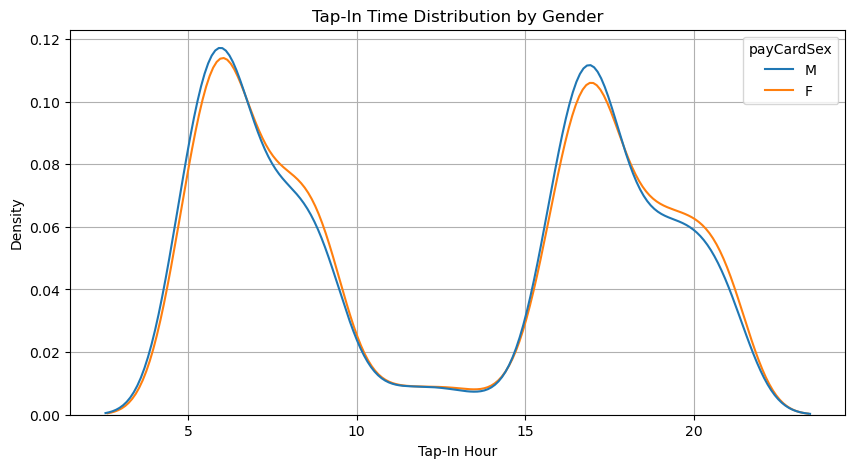

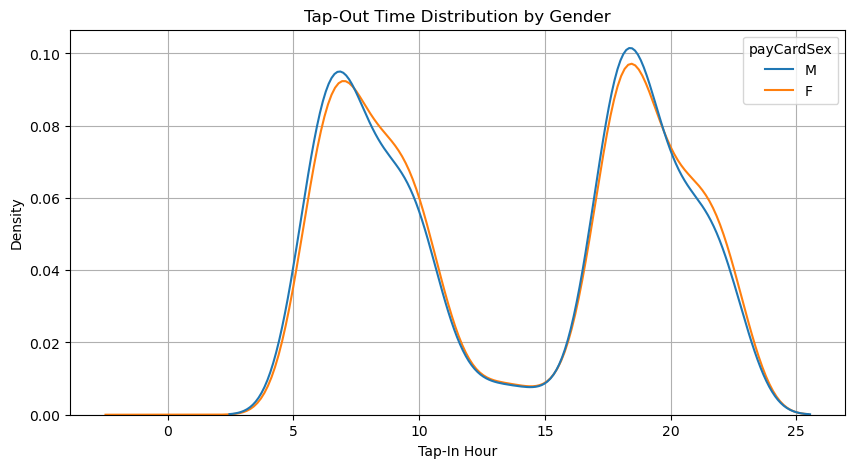

In [322]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=dfc, x='tapInHour', hue='payCardSex', common_norm=False)
plt.title('Tap-In Time Distribution by Gender')
plt.xlabel('Tap-In Hour')
plt.ylabel('Density')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(data=dfc, x='tapOutHour', hue='payCardSex', common_norm=False)
plt.title('Tap-Out Time Distribution by Gender')
plt.xlabel('Tap-In Hour')
plt.ylabel('Density')
plt.grid(True)
plt.show()

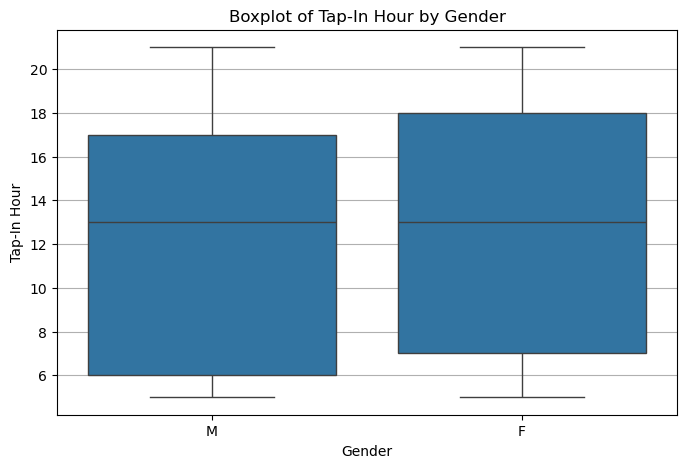

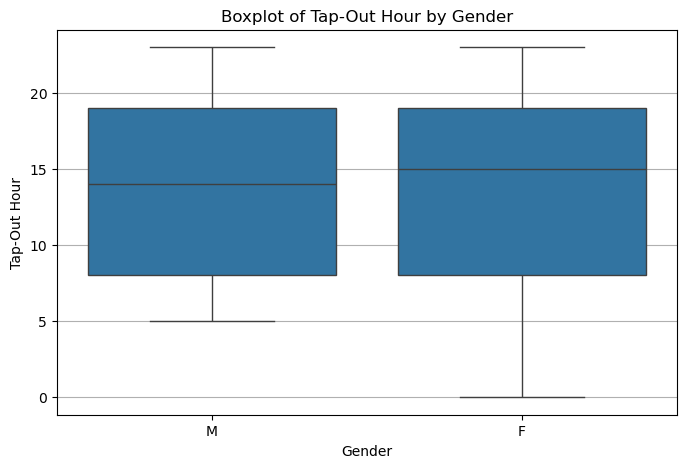

In [323]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dfc, x='payCardSex', y='tapInHour')
plt.title('Boxplot of Tap-In Hour by Gender')
plt.xlabel('Gender')
plt.ylabel('Tap-In Hour')
plt.grid(True, axis='y')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(dfc, x='payCardSex', y='tapOutHour')
plt.title('Boxplot of Tap-Out Hour by Gender')
plt.xlabel("Gender")
plt.ylabel('Tap-Out Hour')
plt.grid(True, axis = "y")
plt.show()

In [324]:
# Group and pivot
gender_tapinhour = dfc.groupby(['tapInHour', 'payCardSex'])['payCardID'].count().reset_index(name='count')
pivot_genderin = gender_tapinhour.pivot(index='tapInHour', columns='payCardSex', values='count').fillna(0)

gender_tapouthour = dfc.groupby(['tapOutHour', 'payCardSex'])['payCardID'].count().reset_index(name='count')
pivot_genderout = gender_tapouthour.pivot(index='tapOutHour', columns='payCardSex', values='count').fillna(0)

# Add total and percentages
pivot_genderin['Total'] = pivot_genderin.sum(axis=1)
pivot_genderin['Pct_Female'] = (pivot_genderin['F'] / pivot_genderin['Total']) * 100
pivot_genderin['Pct_Male'] = (pivot_genderin['M'] / pivot_genderin['Total']) * 100

pivot_genderout['Total'] = pivot_genderout.sum(axis=1)
pivot_genderout['Pct_Female'] = (pivot_genderout['F'] / pivot_genderout['Total']) * 100
pivot_genderout['Pct_Male'] = (pivot_genderout['M'] / pivot_genderout['Total']) * 100

# Round for readability
gender_tablein = pivot_genderin[['F', 'M', 'Total', 'Pct_Female', 'Pct_Male']].round(2)
print("Tap-In Hours by Gender (Counts and Percentages):")
display(gender_tablein)

gender_tableout = pivot_genderout[['F', 'M', 'Total', 'Pct_Female', 'Pct_Male']].round(2)
print("Tap-Out Hours by Gender (Counts and Percentages):")
display(gender_tableout)

Tap-In Hours by Gender (Counts and Percentages):


payCardSex     F     M  Total  Pct_Female  Pct_Male
tapInHour                                          
5           1607  1629  3236   49.66       50.34   
6           2949  2670  5619   52.48       47.52   
7           1467  1229  2696   54.41       45.59   
8           1517  1265  2782   54.53       45.47   
9           1518  1197  2715   55.91       44.09   
10          151   136   287    52.61       47.39   
11          185   145   330    56.06       43.94   
12          166   162   328    50.61       49.39   
13          191   147   338    56.51       43.49   
14          95    72    167    56.89       43.11   
15          227   159   386    58.81       41.19   
16          1637  1598  3235   50.60       49.40   
17          2709  2572  5281   51.30       48.70   
18          1293  1040  2333   55.42       44.58   
19          1293  1072  2365   54.67       45.33   
20          1247  1079  2326   53.61       46.39   
21          1183  883   2066   57.26       42.74

Tap-Out Hours by Gender (Counts and Percentages):


payCardSex       F       M   Total  Pct_Female  Pct_Male
tapOutHour                                              
0.0         1.0     0.0     1.0     100.00      0.00    
5.0         491.0   523.0   1014.0  48.42       51.58   
6.0         1734.0  1712.0  3446.0  50.32       49.68   
7.0         2055.0  1840.0  3895.0  52.76       47.24   
8.0         1498.0  1252.0  2750.0  54.47       45.53   
9.0         1519.0  1204.0  2723.0  55.78       44.22   
10.0        1313.0  1128.0  2441.0  53.79       46.21   
11.0        584.0   440.0   1024.0  57.03       42.97   
12.0        167.0   152.0   319.0   52.35       47.65   
13.0        184.0   150.0   334.0   55.09       44.91   
14.0        162.0   139.0   301.0   53.82       46.18   
15.0        116.0   101.0   217.0   53.46       46.54   
16.0        193.0   136.0   329.0   58.66       41.34   
17.0        1061.0  1012.0  2073.0  51.18       48.82   
18.0        2258.0  2113.0  4371.0  51.66       48.34   
19.0        1873.0  1718.0  3591.0  52.16       47.84   
20.0        1281.0  1078.0  2359.0  54.30       45.70   
21.0        1285.0  1046.0  2331.0  55.13       44.87   
22.0        1164.0  940.0   2104.0  55.32       44.68   
23.0        496.0   371.0   867.0   57.21       42.79

1. Tap-In:
- Female: 6 a.m onwards
- Male: 5 a.m.

2. Tap-Out:
- Female: 6 a.m. onwards
- Male: 5 a.m.

3. Summary
- By percentage, males tend to leave and arrive earlier than their female counterparts
- Prime Time: 05.00-10.00 & 16.00-21.00
- Golden Hour: 6.00-7.00 and 17.00-18.00

In [325]:
# Prepare groups
male_duration = dfc[dfc['payCardSex'] == 'M']['travelDurationMin'].dropna()
female_duration = dfc[dfc['payCardSex'] == 'F']['travelDurationMin'].dropna()

# Run Mann–Whitney U test
stat, p = stats.mannwhitneyu(male_duration, female_duration, alternative='less')

print("Travel Duration by Gender")
print(f"U = {stat:.2f}, p = {p:.4f}")
print("Males have significantly less travel duration" if p < 0.05 else "No significant difference.")

Travel Duration by Gender
U = 163192906.00, p = 0.0057
Males have significantly less travel duration


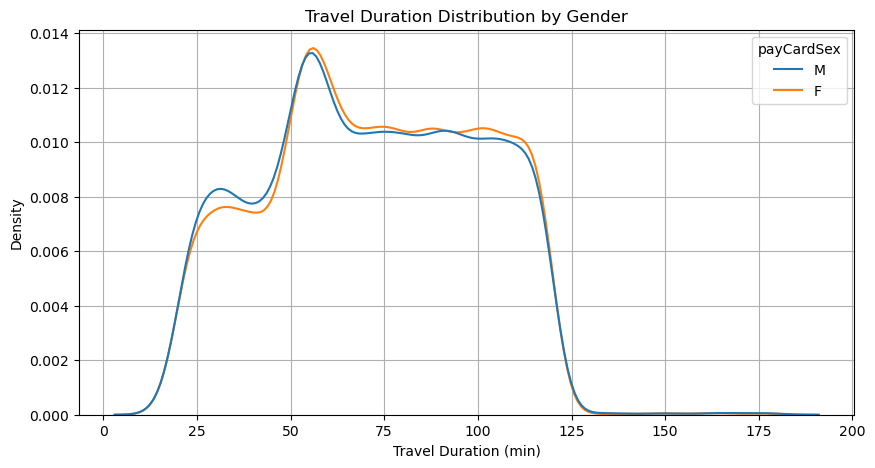

In [326]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=dfc, x='travelDurationMin', hue='payCardSex', common_norm=False)
plt.title('Travel Duration Distribution by Gender')
plt.xlabel('Travel Duration (min)')
plt.grid(True)
plt.show()


Females stay on the busses longer than their male counterparts. Advertising unisex products and services is possible, but female oriented products and services would be more profitable for our partners

In [327]:
# Doing the same analyses for Age 
tapin_groups = [dfc[dfc['ageCat'] == cat]['tapInHour'].dropna() for cat in dfc['ageCat'].unique()]
tapout_groups = [dfc[dfc['ageCat'] == cat]['tapOutHour'].dropna() for cat in dfc['ageCat'].unique()]
duration_groups = [dfc[dfc['ageCat'] == cat]['travelDurationMin'].dropna() for cat in dfc['ageCat'].unique()]

# Run tests
kw_tapin = stats.kruskal(*tapin_groups)
print("Tap-In Time by Age: H = {:.2f}, p = {:.4f}".format(kw_tapin.statistic, kw_tapin.pvalue))
print("Significant difference!" if kw_tapin.pvalue < 0.05 else "No significant difference.")

kw_tapout = stats.kruskal(*tapout_groups)
print("Tap-In Time by Age: H = {:.2f}, p = {:.4f}".format(kw_tapin.statistic, kw_tapin.pvalue))
print("Significant difference!" if kw_tapout.pvalue < 0.05 else "No significant difference.")

kw_duration = stats.kruskal(*duration_groups)
print("Travel Duration by Age: H = {:.2f}, p = {:.4f}".format(kw_duration.statistic, kw_duration.pvalue))
print("Significant difference!" if kw_duration.pvalue < 0.05 else "No significant difference.")

Tap-In Time by Age: H = 1.73, p = 0.6295
No significant difference.
Tap-In Time by Age: H = 1.73, p = 0.6295
No significant difference.
Travel Duration by Age: H = 3.31, p = 0.3465
No significant difference.


No proof that different age categories stay in busses longer or earlier

In [328]:
dfc['isWeekend'] = dfc['tapInDate'].dt.dayofweek >= 5  # Saturday=5, Sunday=6

# Group by date
daily_counts = dfc.groupby(['tapInDate', 'isWeekend'])['payCardID'].count().reset_index(name='commuters')

# Split into two groups
weekday_commuters = daily_counts[daily_counts['isWeekend'] == False]['commuters']
weekend_commuters = daily_counts[daily_counts['isWeekend'] == True]['commuters']

# Mann–Whitney U test
stat, p = stats.mannwhitneyu(weekday_commuters, weekend_commuters, alternative='greater')
print(f"Total Commuters per Day: U = {stat:.2f}, p = {p:.4f}")
print("There are significantly more commuters on weekdays" if p < 0.05 else "No significant difference.")

Total Commuters per Day: U = 200.00, p = 0.0000
There are significantly more commuters on weekdays


In [329]:
# Create crosstab
gender_crosstab = pd.crosstab(dfc['isWeekend'], dfc['payCardSex'])

# Chi-square test
chi2, p, _, _ = stats.chi2_contingency(gender_crosstab)
print(f"Gender vs. Day Type: χ² = {chi2:.2f}, p = {p:.4f}")
print("Significant association of Gender and Day of the Week" if p < 0.05 else "No significant association.")


Gender vs. Day Type: χ² = 2.72, p = 0.0991
No significant association.


AgeCat vs. Day Type: χ² = 8.34, p = 0.0395
Significant association of Age and Day of the Week


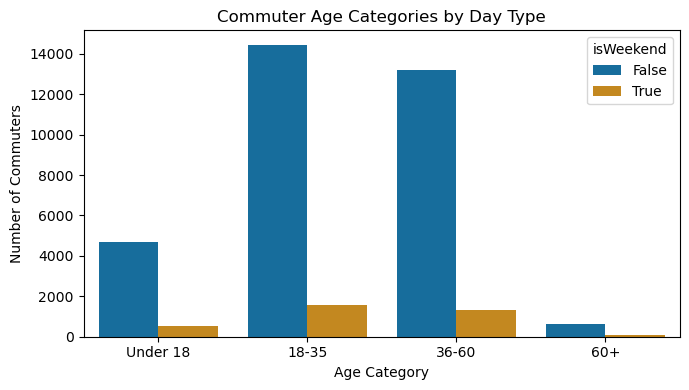

In [330]:
# Crosstab for age category
age_crosstab = pd.crosstab(dfc['isWeekend'], dfc['ageCat'])

# Chi-square test
chi2, p, _, _ = stats.chi2_contingency(age_crosstab)
print(f"AgeCat vs. Day Type: χ² = {chi2:.2f}, p = {p:.4f}")
print("Significant association of Age and Day of the Week" if p < 0.05 else "No significant association.")

# Visualisation
plt.figure(figsize=(7,4))
sns.countplot(data=dfc, x='ageCat', hue='isWeekend', palette='colorblind')
plt.title("Commuter Age Categories by Day Type")
plt.xlabel("Age Category")
plt.ylabel("Number of Commuters")
plt.tight_layout()
plt.show()


In [331]:
# Count commuters by day type
total_counts = dfc['isWeekend'].value_counts().sort_index()
total_crosstab = pd.DataFrame({'Count': total_counts})

# Since it's 1 variable with 2 categories, we can simulate expected using uniform distribution
chi2_stat, p_val = stats.chisquare(total_crosstab['Count'])

print(f"Total Commuters: χ² = {chi2_stat:.2f}, p = {p_val:.4f}")
print("Significant difference in total commuter counts!" if p_val < 0.05 else "No significant difference.")


Total Commuters: χ² = 23826.37, p = 0.0000
Significant difference in total commuter counts!


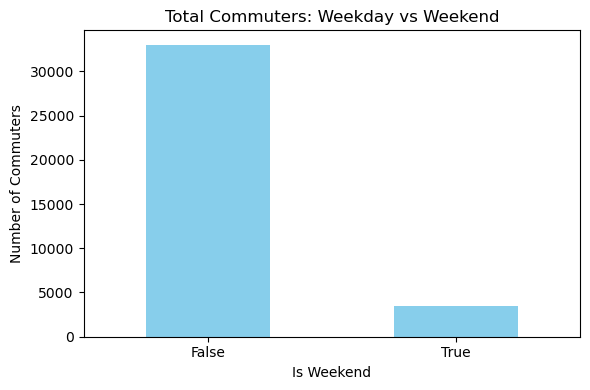

In [332]:
total_crosstab.plot(kind='bar', legend=False, figsize=(6,4), color='skyblue')
plt.title("Total Commuters: Weekday vs Weekend")
plt.ylabel("Number of Commuters")
plt.xlabel("Is Weekend")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- There are significantly more passengers on weekdays rather than weekends.
- No significant association of gender and weekdays and weekends.
- Significant association of age and weekdays and weekend

In [333]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36490 entries, 0 to 37899
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   payCardID          36490 non-null  int64          
 1   payCardBank        36490 non-null  object         
 2   payCardName        36490 non-null  object         
 3   payCardSex         36490 non-null  object         
 4   payCardBirthDate   36490 non-null  int64          
 5   corridorID         36490 non-null  object         
 6   corridorType       36490 non-null  object         
 7   corridorName       36490 non-null  object         
 8   direction          36490 non-null  float64        
 9   tapInStops         36490 non-null  object         
 10  tapInStopsName     36490 non-null  object         
 11  tapInType          36490 non-null  object         
 12  tapInTransport     36490 non-null  object         
 13  tapInStopsLat      36490 non-null  float64        


In [334]:
# Define holiday range
holiday_start = pd.to_datetime('2025-04-19')
holiday_end = pd.to_datetime('2025-04-25')

dfc['week_type'] = dfc['tapInDate'].apply(
    lambda x: 'Holiday' if pd.to_datetime('2023-04-19') <= x <= pd.to_datetime('2023-04-25') else 'Normal Week'
)

print(dfc.groupby('week_type').size())


week_type
Holiday        8827 
Normal Week    27663
dtype: int64


In [335]:
# Group by day and count passengers
daily_passenger_count = dfc.groupby(['tapInDate', 'week_type']).size().reset_index(name='passenger_count')

# Pivot table
pivot = daily_passenger_count.pivot(index='tapInDate', columns='week_type', values='passenger_count')

# Mann-Whitney U (non-parametric)
u_stat, u_p = stats.mannwhitneyu(
    pivot['Holiday'].dropna(),
    pivot['Normal Week'].dropna(),
    alternative='two-sided'
)
print(f"Mann-Whitney U: U = {u_stat:.0f}, p = {u_p:.4f}")
print("Significant difference among corridor types!" if u_p < 0.05 else "No significant difference.")



Mann-Whitney U: U = 86, p = 0.8063
No significant difference.


In [336]:
# Average travel time by week type
travel = dfc[['travelDurationMin', 'week_type']].dropna()

u_stat, p_val = stats.mannwhitneyu(
    travel[travel['week_type'] == 'Holiday']['travelDurationMin'],
    travel[travel['week_type'] == 'Normal Week']['travelDurationMin'],
    alternative='two-sided'
)

print(f"Travel Duration (Holiday vs. Normal): U = {u_stat:.2f}, p = {p_val:.4f}")
print("Significant difference on Travel Duration!" if p_val < 0.05 else "No significant difference.")


Travel Duration (Holiday vs. Normal): U = 121823290.50, p = 0.7563
No significant difference.


In [337]:
# Chi-square test gender and week type
gender_crosstab = pd.crosstab(dfc['week_type'], dfc['payCardSex'])
chi2, p, _, _ = stats.chi2_contingency(gender_crosstab)
print(f"Gender vs. Week Type: χ² = {chi2:.2f}, p = {p:.4f}")
print("Significant association among corridor types!" if p < 0.05 else "No significant difference.")

# Chi-square test age and week type
age_crosstab = pd.crosstab(dfc['week_type'], dfc['ageCat'])
chi2, p, _, _ = stats.chi2_contingency(age_crosstab)
print(f"AgeCat vs. Week Type: χ² = {chi2:.2f}, p = {p:.4f}")
print("Significant association among corridor types!" if p < 0.05 else "No significant difference.")



Gender vs. Week Type: χ² = 0.08, p = 0.7713
No significant difference.
AgeCat vs. Week Type: χ² = 0.26, p = 0.9677
No significant difference.


No significant association/difference of normal week and holiday on age and gender distribution

## 3. Where and When
TLDR:
- Travel Duration
    - The free services' travel duration is one of the longest, along with Royaltrans and Transjabodetabek (Both intercity)
    - The least duration in average is from BRT (might be due to its own specialized infrastructure)
- Most repeated stop areas (except Others)
    1. Residential
    2. Office
    3. Tourism & Recreation
- Most prevalent/city highlights
    - Depok: Very Heavy on Transport Hub
    - Tangerang: Education, Residential (tap-in). Transport Hub (tap-out)
    - South Tangerang: Residential (Very Heavy)


In [338]:
# Group data by date and corridor type, then count daily trips
route_counts = dfc.groupby(['tapInDate', 'corridorType'])['payCardID'].count().reset_index(name='daily_trips')

# Kruskal-Wallis Test
routes = route_counts['corridorType'].unique()
route_groups = [route_counts[route_counts['corridorType'] == route]['daily_trips'] for route in routes]

h_stat, p = stats.kruskal(*route_groups)
print(f"Kruskal-Wallis Test: H-statistic = {h_stat:.2f}, p-value = {p:.4f}")
print("Significant difference of corridor types usage!" if p < 0.05 else "No significant difference.")


Kruskal-Wallis Test: H-statistic = 136.80, p-value = 0.0000
Significant difference of corridor types usage!


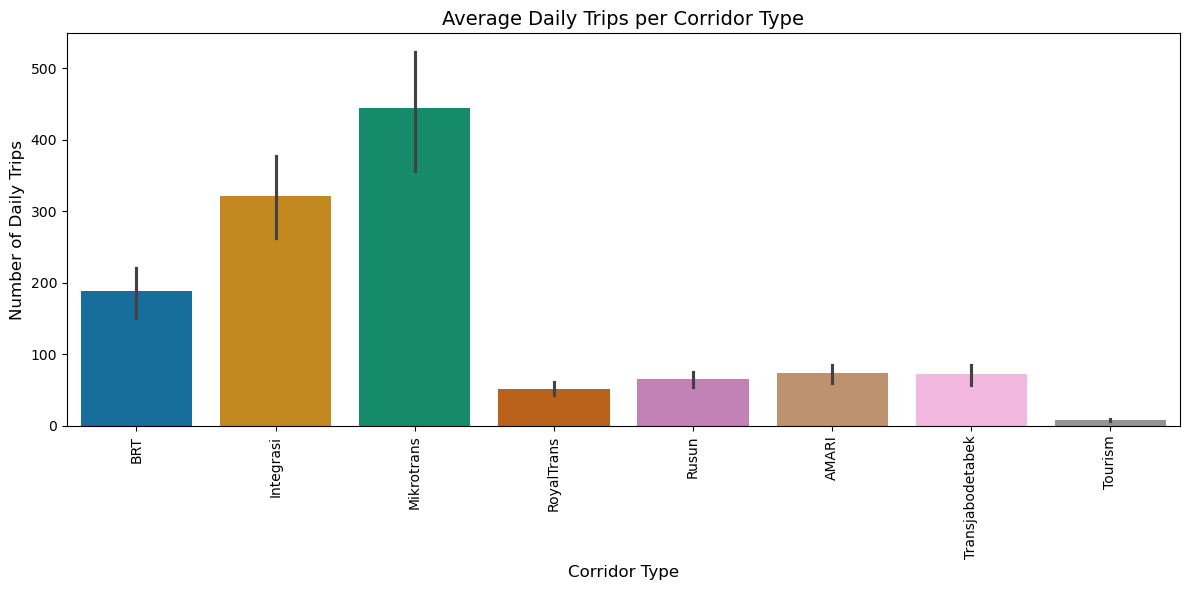

In [339]:
# Plotting the average daily trips per route
plt.figure(figsize=(12, 6))
sns.barplot(x='corridorType', y='daily_trips', data=route_counts, palette='colorblind')
plt.title('Average Daily Trips per Corridor Type', fontsize=14)
plt.xlabel('Corridor Type', fontsize=12)
plt.ylabel('Number of Daily Trips', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [340]:
# estimate Mikrotrans lost revenue (assuming cheaper flat price per trip)
price_per_trip = 2000  # IDR
total_free_trips = dfc[dfc['corridorType'] == "Mikrotrans"].shape[0]
lost_revenue = total_free_trips * price_per_trip
print(f"\nEstimated Mikrotrans Lost Revenue (Lower Fare): Rp {lost_revenue:,.0f}")


Estimated Mikrotrans Lost Revenue (Lower Fare): Rp 26,686,000


In [341]:
# estimate Mikrotrans lost revenue (assuming base price per trip)
price_per_trip = 3500  # IDR
total_free_trips = dfc[dfc['corridorType'] == "Integrasi"].shape[0]
lost_revenue = total_free_trips * price_per_trip
print(f"\nEstimated Mikrotrans Lost Revenue (Base Fare): Rp {lost_revenue:,.0f}")


Estimated Mikrotrans Lost Revenue (Base Fare): Rp 33,782,000


In [342]:
price_per_trip = 2000  # IDR

# Include Mikrotrans, Rusun, and Tourism corridors
free_corridors = ["Mikrotrans", "Rusun", "Tourism"]
total_free_trips = dfc[dfc['corridorType'].isin(free_corridors)].shape[0]

lost_revenue = total_free_trips * price_per_trip
print(f"\nEstimated Lost Revenue for Free Corridors (Mikrotrans, Rusun, Tourism): Rp {lost_revenue:,.0f}")


Estimated Lost Revenue for Free Corridors (Mikrotrans, Rusun, Tourism): Rp 30,884,000


In [343]:
price_per_trip = 3500  # IDR

# Include Mikrotrans, Rusun, and Tourism corridors
free_corridors = ["Mikrotrans", "Rusun", "Tourism"]
total_free_trips = dfc[dfc['corridorType'].isin(free_corridors)].shape[0]

lost_revenue = total_free_trips * price_per_trip
print(f"\nEstimated Lost Revenue for Free Corridors (Mikrotrans, Rusun, Tourism): Rp {lost_revenue:,.0f}")


Estimated Lost Revenue for Free Corridors (Mikrotrans, Rusun, Tourism): Rp 54,047,000


In [344]:
bins = [0, 10, 20, 30, 60, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-60', '60+']

dfc['duration_bin'] = pd.cut(dfc['travelDurationMin'], bins=bins, labels=labels, right=True)

# Prepare list of durations for each corridor type
durations_by_type = [
    dfc[dfc['corridorType'] == ct]['duration_bin'].dropna()
    for ct in dfc['corridorType'].dropna().unique()
]

# Run Kruskal–Wallis test
stat, p = stats.kruskal(*durations_by_type)

print("\nTravel Duration by Corridor Type")
print(f"H = {stat:.2f}, p = {p:.4f}")
print("Significant difference among corridor types!" if p < 0.05 else "No significant difference.")



Travel Duration by Corridor Type
H = 22.69, p = 0.0019
Significant difference among corridor types!


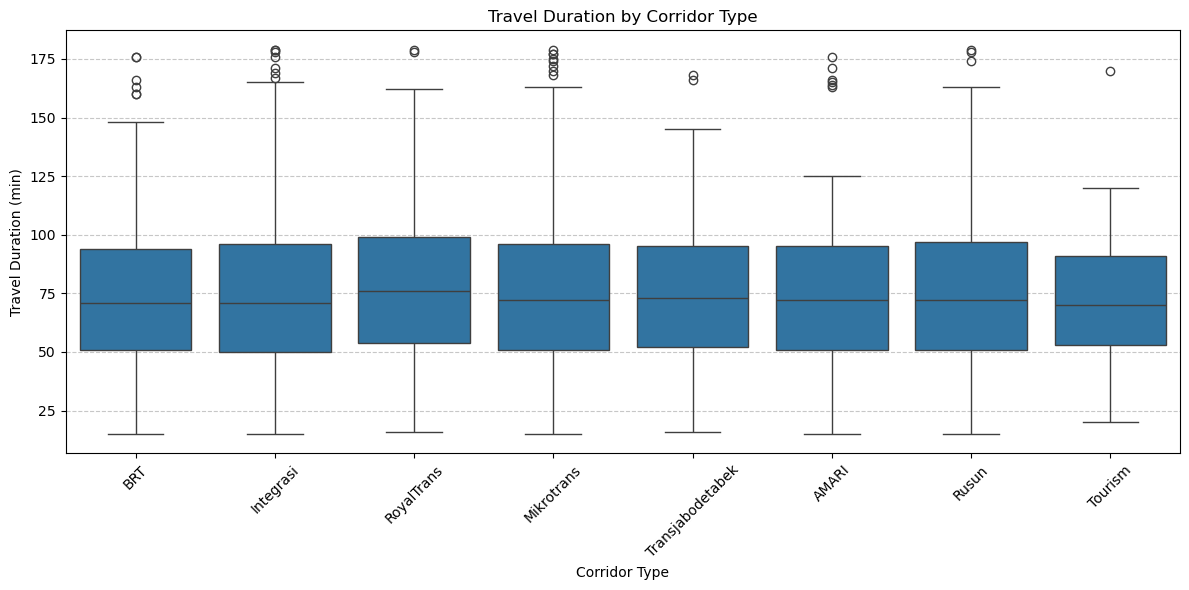

In [345]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dfc, x='corridorType', y='travelDurationMin')

plt.title('Travel Duration by Corridor Type')
plt.xlabel('Corridor Type')
plt.ylabel('Travel Duration (min)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [346]:
bins = [0, 10, 20, 30, 60, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-60', '60+']

dfc['duration_bin'] = pd.cut(dfc['travelDurationMin'], bins=bins, labels=labels, right=True)

# Group by corridorType and binned duration
tracor = dfc.groupby(['corridorType', 'duration_bin'])['payCardID'].count().reset_index(name='count')

# Pivot the table
pivot_tracor = tracor.pivot(index='corridorType', columns='duration_bin', values='count').fillna(0)

# Add total count
pivot_tracor['Total'] = pivot_tracor.sum(axis=1)

# Add percentage columns
for col in labels:  # labels match column names
    pivot_tracor[f'Pct_{col}'] = (pivot_tracor[col] / pivot_tracor['Total']) * 100

avg_duration = dfc.groupby('corridorType')['travelDurationMin'].mean().round(2)
pivot_tracor['AvgDuration'] = avg_duration

tracor_table = pivot_tracor.round(2)
display(tracor_table)


duration_bin      0-10  11-20  21-30  31-60   60+  Total  Pct_0-10  Pct_11-20  \
corridorType                                                                    
AMARI             0     22     173    628    1308  2131   0.0       1.03        
BRT               0     45     428    1713   3470  5656   0.0       0.80        
Integrasi         0     74     742    3009   5827  9652   0.0       0.77        
Mikrotrans        0     90     1020   3967   8266  13343  0.0       0.67        
RoyalTrans        0     13     105    392    1001  1511   0.0       0.86        
Rusun             0     13     131    572    1165  1881   0.0       0.69        
Tourism           0     2      13     66     137   218    0.0       0.92        
Transjabodetabek  0     12     148    604    1334  2098   0.0       0.57        

duration_bin      Pct_21-30  Pct_31-60  Pct_60+  AvgDuration  
corridorType                                                  
AMARI             8.12       29.47      61.38    71.79        
BRT               7.57       30.29      61.35    71.54        
Integrasi         7.69       31.17      60.37    71.59        
Mikrotrans        7.64       29.73      61.95    72.39        
RoyalTrans        6.95       25.94      66.25    74.95        
Rusun             6.96       30.41      61.94    72.56        
Tourism           5.96       30.28      62.84    71.99        
Transjabodetabek  7.05       28.79      63.58    72.39

- The free services, Mikrotrans and Rusun travel duration is one of the longest, along with Royaltrans and Transjabodetabek
- Royaltrans and Transjabodetabek long duration might be due to intercity routes. This can be great for long term exposure of our partners products to commuters
- The least duration in average is from BRT. This might be due to its own specialized infrastructure to tackle traffic

In [347]:
# Create contingency table
tableTin = pd.crosstab(dfc['corridorType'], dfc['tapInType'])
tableTout = pd.crosstab(dfc['corridorType'], dfc['tapOutType'])

# Run Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(tableTin)
print(f"Chi-Square (CorridorID vs. Tap-in Type): χ² = {chi2:.2f}, p = {p:.4f}")
print("Significant association between Corridor Type and Tap-In Area Type!" if p < 0.05 else "No significant association.")

chi2, p, dof, expected = stats.chi2_contingency(tableTout)
print(f"\nChi-Square (CorridorID vs. Tap-Out Type): χ² = {chi2:.2f}, p = {p:.4f}")
print("Significant association between Corridor Type and Tap-Out Area Type!" if p < 0.05 else "No significant association.")

Chi-Square (CorridorID vs. Tap-in Type): χ² = 7348.70, p = 0.0000
Significant association between Corridor Type and Tap-In Area Type!

Chi-Square (CorridorID vs. Tap-Out Type): χ² = 6012.36, p = 0.0000
Significant association between Corridor Type and Tap-Out Area Type!


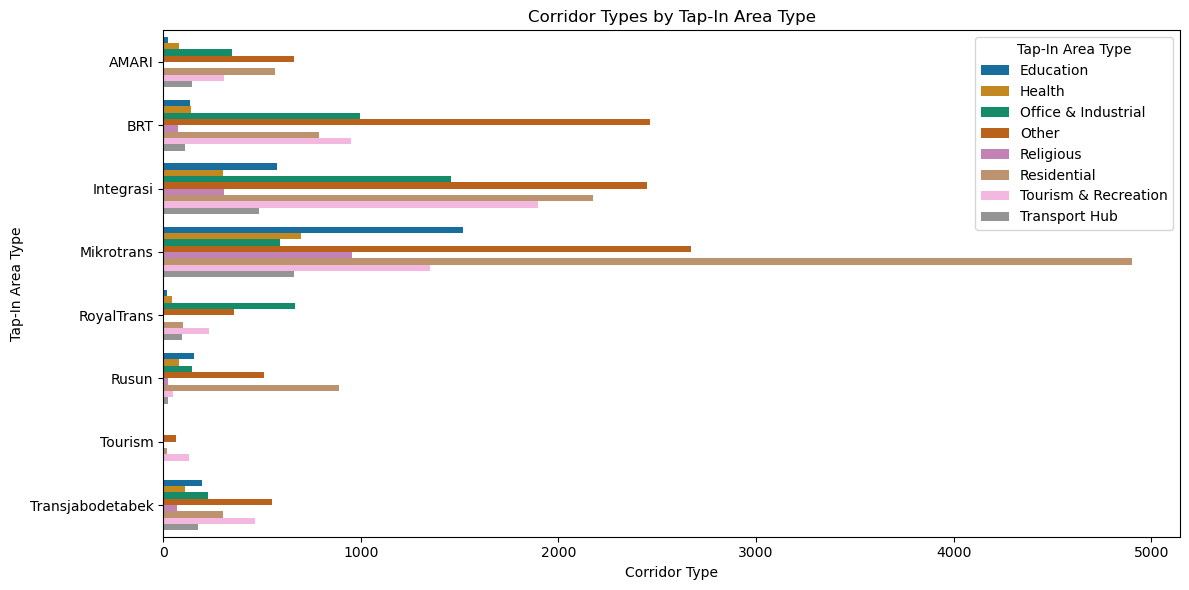

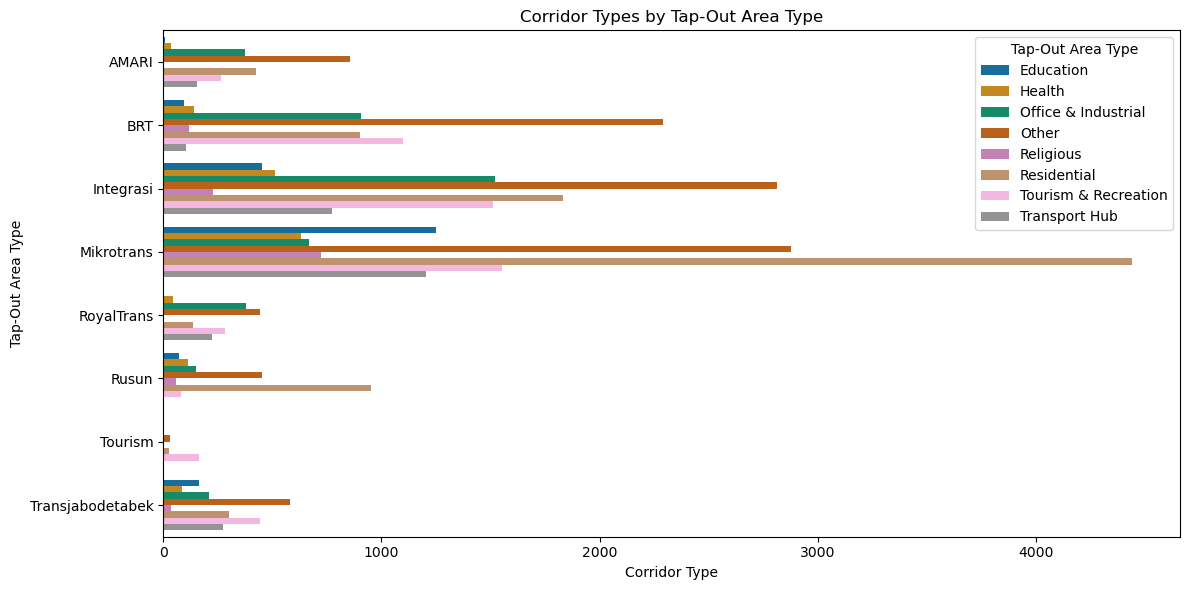

In [348]:
ctype_in = dfc.groupby(['corridorType', 'tapInType'])['payCardID'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(ctype_in, x='count', y='corridorType', hue='tapInType', palette='colorblind')
plt.title('Corridor Types by Tap-In Area Type')
plt.xlabel('Corridor Type')
plt.ylabel('Tap-In Area Type')
plt.legend(title='Tap-In Area Type')
plt.tight_layout()
plt.show()

ctype_out = dfc.groupby(['corridorType', 'tapOutType'])['payCardID'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(ctype_out, x='count', y='corridorType', hue='tapOutType', palette='colorblind')
plt.title('Corridor Types by Tap-Out Area Type')
plt.xlabel('Corridor Type')
plt.ylabel('Tap-Out Area Type')
plt.legend(title='Tap-Out Area Type')
plt.tight_layout()
plt.show()

In [349]:
# Group and pivot
pivot_tin = ctype_in.pivot(index='corridorType', columns='tapInType', values='count').fillna(0)
pivot_tout = ctype_out.pivot(index='corridorType', columns='tapOutType', values='count')

# Add total and % per age group
pivot_tin['Total'] = pivot_tin.sum(axis=1)
pivot_tout['Total'] = pivot_tout.sum(axis=1)

# Calculate percentages for each gender group
for col in pivot_tin.columns[:-1]:  # Exclude the 'Total' column
    pivot_tin[f'Pct_{col}'] = (pivot_tin[col] / pivot_tin['Total']) * 100

for col in pivot_tout.columns[:-1]:  # Exclude the 'Total' column
    pivot_tout[f'Pct_{col}'] = (pivot_tout[col] / pivot_tout['Total']) * 100

# Round for readability
tabletin = pivot_tin.round(2)
print("\nCorridor Types by Tap-In Area Type (Counts and Percentages):")
display(tabletin)

tabletout = pivot_tout.round(2)
print("\nCorridor Types by Tap-In Area Type (Counts and Percentages):")
display(tabletout)


Corridor Types by Tap-In Area Type (Counts and Percentages):


tapInType         Education  Health  Office & Industrial   Other  Religious  \
corridorType                                                                  
AMARI             22.0       80.0    347.0                664.0   2.0         
BRT               134.0      143.0   996.0                2463.0  76.0        
Integrasi         574.0      305.0   1458.0               2450.0  307.0       
Mikrotrans        1515.0     696.0   593.0                2672.0  956.0       
RoyalTrans        20.0       44.0    665.0                358.0   0.0         
Rusun             154.0      82.0    146.0                509.0   25.0        
Tourism           0.0        0.0     0.0                  67.0    0.0         
Transjabodetabek  195.0      110.0   227.0                552.0   68.0        

tapInType         Residential  Tourism & Recreation  Transport Hub    Total  \
corridorType                                                                  
AMARI             565.0        306.0                 145.0          2131.0    
BRT               787.0        948.0                 109.0          5656.0    
Integrasi         2173.0       1899.0                486.0          9652.0    
Mikrotrans        4900.0       1350.0                661.0          13343.0   
RoyalTrans        99.0         230.0                 95.0           1511.0    
Rusun             891.0        52.0                  22.0           1881.0    
Tourism           19.0         131.0                 1.0            218.0     
Transjabodetabek  303.0        465.0                 178.0          2098.0    

tapInType         Pct_Education  Pct_Health  Pct_Office & Industrial  \
corridorType                                                           
AMARI             1.03           3.75        16.28                     
BRT               2.37           2.53        17.61                     
Integrasi         5.95           3.16        15.11                     
Mikrotrans        11.35          5.22        4.44                      
RoyalTrans        1.32           2.91        44.01                     
Rusun             8.19           4.36        7.76                      
Tourism           0.00           0.00        0.00                      
Transjabodetabek  9.29           5.24        10.82                     

tapInType         Pct_Other  Pct_Religious  Pct_Residential  \
corridorType                                                  
AMARI             31.16      0.09           26.51             
BRT               43.55      1.34           13.91             
Integrasi         25.38      3.18           22.51             
Mikrotrans        20.03      7.16           36.72             
RoyalTrans        23.69      0.00           6.55              
Rusun             27.06      1.33           47.37             
Tourism           30.73      0.00           8.72              
Transjabodetabek  26.31      3.24           14.44             

tapInType         Pct_Tourism & Recreation  Pct_Transport Hub  
corridorType                                                   
AMARI             14.36                     6.80               
BRT               16.76                     1.93               
Integrasi         19.67                     5.04               
Mikrotrans        10.12                     4.95               
RoyalTrans        15.22                     6.29               
Rusun             2.76                      1.17               
Tourism           60.09                     0.46               
Transjabodetabek  22.16                     8.48


Corridor Types by Tap-In Area Type (Counts and Percentages):


tapOutType        Education  Health  Office & Industrial   Other  Religious  \
corridorType                                                                  
AMARI             10.0       36.0    376.0                857.0   3.0         
BRT               97.0       141.0   905.0                2289.0  117.0       
Integrasi         454.0      514.0   1521.0               2814.0  228.0       
Mikrotrans        1250.0     630.0   670.0                2876.0  723.0       
RoyalTrans       NaN         45.0    379.0                442.0  NaN          
Rusun             73.0       112.0   150.0                454.0   58.0        
Tourism           1.0       NaN     NaN                   30.0   NaN          
Transjabodetabek  166.0      85.0    212.0                581.0   36.0        

tapOutType        Residential  Tourism & Recreation  Transport Hub    Total  \
corridorType                                                                  
AMARI             426.0        267.0                 156.0          2131.0    
BRT               904.0        1097.0                106.0          5656.0    
Integrasi         1834.0       1513.0                774.0          9652.0    
Mikrotrans        4437.0       1551.0                1206.0         13343.0   
RoyalTrans        137.0        285.0                 223.0          1511.0    
Rusun             950.0        83.0                  1.0            1881.0    
Tourism           25.0         162.0                NaN             218.0     
Transjabodetabek  301.0        443.0                 274.0          2098.0    

tapOutType        Pct_Education  Pct_Health  Pct_Office & Industrial  \
corridorType                                                           
AMARI             0.47           1.69        17.64                     
BRT               1.71           2.49        16.00                     
Integrasi         4.70           5.33        15.76                     
Mikrotrans        9.37           4.72        5.02                      
RoyalTrans       NaN             2.98        25.08                     
Rusun             3.88           5.95        7.97                      
Tourism           0.46          NaN         NaN                        
Transjabodetabek  7.91           4.05        10.10                     

tapOutType        Pct_Other  Pct_Religious  Pct_Residential  \
corridorType                                                  
AMARI             40.22      0.14           19.99             
BRT               40.47      2.07           15.98             
Integrasi         29.15      2.36           19.00             
Mikrotrans        21.55      5.42           33.25             
RoyalTrans        29.25     NaN             9.07              
Rusun             24.14      3.08           50.51             
Tourism           13.76     NaN             11.47             
Transjabodetabek  27.69      1.72           14.35             

tapOutType        Pct_Tourism & Recreation  Pct_Transport Hub  
corridorType                                                   
AMARI             12.53                     7.32               
BRT               19.40                     1.87               
Integrasi         15.68                     8.02               
Mikrotrans        11.62                     9.04               
RoyalTrans        18.86                     14.76              
Rusun             4.41                      0.05               
Tourism           74.31                    NaN                 
Transjabodetabek  21.12                     13.06

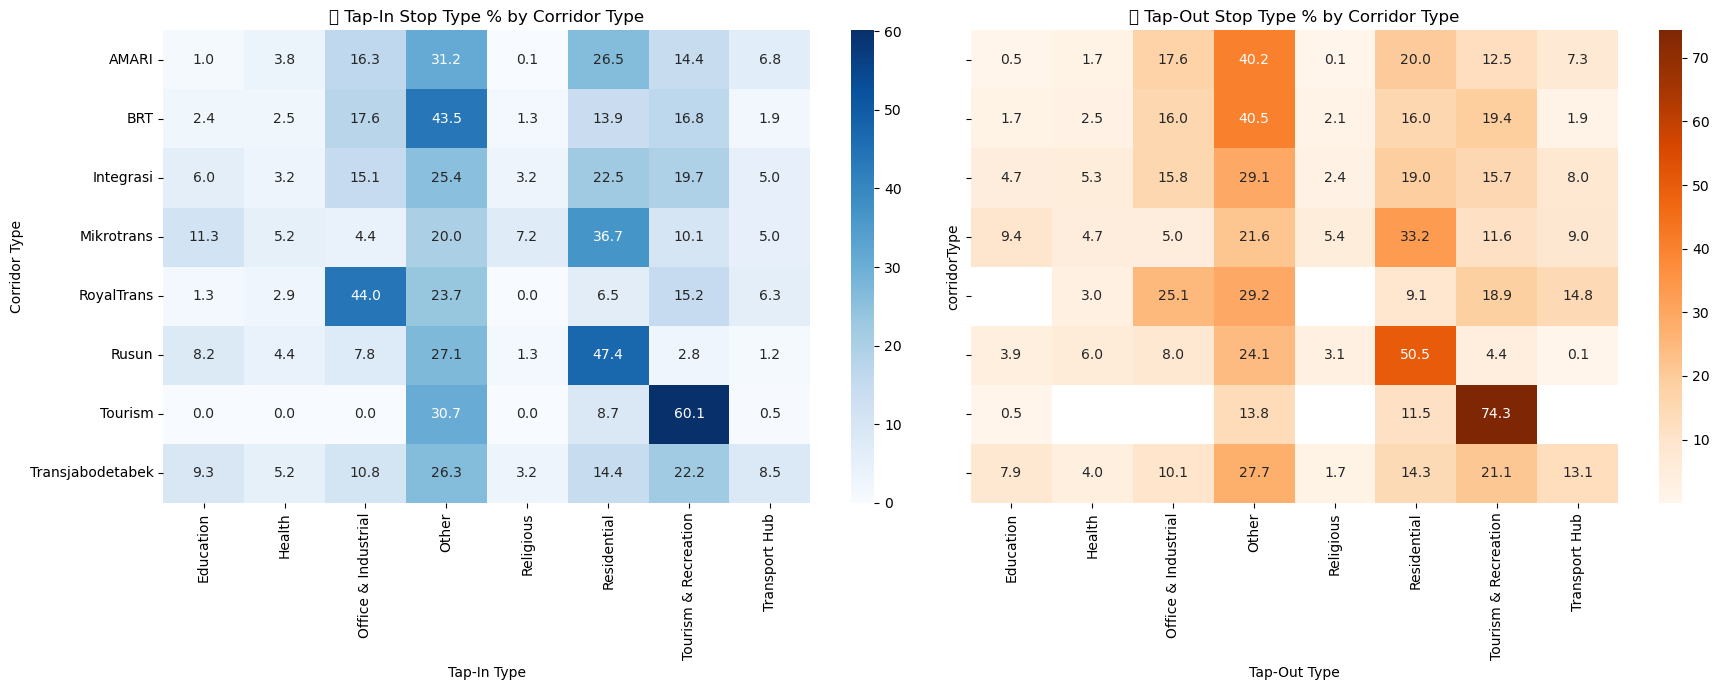

In [350]:
# Filter percentage columns and clean labels
tin_pct = tabletin.filter(like='Pct_')
tout_pct = tabletout.filter(like='Pct_')

# Remove 'Pct_' prefix for cleaner labels
tin_pct.columns = [c.replace('Pct_', '') for c in tin_pct.columns]
tout_pct.columns = [c.replace('Pct_', '') for c in tout_pct.columns]

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Heatmap: Tap-In
sns.heatmap(tin_pct, annot=True, fmt=".1f", cmap="Blues", ax=axes[0])
axes[0].set_title('📍 Tap-In Stop Type % by Corridor Type')
axes[0].set_xlabel('Tap-In Type')
axes[0].set_ylabel('Corridor Type')

# Heatmap: Tap-Out
sns.heatmap(tout_pct, annot=True, fmt=".1f", cmap="Oranges", ax=axes[1])
axes[1].set_title('🏁 Tap-Out Stop Type % by Corridor Type')
axes[1].set_xlabel('Tap-Out Type')

plt.tight_layout()
plt.show()

Corridor Types and their predominant stop areas (except Others)
- AMARI: Residential
- BRT: Office
- Integrasi: Residential
- Mikrotrans: Residential
- RoyalTrans: Office
- Rusun: Residential
- Tourism : Tourism
- Transjabodetabek: Tourism

Most repeated
1. Residential
2. Office
3. Tourism & Recreation

In [351]:
table_CityIn = pd.crosstab(dfc['tapInCity'], dfc['tapInType'])
table_CityOut = pd.crosstab(dfc['tapOutCity'], dfc['tapOutType'])

chi2, p, dof, expected = stats.chi2_contingency(table_CityIn)
print(f"Chi-Square (City vs. Tap-in Type): χ² = {chi2:.2f}, p = {p:.4f}")
print("Significant association between City and Tap-In Area Type!" if p < 0.05 else "No significant association.")

chi2, p, dof, expected = stats.chi2_contingency(table_CityOut)
print(f"\nChi-Square (City vs. Tap-Out Type): χ² = {chi2:.2f}, p = {p:.4f}")
print("Significant association between City and Tap-Out Area Type!" if p < 0.05 else "No significant association.")

Chi-Square (City vs. Tap-in Type): χ² = 4656.87, p = 0.0000
Significant association between City and Tap-In Area Type!

Chi-Square (City vs. Tap-Out Type): χ² = 4593.89, p = 0.0000
Significant association between City and Tap-Out Area Type!


In [352]:
# Assume table_CityIn and table_CityOut already have stop types as columns and cities as index

# Add Total column
table_CityIn['Total'] = table_CityIn.sum(axis=1)
table_CityOut['Total'] = table_CityOut.sum(axis=1)

# Calculate percentage columns for each type
for col in table_CityIn.columns[:-1]:  # Skip 'Total'
    table_CityIn[f'Pct_{col}'] = (table_CityIn[col] / table_CityIn['Total']) * 100

for col in table_CityOut.columns[:-1]:
    table_CityOut[f'Pct_{col}'] = (table_CityOut[col] / table_CityOut['Total']) * 100

# Round for readability
tablecin = table_CityIn.round(2)
tablecout = table_CityOut.round(2)

# Display
print("\nCity Tap-In Stop Types (Counts & Percentages):")
display(tablecin)

print("\nCity Tap-Out Stop Types (Counts & Percentages):")
display(tablecout)



City Tap-In Stop Types (Counts & Percentages):


tapInType        Education  Health  Office & Industrial  Other  Religious  \
tapInCity                                                                   
Bekasi           0          59      0                    147    21          
Central Jakarta  198        257     1678                 1653   158         
Depok            0          0       37                   11     0           
East Jakarta     600        218     701                  2161   401         
North Jakarta    847        533     1014                 2923   469         
South Jakarta    745        303     849                  2396   382         
South Tangerang  2          4       0                    103    0           
Tangerang        60         0       22                   29     1           
West Jakarta     162        86      131                  312    2           

tapInType        Residential  Tourism & Recreation  Transport Hub  Total  \
tapInCity                                                                  
Bekasi           22           155                   2              406     
Central Jakarta  749          1578                  533            6804    
Depok            25           29                    0              102     
East Jakarta     2590         869                   587            8127    
North Jakarta    3381         1280                  144            10591   
South Jakarta    2126         1370                  390            8561    
South Tangerang  203          20                    21             353     
Tangerang        41           42                    0              195     
West Jakarta     600          38                    20             1351    

tapInType        Pct_Education  Pct_Health  Pct_Office & Industrial  \
tapInCity                                                             
Bekasi           0.00           14.53       0.00                      
Central Jakarta  2.91           3.78        24.66                     
Depok            0.00           0.00        36.27                     
East Jakarta     7.38           2.68        8.63                      
North Jakarta    8.00           5.03        9.57                      
South Jakarta    8.70           3.54        9.92                      
South Tangerang  0.57           1.13        0.00                      
Tangerang        30.77          0.00        11.28                     
West Jakarta     11.99          6.37        9.70                      

tapInType        Pct_Other  Pct_Religious  Pct_Residential  \
tapInCity                                                    
Bekasi           36.21      5.17           5.42              
Central Jakarta  24.29      2.32           11.01             
Depok            10.78      0.00           24.51             
East Jakarta     26.59      4.93           31.87             
North Jakarta    27.60      4.43           31.92             
South Jakarta    27.99      4.46           24.83             
South Tangerang  29.18      0.00           57.51             
Tangerang        14.87      0.51           21.03             
West Jakarta     23.09      0.15           44.41             

tapInType        Pct_Tourism & Recreation  Pct_Transport Hub  
tapInCity                                                     
Bekasi           38.18                     0.49               
Central Jakarta  23.19                     7.83               
Depok            28.43                     0.00               
East Jakarta     10.69                     7.22               
North Jakarta    12.09                     1.36               
South Jakarta    16.00                     4.56               
South Tangerang  5.67                      5.95               
Tangerang        21.54                     0.00               
West Jakarta     2.81                      1.48


City Tap-Out Stop Types (Counts & Percentages):


tapOutType       Education  Health  Office & Industrial  Other  Religious  \
tapOutCity                                                                  
Bekasi           7          23      0                    90     2           
Central Jakarta  208        198     1439                 2047   144         
Depok            0          0       1                    9      0           
East Jakarta     452        317     843                  2089   364         
North Jakarta    703        584     1035                 3051   297         
South Jakarta    506        370     825                  2636   279         
South Tangerang  0          1       22                   27     0           
Tangerang        27         0       0                    86     9           
West Jakarta     148        70      48                   308    70          

tapOutType       Residential  Tourism & Recreation  Transport Hub  Total  \
tapOutCity                                                                 
Bekasi           20           252                   20             414     
Central Jakarta  622          1056                  779            6493    
Depok            19           8                     45             82      
East Jakarta     2562         657                   725            8009    
North Jakarta    2868         1675                  548            10761   
South Jakarta    2052         1632                  516            8816    
South Tangerang  181          17                    45             293     
Tangerang        20           41                    62             245     
West Jakarta     670          63                    0              1377    

tapOutType       Pct_Education  Pct_Health  Pct_Office & Industrial  \
tapOutCity                                                            
Bekasi           1.69           5.56        0.00                      
Central Jakarta  3.20           3.05        22.16                     
Depok            0.00           0.00        1.22                      
East Jakarta     5.64           3.96        10.53                     
North Jakarta    6.53           5.43        9.62                      
South Jakarta    5.74           4.20        9.36                      
South Tangerang  0.00           0.34        7.51                      
Tangerang        11.02          0.00        0.00                      
West Jakarta     10.75          5.08        3.49                      

tapOutType       Pct_Other  Pct_Religious  Pct_Residential  \
tapOutCity                                                   
Bekasi           21.74      0.48           4.83              
Central Jakarta  31.53      2.22           9.58              
Depok            10.98      0.00           23.17             
East Jakarta     26.08      4.54           31.99             
North Jakarta    28.35      2.76           26.65             
South Jakarta    29.90      3.16           23.28             
South Tangerang  9.22       0.00           61.77             
Tangerang        35.10      3.67           8.16              
West Jakarta     22.37      5.08           48.66             

tapOutType       Pct_Tourism & Recreation  Pct_Transport Hub  
tapOutCity                                                    
Bekasi           60.87                     4.83               
Central Jakarta  16.26                     12.00              
Depok            9.76                      54.88              
East Jakarta     8.20                      9.05               
North Jakarta    15.57                     5.09               
South Jakarta    18.51                     5.85               
South Tangerang  5.80                      15.36              
Tangerang        16.73                     25.31              
West Jakarta     4.58                      0.00

In [353]:
# Check columns in table_CityIn
print("Columns in table_CityIn:", table_CityIn.columns.tolist())

# Check columns in table_CityOut
print("Columns in table_CityOut:", table_CityOut.columns.tolist())

Columns in table_CityIn: ['Education', 'Health', 'Office & Industrial', 'Other', 'Religious', 'Residential', 'Tourism & Recreation', 'Transport Hub', 'Total', 'Pct_Education', 'Pct_Health', 'Pct_Office & Industrial', 'Pct_Other', 'Pct_Religious', 'Pct_Residential', 'Pct_Tourism & Recreation', 'Pct_Transport Hub']
Columns in table_CityOut: ['Education', 'Health', 'Office & Industrial', 'Other', 'Religious', 'Residential', 'Tourism & Recreation', 'Transport Hub', 'Total', 'Pct_Education', 'Pct_Health', 'Pct_Office & Industrial', 'Pct_Other', 'Pct_Religious', 'Pct_Residential', 'Pct_Tourism & Recreation', 'Pct_Transport Hub']


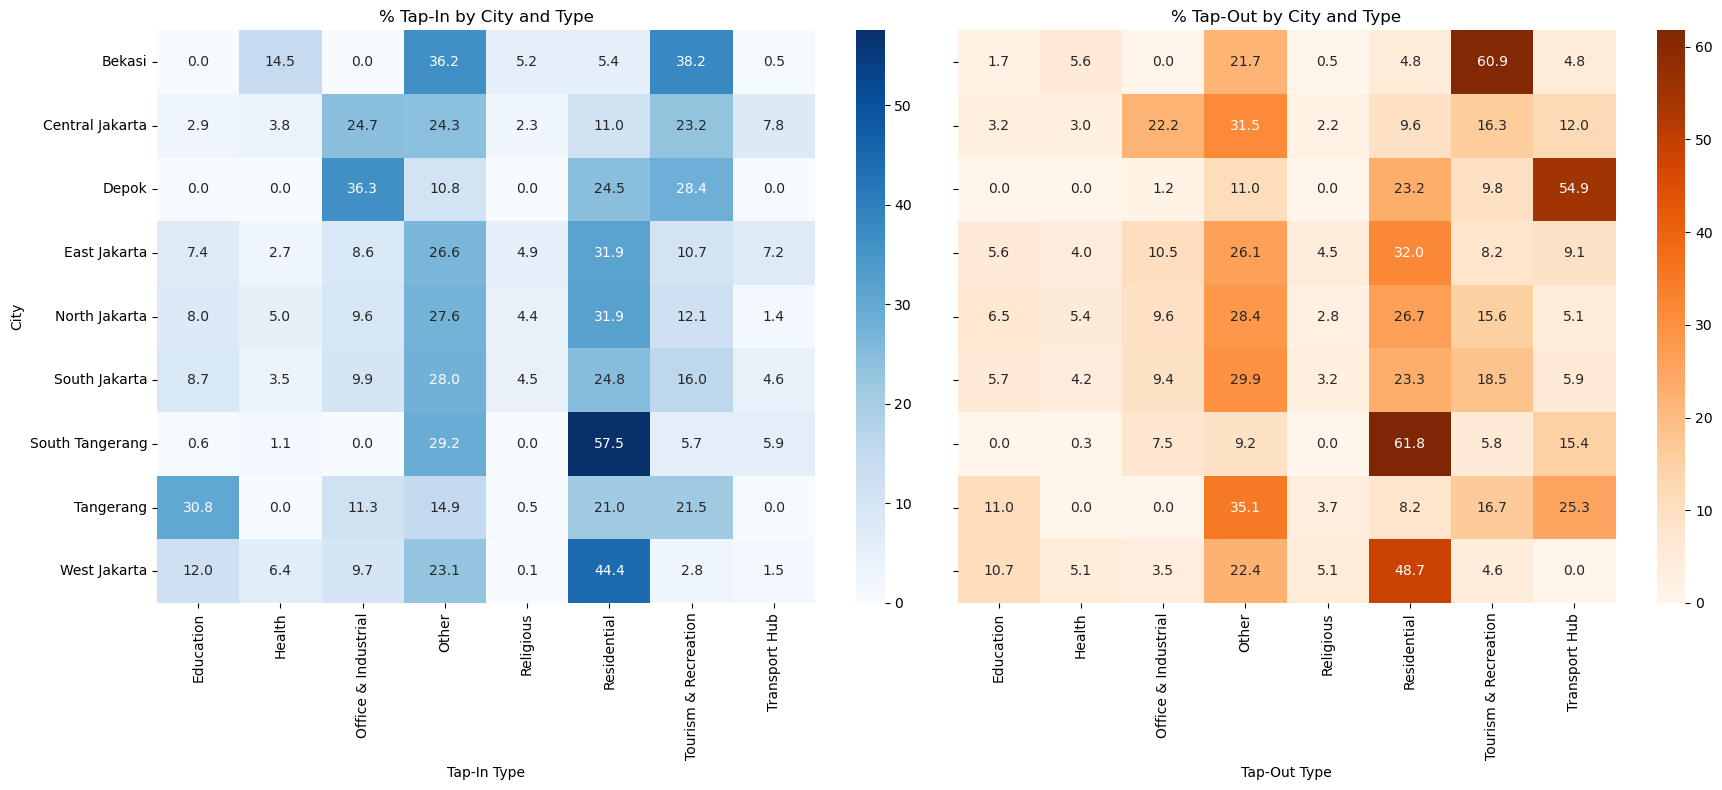

In [354]:
tapin_table = pd.crosstab(dfc['tapInCity'], dfc['tapInType'])
tapin_pct = tapin_table.div(tapin_table.sum(axis=1), axis=0) * 100
tapout_table = pd.crosstab(dfc['tapOutCity'], dfc['tapOutType'])
tapout_pct = tapout_table.div(tapout_table.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Heatmap for Tap-In
sns.heatmap(tapin_pct, annot=True, fmt=".1f", cmap="Blues", ax=axes[0])
axes[0].set_title("% Tap-In by City and Type")
axes[0].set_xlabel("Tap-In Type")
axes[0].set_ylabel("City")

# Heatmap for Tap-Out
sns.heatmap(tapout_pct, annot=True, fmt=".1f", cmap="Oranges", ax=axes[1])
axes[1].set_title("% Tap-Out by City and Type")
axes[1].set_xlabel("Tap-Out Type")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


Most prevalent/city
- Bekasi: Tourism
- Depok: Office, Residential, Tourism. Tap-Out: Very Heavy on Transport Hub
- North Jakarta: Residential, Tourism
- Central Jakarta: office, tourism
- East Jakarta: Residential
- West Jakarta: Residential
- South Jakarta: Residential
- Tangerang: Education, Residential (tap-in). Transport Hub (tap-out)
- South Tangerang: Residential (Very Heavy)



In [355]:
from folium.plugins import HeatMap

# Combine tap-in and tap-out stop usage
all_stops = pd.concat([
    dfc[['tapInStops', 'tapInStopsLat', 'tapInStopsLon']].rename(
        columns={'tapInStops': 'stopID', 'tapInStopsLat': 'lat', 'tapInStopsLon': 'lon'}),
    dfc[['tapOutStops', 'tapOutStopsLat', 'tapOutStopsLon']].rename(
        columns={'tapOutStops': 'stopID', 'tapOutStopsLat': 'lat', 'tapOutStopsLon': 'lon'})
])

# Count number of times each stop was used
stop_usage = all_stops.groupby(['stopID', 'lat', 'lon']).size().reset_index(name='usage_count')

# Prepare data for heatmap
heat_data = stop_usage[['lat', 'lon', 'usage_count']].dropna().values.tolist()

# Plot
m_usage = folium.Map(location=[-6.2, 106.8], zoom_start=11)
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m_usage)
m_usage




In [356]:
morning_peak = dfc[(dfc['tapInHour'] >= 6) & (dfc['tapInHour'] <= 9)]

rush_stops = morning_peak.groupby(['tapInStops', 'tapInStopsLat', 'tapInStopsLon']).size().reset_index(name='rush_count')
rush_heat = rush_stops[['tapInStopsLat', 'tapInStopsLon', 'rush_count']].dropna().values.tolist()

m_rush = folium.Map(location=[-6.2, 106.8], zoom_start=11)
HeatMap(rush_heat, radius=10, blur=15, max_zoom=1).add_to(m_rush)
m_rush


In [357]:
evening_peak = dfc[(dfc['tapInHour'] >= 17) & (dfc['tapInHour'] <= 21)]

rush_stops = evening_peak.groupby(['tapInStops', 'tapInStopsLat', 'tapInStopsLon']).size().reset_index(name='rush_count')
rush_heat = rush_stops[['tapInStopsLat', 'tapInStopsLon', 'rush_count']].dropna().values.tolist()

m_rush = folium.Map(location=[-6.2, 106.8], zoom_start=11)
HeatMap(rush_heat, radius=10, blur=15, max_zoom=1).add_to(m_rush)
m_rush


The visualized hotspots make great premium stops for naming rights and long-term placement

In [358]:
dfc.to_csv("Transjakarta_final.csv", index=False)

# Actionable Recommendation

## Problem
TransJakarta has become a vital part of Jakarta's public transport system, offering essential services to millions of commuters daily. Among the many types of services provided, Mikrotrans stands out as a popular and accessible option for riders, especially in areas with less direct access to major bus routes. However, despite the significant demand for these services, Mikrotrans and other zero-fare routes present a challenge in terms of revenue generation.

While these services play an important role in expanding coverage and ensuring accessibility for underserved populations, they also lead to revenue shortfalls. The absence of fare collection on these routes results in a missed opportunity for potential profit, creating concerns over how to sustain both operational and maintenance costs. As TransJakarta continues to grow and strive for financial sustainability, addressing these revenue gaps becomes crucial for maintaining and expanding its network of services.

## 📊 Market Segments (Demography)

**Understanding rider demographics helps partners tailor their strategies more effectively.**

- 👩 Overall, **female riders outnumber males**, with the **18–36 age group** contributing the **highest number of trips and revenue**.
- 👨 **Male riders** are more concentrated in the **36–60+ age group**, but this segment generates **less revenue** compared to younger males (18–36).

---

## 🕒 Premium Time Slots for Partner Ads and Placements

**Premium time slots are based on rush hour data, helping partners reach peak audiences.**

- **Prime Time**: `05.00–10.00` & `16.00–21.00`
- **Golden Hour**: `06.00–07.00` & `17.00–18.00` _(most exclusive)_
- 💼 **Premium plans apply only on weekdays**

---

## 🎨 Livery, Wraps, and Long-term Onboard Placements

**For longer engagement and stronger brand presence.**

- Advertising on **free services** (e.g., Mikrotrans, Rusun, Tourism) can **turn zero-revenue into income**.
- **High-demand routes** command **higher placement fees**.

### Examples:
- 🐅 *Taman Safari* branding on tourism buses  
- 🏛️ Government messages on Mikrotrans  
- 🚌 3D ads and full vehicle wraps  
- 🎨 Custom livery across bus types  

---

## 🏷️ Naming Rights and Long-Term Placement

**Naming rights and product placement offer high visibility and more permanent strong commuter engagement.**

- Great for **permanent branding** in **high-traffic areas**
- Boosts **brand recognition, recall, and association**
- **Research-backed**: Sponsored transit assets enhance public perception and marketing impact
- MRT Jakarta earns **IDR 3-33B/year/stop**
- 💸 **Pricing is higher** for stops with greater footfall and exposure

# Tableau Link
https://public.tableau.com/views/MonetizingMobilityLeveragingStrategicPartnershiptoOffsetFreeFareCostsinPublicTransit-JonathanMarkH/MonetizingMobilityLeveragingStrategicPartnershiptoOffsetFreeFareCostsinPublicTransit?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

In [359]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36490 entries, 0 to 37899
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   payCardID          36490 non-null  int64          
 1   payCardBank        36490 non-null  object         
 2   payCardName        36490 non-null  object         
 3   payCardSex         36490 non-null  object         
 4   payCardBirthDate   36490 non-null  int64          
 5   corridorID         36490 non-null  object         
 6   corridorType       36490 non-null  object         
 7   corridorName       36490 non-null  object         
 8   direction          36490 non-null  float64        
 9   tapInStops         36490 non-null  object         
 10  tapInStopsName     36490 non-null  object         
 11  tapInType          36490 non-null  object         
 12  tapInTransport     36490 non-null  object         
 13  tapInStopsLat      36490 non-null  float64        
